# Modelos autorregresivos integrados de media móvil

````{admonition} Introducción
:class: tip

- El capítulo anterior cubrió técnicas de ***predicción basadas en suavizado exponencial***, suponiendo que las series temporales tienen ***componentes deterministas y estocásticos***. Sin embargo, estas técnicas ***pueden ser insuficientes cuando la suposición de ruido aleatorio completamente aleatorio no se cumple***. 

- En tales casos, los ***modelos autorregresivos*** pueden ser útiles, ya que ***aprovechan la correlación entre observaciones pasadas para ajustarse inmediatamente***. Estos modelos incluyen términos ***autorregresivos*** y de ***media móvil***, y pueden ser utilizados en diferentes enfoques de predicción, como ***ARMA*** y ***ARIMA***. 
````

- La presente sección se centra en el **modelo autorregresivo** y cubrirá los siguientes temas:
<br/>
    - **Media móvil (MA)**
    - **Autorregresivo (AR)**
    - **Media móvil autorregresiva (ARMA)**
    - **Media móvil integrada autorregresiva (ARIMA)**

## Análisis

## Modelos lineales para series de tiempo estacionarias

- En el ámbito del modelado estadístico, a menudo nos esforzamos por descubrir la genuina conexión entre entradas específicas y la variable de salida. *Nuestros esfuerzos suelen dar como resultado modelos que simplemente aproximan la “verdadera” relación*.
- Este resultado comúnmente se origina en las decisiones estratégicas del analista para facilitar el proceso de modelado. Una suposición fundamental que a menudo simplifica los esfuerzos de modelado es la ***suposición de linealidad***.

````{admonition} Filtro lineal
:class: tip

- Un **filtro lineal** constituye una transformación lineal de una serie temporal, $x_{t}$ a otra serie de tiempo $y_{t}$,

  $$
  y_{t}=L(x_{t})=\sum_{i=-\infty}^{+\infty}\psi_{i}x_{t-i},~\text{con}~t=,\dots,-1,0,1,\dots,
  $$(linear_filter_yt)
````

- En ese sentido, el **filtro lineal** puede verse como un “proceso” que convierte la entrada, $x_{t}$, en una salida, $y_{t}$, y esa conversión no es instantánea, sino que involucra todos (***presente, pasado y futuro***) los valores de la entrada en forma de suma con diferentes “pesos”, $\psi_{i}$, en cada $x_{t-i}$.

- Además, el filtro lineal en la Ecuación {eq}`linear_filter_yt` se dice que tiene las siguientes propiedades:
  1. **Invariante en el tiempo**, ya que los coeficientes $\psi_{i}$ no dependen del tiempo.
  2. **Físicamente realizable** si $\psi_{i}=0$ para $i<0$; esto es, el output $y_{t}$ es una función lineal de los actuales y pasados valores del input: $y_{t}=\psi_{0}x_{t}+\psi_{1}x_{t-1}+\cdots$
  3. **Estable** si $\sum_{i=-\infty}^{+\infty}|\psi_{i}|<\infty$.

- En los filtros lineales, ciertas condiciones hacen que ciertas características, como la *estacionariedad de la serie temporal de entrada, también se manifiesten en la de salida*. En el capítulo previo, exploramos el concepto de **estacionariedad** mencionado anteriormente.

## Estacionariedad

- La **estacionariedad** de una serie temporal está relacionada con sus *propiedades estadísticas en el tiempo*. Es decir, en un sentido más estricto, ***una serie temporal estacionaria exhibe un comportamiento estadístico similar en el tiempo***, lo que a menudo se caracteriza como una distribución de probabilidad constante en el tiempo.
  
- Sin embargo, por lo general, es satisfactorio considerar los dos primeros momentos de la serie temporal y definir la **estacionariedad** (o *estacionariedad débil*) de la siguiente manera:
- 
  1. El *valor esperado de la serie temporal no depende del tiempo*
  2. *La función de autocovarianza* definida como $\text{Cov}(y_{t} , y_{t+k})$ para cualquier rezago, $k$ ***es solo una función de*** $k$ *y no del tiempo*; es decir, $\gamma_{y}(k) = \text{Cov}(y_{t}, y_{t+k})$.

````{admonition} Observación
:class: tip

- La **estacionariedad** de una serie temporal se puede evaluar aproximadamente mediante la observación de su comportamiento en diferentes momentos. Si muestra un ***comportamiento similar en distintos instantes, se puede asumir estacionariedad y continuar con el modelado***.

- Además, pruebas preliminares, como el análisis de la ***función de autocorrelación***, pueden ***proporcionar indicios sobre la estacionariedad***. Un *decaimiento lento en la autocorrelación sugiere desviaciones de la estacionariedad*. También existen pruebas metodológicas más rigurosas para evaluar la estacionariedad, que se discutirán posteriormente en este capítulo.
````

````{admonition} Teorema

- Dado un ***filtro lineal invariante en el tiempo y estable*** y una serie de tiempo con ***input*** $x_{t}$ ***estacionario***, con $\mu_{x}=\text{E}(x_{t})$ y $\gamma_{x}(k)=\text{Cov}(x_{t}, x_{t+k})$, la serie de tiempo

    $$
    y_{t}=L(x_{t})=\sum_{i=-\infty}^{\infty}\psi_{i}x_{t-i},
    $$(linear_invariant_process)

    donde $t=,\dots,-1,0,1,\dots,$ ***es también estacionaria***.

- El siguiente proceso lineal estable con ***ruido blanco*** $\varepsilon_{t}$ ***es también estacionario***

    $$
    y_{t}=\mu+\sum_{i=-\infty}^{\infty}\psi_{i}\varepsilon_{t-i},
    $$(linear_filter_white_noise)

    y además puede reescribirse como sigue, en términos del ***operado backshift*** $B$ como

    $$
    y_{t}=\mu+\left(\sum_{i=0}^{\infty}\psi_{i}B^{i}\right)\varepsilon_{t}=\mu+\Psi(B)\varepsilon_{t}.
    $$(moving_average_backshift)
````

***`Demostración`***

- Calculemos ***valor esperado*** para la serie $y_{t}$ dada en la Ecuación {eq}`linear_invariant_process`. Nótese que es constante respecto a $t$ 

$$
\begin{align*}
\text{E}(y_{t})=\text{E}\left(\sum_{i=-\infty}^{\infty}\psi_{i}\text{E}(x_{t-i})\right)=\sum_{i=-\infty}^{\infty}\psi_{i}\text{E}(x_{t-i})=\sum_{i=-\infty}^{\infty}\psi_{i}\mu_{x}
\end{align*}
$$

- Evaluemos ahora la [autocovarianza](https://en.wikipedia.org/wiki/Covariance). Nótese que esta es función de $k$

$$
\begin{align*}
\text{Cov}(y_{t}, y_{t+k})&=\text{Cov}\left(\sum_{i=-\infty}^{\infty}\psi_{i}x_{t-i}, \sum_{j=-\infty}^{\infty}\psi_{j}x_{t+k-j}\right)\\
&=\sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty}\psi_{i}\psi_{j}\text{Cov}(x_{t-i}, x_{t+k-j})\\
&=\sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty}\psi_{i}\psi_{j}\gamma_{x}(k+i-j).
\end{align*}
$$

- Por lo tanto, la serie de tiempo definida como en la Ecuación {eq}`linear_invariant_process` es estacionaria. Consideremos ahora la serie de la Ecuación {eq}`linear_filter_white_noise` y verifiquemos que es estacionaría

$$
\text{E}(y_{t})=\text{E}\left(\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i}\right)=\mu+\sum_{i=0}^{\infty}\psi_{i}\cancelto{0}{\text{E}(\varepsilon_{t-i})}=\mu.
$$

- Dado que $\gamma_{c}(k)=\text{Cov}(c,c)=\text{Var}(c)=0,~\forall c\in\mathbb{R}$, la autocovarianza de la Ecuación {eq}`linear_filter_white_noise` está dada por

$$
\begin{align*}
\text{Cov}(y_{t}, y_{t+k})&=\text{Cov}\left(\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i}, \mu+\sum_{j=0}^{\infty}\psi_{j}\varepsilon_{t+k-j}\right)\\
&=\text{Cov}\left(\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i}, \sum_{j=0}^{\infty}\psi_{j}\varepsilon_{t+k-j}\right)\\
&=\sum_{i=0}^{\infty}\sum_{j=0}^{\infty}\psi_{i}\psi_{j}\text{Cov}(\varepsilon_{t-i}, \varepsilon_{t+k-j})\\
&=\sum_{i=0}^{\infty}\sum_{j=0}^{\infty}\psi_{i}\psi_{j}\gamma_{\varepsilon}(k+i-j),~\text{donde}~\gamma_{\varepsilon}(h)=\begin{cases}\sigma^{2}, & h=0\\0, & h\neq0\end{cases}\\
&=\sigma^{2}\sum_{i=0}^{\infty}\psi_{i}\psi_{i+k}.
\end{align*}
$$

- Nótese que la última igualdad es independiente de $t$. Además, se usó el hecho de que: $h=k+i-j=0$ entonces $\gamma_{\varepsilon}(h)=\sigma^{2}$.

- La Ecuación {eq}`linear_filter_white_noise` puede reescribirse como

$$
\begin{align*}
y_{t}=\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i}&=\mu+\psi_{0}\varepsilon_{t}+\psi_{1}\varepsilon_{t-1}+\psi_{2}\varepsilon_{t-2}+\cdots\\
&=\mu+\psi_{0}B^{0}\varepsilon_{t}+\psi_{1}B^{1}\varepsilon_{t}+\psi_{2}B^{2}\varepsilon_{t}+\cdots\\
&=\mu+\sum_{i=0}^{\infty}\psi_{i}B^{i}\varepsilon_{t}\\
&=\mu+\left(\sum_{i=0}^{\infty}\psi_{i}B^{i}\right)\varepsilon_{t}=\mu+\Psi(B)\varepsilon_{t}.
\end{align*}
$$

````{admonition} Observación

- La Ecuación {eq}`moving_average_backshift` se le conoce como el ***promedio móvil infinito*** y sirve como una clase general de ***modelos para cualquier serie temporal estacionaria*** {cite}`wold1938study`.

- Básicamente, establece que ***cualquier serie temporal*** $y_{t}$ ***no determinística y estacionaria débil puede ser representada como en la Ecuación*** {eq}`linear_filter_white_noise`, donde $\{\psi_{i}\}$ satisfacen $\sum_{i=0}^{\infty}\psi_{i}^{2}<\infty$.

- Una interpretación más intuitiva de este teorema es que ***una serie temporal estacionaria puede ser vista como la suma ponderada de las "perturbaciones" aleatorias presentes y pasadas*** {cite}`yule1971method, bisgaard2011time`.

````

- El ***Teorema de Wold*** requiere que los choques aleatorios en una ***media móvil infinita*** sean ruido blanco, que definimos como ***choques aleatorios no correlacionados con varianza constante***. Es importante tener en cuenta que hay una diferencia entre correlación e independencia.

````{admonition} Indpendencia vs No Correlación
:class: tip

- Las ***variables aleatorias independientes también son no correlacionadas, pero lo contrario no siempre es cierto***. La ***independencia*** entre dos variables aleatorias se refiere a que su ***función de distribución de probabilidad conjunta es igual al producto de las distribuciones marginales***. Es decir, dos variables aleatorias $X$ e $Y$ se dicen independientes si

$$
f(X, Y)=f_{X}(X)f_{Y}(Y).
$$

- Esto puede interpretarse de manera general como que si $X$ e $Y$ son ***independientes, conocer el valor de*** $X$, por ejemplo, ***no proporciona información sobre cuál podría ser el valor de*** $Y$. Para dos variables aleatorias no correlacionadas $X$ e $Y$, tenemos que su correlación y su covarianza son iguales a cero. Es decir,

$$
\text{Cov}(X, Y)=\text{E}[(X-\mu_{X})(Y-\mu_{Y})]=\text{E}[XY]-\text{E}[X]\text{E}[Y]=0.
$$

- Esto implica que ***si*** $X$ ***y*** $Y$ ***son no correlacionados***, $\text{E}[XY]=\text{E}[X]\text{E}[Y]$

- Claramente, si **dos variables son independientes, estas son no correlacionadas**, ya que bajo independencia se tiene que

$$
\begin{align*}
\text{E}[XY]&=\int\int xyf(x, y)dxdy\\
&=\int\int xyf(x)f(y)dxdy\\
&=\left\{\int xf(x)dx\right\}\left\{\int yf(y)dy\right\}\\[2mm]
&=\text{E}[X]\text{E}[Y].
\end{align*}
$$

- Lo contrario no siempre es cierto. Para ilustrarlo con un ejemplo, consideremos $X$, una ***variable aleatoria con una función de densidad de probabilidad simétrica alrededor de 0***, es decir, $\text{E}[X] = 0$. Supongamos que la segunda variable $Y$ es igual a $|X|$.

- Dado que conocer el valor de $X$ **también determina el valor de** $Y$, **estas dos variables claramente no son independientes**. Sin embargo, se puede demostrar que 

$$
\text{E}[Y]=2\int_{0}^{\infty}xf(x)dx~\text{y}~\text{E}[XY]=\int_{0}^{\infty}x^{2}f(x)dx-\int_{-\infty}^{0}x^{2}f(x)dx=0.
$$

- Entonces $\text{E}[XY]=\text{E}[X]\text{E}[Y]$. Esto muestra que $X$ e $Y$ **no están correlacionadas, pero no son independientes**.

````

## Proceso de media movil finito $MA(q)$

````{admonition} Proceso de media móvil de orden $q$ ($MA(q)$) 
:class: tip

- En los ***modelos de media móvil de orden finito*** o $MA$, convencionalmente $\psi_{0}$ se establece en 1 y los pesos que no se establecen en 0 se representan con la letra griega $\theta$ con signo negativo delante. Por lo tanto, un ***proceso de media móvil de orden*** $q$ ($MA(q)$) se expresa como

    $$
    y_{t}=\mu+\varepsilon_{t}-\theta_{1}\varepsilon_{t-1}-\cdots-\theta_{q}\varepsilon_{q}
    $$(finite_moving_average_orderq)
    
    donde $\{\varepsilon_{t}\}$ es ***ruido blanco***.
````

````{admonition} Teorema

- Dado que la Ecuación {eq}`finite_moving_average_orderq` es un caso especial de la Ecuación {eq}`moving_average_backshift` con solo pesos finitos, ***un proceso*** $MA(q)$ ***siempre es estacionario independientemente de los valores de los pesos***. En términos del operador backshift, el proceso $MA(q)$ está dado por

    $$
    y_{t}=\mu+\Phi(B)\varepsilon_{t},~\text{donde}~\Phi(B)=1-\sum_{i=1}^{q}\theta_{i}B^{i}.
    $$
    
- Además, dado que $\{\varepsilon_{t}\}$ es ruido blanco, ***el valor esperado del proceso*** $MA(q)$ es simplemente $\text{E}(y_{t})=\mu$ y ***su varianza es*** 

$$
\text{Var}(y_{t})=\gamma_{y}(0)=\sigma^{2}(1+\theta_{1}^{2}+\theta_{2}^{2}+\cdots+\theta_{q}^{2})
$$(variance_finite_moving_averageq)

- Similarmente, la ***autocovarianza en el lag*** $k$ puede ser calculada como

$$
\gamma_{y}(k)=\begin{cases}
\sigma^{2}(-\theta_{k}+\theta_{1}\theta_{k+1}+\cdots+\theta_{q-k}\theta_{q}), & k=1,2,\dots, q\\
0, & k>q.
\end{cases}
$$(autocovariance_atlagk_finite_moving_averageq)

- A partir de las Ecuaciones {eq}`variance_finite_moving_averageq`, {eq}`autocovariance_atlagk_finite_moving_averageq`, la ***función de autocorrelación del proceso*** $MA(q)$ es

$$
\rho_{y}(k)=\frac{\gamma_{y}(k)}{\gamma_{y}(0)}=
\begin{cases}
\displaystyle{\frac{-\theta_{k}+\theta_{1}\theta_{k+1}+\cdots+\theta_{q-k}\theta_{q}}{1+\theta_{1}^{2}+\cdots+\theta_{q}^{2}}}, & k=1,2,\dots,q\\
0, & k>q.
\end{cases}
$$
````

***`Demostración`***

- Nótese que utilizando el operador backshift el proceso $MA(q)$ se escribe como

  $$
  y_{t}=\mu+(B^{0}-\theta_{1}B^{1}-\theta_{2}B^{2}-\cdots-\theta_{q}B^{q})\varepsilon_{t}=\mu+\left(1-\sum_{i=1}^{q}\theta_{i}B^{i}\right)\varepsilon_{t}=\mu+\Phi(B)\varepsilon_{t}
  $$

- Dado que $\{\varepsilon_{t}\}$ es un proceso ***white noise***, su ***valor esperado*** está dado por

$$
\begin{align*}
\text{E}(y_{t})&=\text{E}(\mu+\varepsilon_{t}-\theta_{1}\varepsilon_{t-1}-\cdots-\theta_{q}\varepsilon_{t-q})\\
&=\mu+\cancelto{0}{\text{E}(\varepsilon_{t})}-\theta_{1}\cancelto{0}{\text{E}(\varepsilon_{t-1})}-\cdots-\theta_{q}\cancelto{0}{\text{E}(\varepsilon_{t-q})}=\mu
\end{align*}
$$

- Además, su ***varianza*** está dada por

$$
\begin{align*}
\text{Var}(y_{t})&=\text{Var}(\mu+\varepsilon_{t}-\theta_{1}\varepsilon_{t-1}-\cdots-\theta_{q}\varepsilon_{t-q})\\
&=\text{Var}(\mu)+\text{Var}(\varepsilon_{t})+\theta_{1}^{2}\text{Var}(\varepsilon_{t-1})+\cdots+\theta_{q}^{2}\text{Var}(\varepsilon_{t-q})\\
&=\sigma^{2}+\theta_{1}^{2}\sigma^{2}+\theta_{2}^{2}\sigma^{2}+\cdots+\theta_{q}^{2}\sigma^{2}\\
&=\sigma^{2}(1+\theta_{1}^{2}+\theta_{2}^{2}+\cdots+\theta_{q}^{2})=\gamma_{y}(0).
\end{align*}
$$

- Análogamente, la autocovarianza en el lag $k$ está dada por

  $$
  \begin{align*}
  \gamma_{y}(k)&=\text{Cov}(y_{t}, y_{t+k})\\
&=\text{E}((\mu+\epsilon_{t}-\theta_{1}\varepsilon_{t-1}-\cdots-\theta_{q}\varepsilon_{t-q}-\mu)(\mu+\varepsilon_{t+k}-\theta_{1}\varepsilon_{t+k-1}-\cdots-\theta_{q}\varepsilon_{t+k-q}-\mu))\\
  &=\text{E}((\epsilon_{t}-\theta_{1}\varepsilon_{t-1}-\cdots-\theta_{q}\varepsilon_{t-q})(\varepsilon_{t+k}-\theta_{1}\varepsilon_{t+k-1}-\cdots-\theta_{q}\varepsilon_{t+k-q}))
  \end{align*}
  $$

- Recuerde que: $\text{E}(\varepsilon_{t})=0,~\text{Var}(\varepsilon_{t})=\text{E}(\varepsilon_{t}^{2})=\sigma^{2}$ y $\text{Cov}(\varepsilon_{t}, \varepsilon_{t-k})=\text{E}(\varepsilon_{t}\varepsilon_{t-k})=0,~k\neq0$. Nótese además que para $k=1$

$$
\begin{align*}
\text{E}((\varepsilon_{t}-\theta_{1}\varepsilon_{t-1}-\cdots&-\theta_{q}\varepsilon_{t-q})(\varepsilon_{t+1}-\theta_{1}\varepsilon_{t}-\cdots-\theta_{q}\varepsilon_{t+1-q}))\\
&=\text{E}\textcolor{red}{(}\varepsilon_{t}\varepsilon_{t+1}-\theta_{1}\varepsilon_{t}^{2}-\theta_{2}\varepsilon_{t}\varepsilon_{t-1}-\cdots-\theta_{q}\varepsilon_{t}\varepsilon_{t+1-q}\\
&-\theta_{1}\varepsilon_{t-1}\varepsilon_{t+1}+\theta_{1}^{2}\varepsilon_{t-1}\varepsilon_{t}+\theta_{1}\theta_{2}\varepsilon_{t-1}^{2}+\cdots+\theta_{1}\theta_{q}\varepsilon_{t-1}\varepsilon_{t+1-q}\\
&-\theta_{2}\varepsilon_{t-2}\varepsilon_{t+1}\theta_{2}\theta_{1}\varepsilon_{t-2}\varepsilon_{t}+\theta_{2}^{2}\varepsilon_{t-2}\varepsilon_{t-1}+\theta_{2}\theta_{3}\varepsilon_{t-2}^{2}+\cdots+\theta_{2}\theta_{q}\varepsilon_{t-2}\varepsilon_{t+1-q}\\
&\cdots\\
&-\theta_{q}\varepsilon_{t-q}\varepsilon_{t+1}+\theta_{q}\theta_{1}\varepsilon_{t-q}\varepsilon_{t}+\cdots+\theta_{q}\theta_{1-q}\varepsilon_{t-q}^{2}+\theta_{q}^{2}\varepsilon_{t-q}\varepsilon_{t+1-q}\textcolor{red}{)}\\
&=-\theta_{1}\sigma^{2}+\theta_{1}\theta_{2}\sigma^{2}+\theta_{2}\theta_{3}\sigma^{2}+\cdots+\theta_{q}\theta_{1-q}\sigma^{2}\\
&=\sigma^{2}(-\theta_{1}+\theta_{1}\theta_{2}+\theta_{2}\theta_{3}+\cdots+\theta_{1-q}\theta_{q}).
\end{align*}
$$

- Análogamente, para $k=2$ se tiene que (***verifíquelo***): $\gamma_{y}(2)=\sigma^{2}(-\theta_{2}+\theta_{1}\theta_{3}+\theta_{2}\theta_{4}+\cdots+\theta_{2-q}\theta_{q})$. Por lo tanto,

$$
\gamma_{y}(k)=
\begin{cases}
\sigma^{2}(-\theta_{k}+\theta_{1}\theta_{k+1}+\theta_{2}\theta_{k+2}+\cdots+\theta_{k-q}\theta_{q}), & k=1,2,\dots,q\\
0, & \text{otro caso}.
\end{cases}
$$

- Entonces la ***función de autocorrelación*** de $MA(q)$, para $k=1,2,\dots,q$ está dada por

$$
\begin{align*}
\rho_{y}(k)=\frac{\gamma_{y}(k)}{\gamma_{y}(0)}&=\frac{\sigma^{2}(-\theta_{k}+\theta_{1}\theta_{k+1}+\theta_{2}\theta_{k+2}+\cdots+\theta_{k-q}\theta_{q})}{\sigma^{2}(1+\theta_{1}^{2}+\theta_{2}^{2}+\cdots+\theta_{q}^{2})}\\
&=\frac{-\theta_{k}+\theta_{1}\theta_{k+1}+\theta_{2}\theta_{k+2}+\cdots+\theta_{k-q}\theta_{q}}{1+\theta_{1}^{2}+\theta_{2}^{2}+\cdots+\theta_{q}^{2}},~\text{si}~k>q,~\rho_{y}(k)=0.
\end{align*}
$$

````{admonition} Observación
:class: tip

- Esta característica de la `ACF` es muy ***útil para identificar el modelo `MA` y su orden adecuado, ya que *"se corta"* después del rezago*** $q$. Sin embargo, en aplicaciones de la vida real, la `ACF` muestral, $r(k)$, no necesariamente será igual a cero después del rezago $q$. ***Se espera que se vuelva muy pequeña en valor absoluto después del rezago*** $q$.

- Para un conjunto de datos de $N$ observaciones, esto a menudo se prueba contra límites de $\pm 2/\sqrt{N}$, donde $1/\sqrt{N}$ es el ***valor aproximado para la desviación estándar de la*** `ACF` ***para cualquier rezago*** bajo la suposición de que $\rho(k)=0$ para todos los $k$.

- {cite}`bartlett1946theoretical` {cite}`brockwell1991time` Tenga en cuenta que una fórmula más precisa para el ***error estándar del coeficiente de autocorrelación muestral $k$*** es proporcionada por (***`bonus`***)

    $$
    \text{s.e.}~(r(k))=N^{-1/2}\left(1+2\sum_{j=1}^{k-1}r(j)^{\star 2}\right)^{1/2}
    $$

    donde

    $$
    r(j)^{\star}=\begin{cases}r(j) & \text{para}~\rho(j)\neq 0\\0 & \text{para}~\rho(j)=0.\end{cases}
    $$
````

- Un caso especial sería datos de ***ruido blanco, para los cuales*** $\rho(j) = 0$ ***para todos los valores de*** $j$. Por lo tanto, para un proceso de ***ruido blanco (es decir, sin autocorrelación)***, un intervalo razonable para los coeficientes de autocorrelación muestral sería $\pm 2/N$ y ***cualquier indicación contraria puede considerarse como evidencia de dependencia serial en el proceso***.

## El Proceso de Media Móvil de Primer Orden, $MA(1)$

````{admonition} Media Móvil de Primer Orden $MA(1)$
:class: tip

- El modelo $MA$ de orden finito más simple se obtiene cuando $q = 1$ en la Ecuación {eq}`finite_moving_average_orderq`

$$
y_{t}=\mu+\varepsilon_{t}-\theta_{1}\varepsilon_{t-1}.
$$

- Para el modelo de ***media móvil de primer orden*** o $MA(1)$, tenemos la ***función de autocovarianza*** como

$$
\begin{align*}
\gamma_{y}(0) &=\sigma^{2}(1+\theta_{1}^{2})\\
\gamma_{y}(1) &=-\theta_{1}\sigma^{2}\\
\gamma_{y}(k) &=0,~k>1.
\end{align*}
$$

- De manera similar, tenemos la función de ***autocorrelación*** como

$$
\begin{align*}
\rho_{y}(1) &=\frac{-\theta_{1}}{1+\theta_{1}^{2}}\\
\rho_{y}(k) &=0,~k>1.
\end{align*}
$$(acf_maq1)

- De la Ecuación {eq}`acf_maq1`, podemos ver que la autocorrelación del primer rezago en $MA(1)$ está limitada a

    $$
    |\rho_{y}(1)|=\frac{|\theta_{1}|}{1+\theta_{1}^{2}}\leq\frac{1}{2}
    $$

    y la función de ***autocorrelación se reduce a cero después del primer rezago***.
````

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.tsa.arima.model as arima_model
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['text.usetex'] = True
sns.set_style("darkgrid")

In [2]:

def plotds(xt, nlag=30, fig_size=(12, 10)):
    
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    
    return None

- El siguiente gráfico corresponden al proceso $MA(1)$: $y_{t}=40+\varepsilon_{t}+0.8\varepsilon_{t-1}$. En este ejemplo se ha utilizado la librería [arma_generate_sample](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html#statsmodels.tsa.arima_process.arma_generate_sample). Debe instalarla previamente usando `pip` 

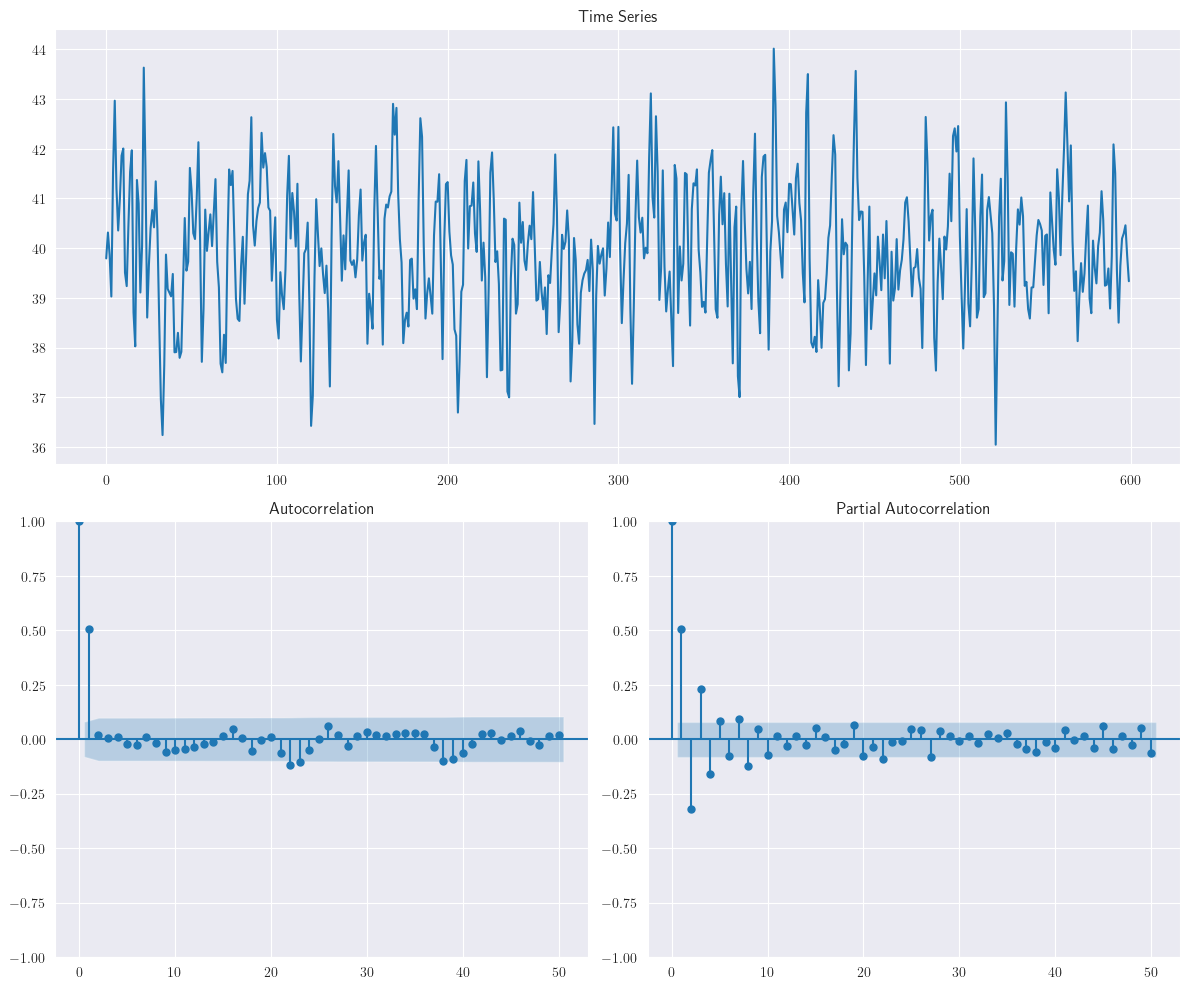

In [3]:
np.random.seed(12345)
n=600
arparams = np.array([0])   # phi1, phi2,...
maparams = np.array([0.8]) # theta1, theta2,...
intercept = 40

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ar1_data)

- Analogamente, el siguiente gráfico corresponden al proceso $MA(1)$: $y_{t}=40+\varepsilon_{t}-0.8\varepsilon_{t-1}$. Podemos observar que las observaciones ***tienden a oscilar sucesivamente***. Esto sugiere una ***autocorrelación negativa***, como lo confirma el gráfico de la `ACF` de la muestra.

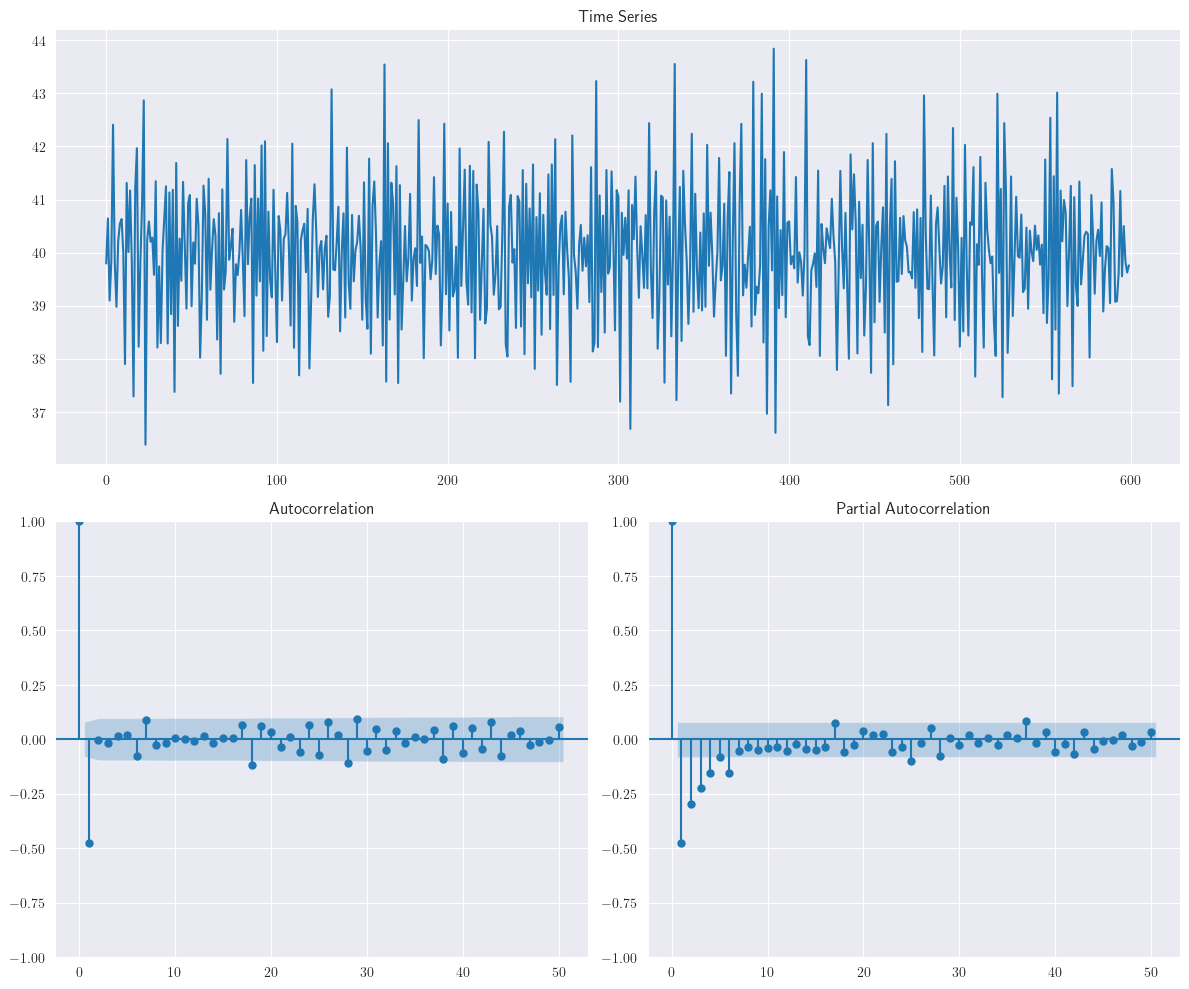

In [4]:
np.random.seed(12345)
n=600
arparams = np.array([0])   # phi1, phi2,...
maparams = np.array([-0.8]) # theta1, theta2,...
intercept = 40

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data =  intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ar1_data)

## El Proceso de Media Móvil de Segundo Orden, $MA(2)$

````{admonition} Media Móvil de Segundo Orden $MA(2)$
:class: tip

- Otro ***proceso de media móvil de orden finito*** útil es $MA(2)$, dado como

$$
\begin{align*}
y_{t}=\mu+\varepsilon_{t}-\theta_{1}\varepsilon_{t-1}-\theta_{2}\varepsilon_{t-2}=\mu+(1-\theta_{1}B-\theta_{2}B^{2})\varepsilon_{t}
\end{align*}
$$

- Las funciones de ***autocovarianza y autocorrelación*** para el modelo $MA(2)$ se expresan como

$$
\begin{align*}
\gamma_{y}(0) &= \sigma^{2}(1+\theta_{1}^{2}+\theta_{2}^{2})\\
\gamma_{y}(1) &= \sigma^{2}(-\theta_{1}+\theta_{1}\theta_{2})\\
\gamma_{y}(2) &= \sigma^{2}(-\theta_{2})\\
\gamma_{y}(k) &= 0,~k>2,\\
\end{align*}
$$

- Además, la ***función de autocorrelación*** está dada por

$$
\begin{align*}
\rho_{y}(1) &= \frac{-\theta_{1}+\theta_{1}\theta_{2}}{1+\theta_{1}^{2}+\theta_{2}^{2}}\\
\rho_{y}(2) &= \frac{-\theta_{2}}{1+\theta_{1}^{2}+\theta_{2}^{2}}\\
\rho_{y}(k) &= 0,~k>2.
\end{align*}
$$
````

- El siguiente gráfico muestra la serie temporal y la ***función de autocorrelación*** para la realización del modelo $MA(2)$: $y_{t}=40+\varepsilon_{t}+0.7\varepsilon_{t-1}-0.28\varepsilon_{t-2}$

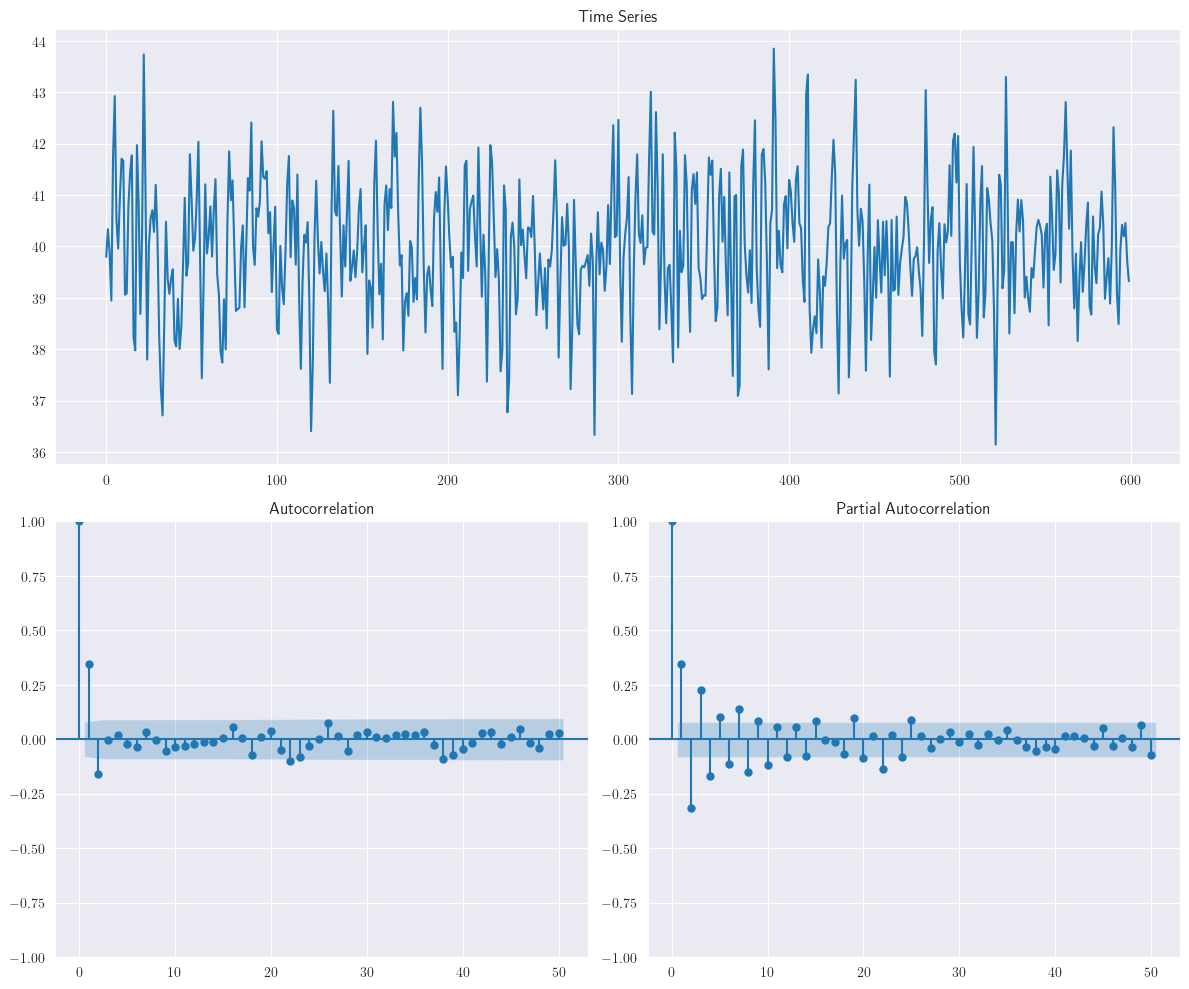

In [5]:
np.random.seed(12345)
n=600
arparams = np.array([0])   # phi1, phi2,...
maparams = np.array([0.7, -0.28]) # theta1, theta2,...
intercept = 40

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Observe que la ***función de autocorrelación muestral se anula después del rezago 2***.

````{admonition} Observación
:class: tip

- El ***teorema de descomposición de Wold***, es poderoso, pero no ayuda mucho en nuestros esfuerzos de modelado y pronóstico, ya que requiere implícitamente la estimación de infinitos pesos, $\psi_{i}$. Discutiremos un caso especial de esta descomposición, ***asumiendo que el proceso de series temporales puede ser adecuadamente modelado al estimar solo un número finito de pesos y establecer el resto en cero***. 

- Otra interpretación de los procesos `MA` de orden finito es que, ***en cualquier momento, solo un número finito de perturbaciones pasadas "contribuyen" al valor actual de la serie temporal***, y que ***la ventana temporal de los contribuyentes "se mueve", haciendo que la perturbación "más antigua" sea obsoleta para la siguiente observación***. 
````

## Procesos autorregresivos de orden finito

- Algunos procesos pueden tener las dinámicas intrínsecas mencionadas en la anterior observación, pero para otros, es posible que necesitemos ****considerar las contribuciones "persistentes" de las perturbaciones que ocurrieron en el pasado****. Una solución a este problema son los ****modelos autorregresivos, en los cuales se asume que los infinitos pesos siguen un patrón distintivo**** y pueden ser ****representados con éxito con solo unos pocos parámetros****. Ahora consideraremos algunos casos especiales de procesos autorregresivos.

## Proceso autorregresivo de primer orden, $AR(1)$

````{admonition} Teorema
:class: tip

- Considere el ***siguiente proceso lineal estable***, con serie de tiempo ${\varepsilon}_{t}$, ruido blanco,

    $$
    y_{t}=\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i}.
    $$

- Además, para ***garantizar decrecimiento exponencial***, fije $\psi_{i}=\phi^{i}$, donde $|\phi|<1$. 

- Demuestre que el ***proceso autorregresivo de primer orden***, está dado por 

    $$
    y_{t}=\delta+\phi y_{t-1}+\varepsilon_{t}.
    $$(ar1_process_formula)

- Además, demuestre que si $|\phi|>1$, existe una ***solución estacionaria para el proceso*** $AR(1)$; ***sin embargo, esta solución es no-causal*** o no-convergente (*requiere conocimiento sobre el futuro para hacer pronósticos sobre él*).

- Pruebe que, para el proceso $AR(1)$, el ***valor esperado, covarianza y autocorrelación***, están dados por

    $$
    \begin{align*}
    \text{E}(y_{t}) &= \frac{\delta}{1-\phi}\\
    \gamma(k) &= \sigma^{2}\phi^{k}\frac{1}{1-\phi^{2}},~\text{para}~k=0,1,2,\dots\\
    \rho(k) &= \phi^{k},~\text{para}~k=0,1,2,\dots
    \end{align*}
    $$(ar1_mean_covariance_acf)
````

***`Demostración`***

- Primero, volvamos a considerar la serie temporal dada en la Ecuación {eq}`linear_filter_white_noise` asociada con el proceso lineal estable

  $$
  y_{t}=\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i}=\mu+\sum_{i=0}^{\infty}\psi_{i}B^{i}\varepsilon_{t}=\mu+\Psi(B)\varepsilon_{t},
  $$

  donde $\Psi(B)=\sum_{i=0}^{\infty}\psi_{i}B^{i}$.

- Una manera de modelar esta serie temporal es ***asumir que las contribuciones de las perturbaciones que ocurrieron hace mucho tiempo deberían ser pequeñas en comparación con las perturbaciones más recientes experimentadas por el proceso***. Dado que las perturbaciones son variables aleatorias independientes e idénticamente distribuidas, podemos simplemente ***asumir un conjunto de infinitas ponderaciones en magnitudes descendentes que reflejen la disminución en las contribuciones de las perturbaciones pasadas***.

- Un conjunto simple e intuitivo de ***estas ponderaciones pueden seguir un patrón de decaimiento exponencial***. Para ello, estableceremos $\psi_{i}=\phi^{i}$, donde $|\phi|<1$ para ***garantizar el "decaimiento" exponencial***. Con esta notación, las ponderaciones en las perturbaciones, comenzando desde la perturbación actual y retrocediendo en el tiempo, serán $1, \phi, \phi^{2}, \phi^{3},\dots$.

- Por lo tanto, la Ecuación {eq}`linear_filter_white_noise` puede escribirse como:

$$
y_{t}=\mu+\varepsilon_{t}+\phi\varepsilon_{t-1}+\phi^{2}\varepsilon_{t-2}+\cdots=\mu+\sum_{i=0}^{\infty}\phi^{i}\varepsilon_{t-i}.
$$(phii_epsilon_linearcombiantion)

- De la Ecuación {eq}`phii_epsilon_linearcombiantion` obtenemos

  $$
  y_{t-1}=\mu+\varepsilon_{t-1}+\phi\varepsilon_{t-2}+\phi^{2}\varepsilon_{t-3}+\cdots
  $$(phii_epsilon_linearcombiantion_lag1)

- Usando Ecuación {eq}`phii_epsilon_linearcombiantion` y Ecuación {eq}`phii_epsilon_linearcombiantion_lag1`

  $$
  \begin{align*}
  y_{t} &= \mu+\varepsilon_{t}+\phi\varepsilon_{t-1}+\phi^{2}\varepsilon_{t-2}+\cdots\\
  &= \mu+\varepsilon_{t}+\phi(\varepsilon_{t-1}+\phi\varepsilon_{t-2}+\cdots)\\
  &= \mu+\varepsilon_{t}+\phi(y_{t-1}-\mu)\\
  &= \textcolor{red}{\mu-\phi\mu}+\phi y_{t-1}+\varepsilon_{t}\\
  &= \textcolor{red}{\delta}+\phi y_{t-1}+\varepsilon_{t},
  \end{align*}
  $$(first_ar_model_proof)

  donde $\delta=(1-\phi)\mu$.

- El proceso de la Ecuación {eq}`first_ar_model_proof` es llamado ***proceso autorregresivo de primer orden***, $AR(1)$, dado que Ecuación {eq}`first_ar_model_proof` puede verse como una regresión de $y_{t}$ sobre $y_{t-1}$, es por esto que se usa el término autorregresivo.

````{admonition} Observación
- El supuesto de $|\phi|<1$ ***conduce a ponderaciones que decaen exponencialmente en el tiempo y también garantiza que*** $\sum_{i=0}^{\infty}|\psi_{i}|<\infty$. Esto significa que un proceso $AR(1)$ ***es estacionario si*** $|\phi|<1$. 

- Para $|\phi|>1$, las perturbaciones pasadas obtendrán ***ponderaciones exponencialmente crecientes*** a medida que pasa el tiempo y la ***serie temporal resultante será explosiva***. Este tipo de procesos son de ***poco interés práctico y, por lo tanto, solo consideran casos donde*** $|\phi|=1$ y $|\phi|<1$.
````

- La solución en Ecuación {eq}`phii_epsilon_linearcombiantion` de hecho no converge para $|\phi|>1$. Sin embargo, podemos reescribir el proceso $AR(1)$ para $y_{t+1}$ como $y_{t+1}=\delta+\phi y_{t}+\varepsilon_{t+1}$. Entonces, por medio de operaciones de despeje en esta última igualdad, obtenemos

  $$
  \begin{align*}
  y_{t} &= -\phi^{-1}\delta+\phi^{-1}y_{t+1}-\phi^{-1}\varepsilon_{t+1}\\
  &=-\phi^{-1}\delta+\phi^{-1}(-\phi^{-1}\delta+\phi^{-1}y_{t+2}-\phi^{-1}\varepsilon_{t+2})-\phi^{-1}\varepsilon_{t+1}\\
  &= -\phi^{-1}\delta-\phi^{-2}\delta+\phi^{-2}y_{t+2}-\phi^{-2}\varepsilon_{t+2}-\phi^{-1}\varepsilon_{t+1}\\
  &= -(\phi^{-1}+\phi^{-2})\delta+\phi^{-2}y_{t+2}-\phi^{-1}\varepsilon_{t+1}-\phi^{-2}\varepsilon_{t+2}\\
  &\hspace{2mm}\vdots\\
  &=-\delta\sum_{i=1}^{\infty}\phi^{-i}-\sum_{i=1}^{\infty}\phi^{-i}\varepsilon_{t+i}.
  \end{align*}
  $$(noncasual_ar1_proof)

- Nótese que para $|\phi|>1$ se tiene que $|\phi^{-i}|<1$. Por lo tanto, la solución vía $AR(1)$ es estacionaria para $|\phi|>1$. Sin embargo, ***la solución dada por la Ecuación*** {eq}`noncasual_ar1_proof` ***involucra futuras perturbaciones***, las cuales deseamos predecir, lo cual no es *impráctico*. Este tipo de modelos son conocidas como, ***modelos no-causales***.

- Calculemos ahora, la media del ***proceso estacionario*** $AR(1)$. Nótese que

  $$
  \text{E}(y_{t})=\text{E}(\delta+\phi y_{t-1}+\varepsilon_{t})=\delta+\phi\text{E}(y_{t-1})+\text{E}(\varepsilon_{t})=\delta+\phi\text{E}(y_{t-1})
  $$(exp_value_ar1_calculus)

- Dado que el proceso $AR(1)$ es estacionario $\text{E}(y_{t})=\text{E}(y_{t-1})$. Entonces, despejando en la Ecuación {eq}`exp_value_ar1_calculus`, obtenemos que la media del proceso $AR(1)$ está dada por

  $$
  \text{E}(y_{t})=\frac{\delta}{1-\phi}.
  $$

- Por otro lado, para calcular ***autocovarianza del proceso*** $AR(1)$, nótese que, gracias a su estacionariedad se tiene que

  $$
  \gamma(0)=\text{Var}(y_{t})=\text{Var}(\delta+\phi y_{t-1}+\varepsilon_{t})=\phi^{2}\text{Var}(y_{t-1})+\sigma^{2}=\phi^{2}\gamma(0)+\sigma^{2}
  $$

- Por lo tanto, $\gamma(0)=\sigma^{2}/(1-\phi^{2})$. Analicemos la covarianza $\gamma(k)$, para algunos pocos valores de rezagos, usando sus propiedades (ver [Covariance](https://en.wikipedia.org/wiki/Covariance)), para realizar un razonamiento por inducción. Nótese que para $k=1, 2,\dots,k$, dado que el ***ruido blanco*** $\varepsilon_{t+1}$ ***iid es independiente de*** $y_{t}$, se tiene que

$$
\begin{align*}
\gamma(1) &= \text{Cov}(y_{t}, y_{t+1})\\[3mm]
&= \text{Cov}(y_{t}, \delta+\phi y_{t}+\varepsilon_{t+1})\\[3mm]
&= \text{Cov}(y_{t}, \phi y_{t}+\varepsilon_{t+1})\\[3mm]
&= \phi\text{Cov}(y_{t}, y_{t})+\text{Cov}(y_{t}, \varepsilon_{t+1})\\[3mm]
&= \phi\text{Var}(y_{t})\\
&= \phi\frac{\sigma^{2}}{(1-\phi^{2})},\\
\gamma(2) &= \text{Cov}(y_{t}, y_{t+2})\\[3mm]
&= \text{Cov}(y_{t}, \delta+\phi y_{t+1}+\varepsilon_{t+2})\\[3mm]
&= \text{Cov}(y_{t}, \delta+\phi(\delta+\phi y_{t}+\varepsilon_{t+1})+\varepsilon_{t+2})\\[3mm]
&= \text{Cov}(y_{t}, \delta+\phi\delta+\phi^{2}y_{t}+\phi\varepsilon_{t+1}+\varepsilon_{t+2})\\[3mm]
&= \phi^{2}\text{Var}(y_{t})\\
&=\phi^{2}\frac{\sigma^{2}}{(1-\phi^{2})},\\
&\hspace{3mm}\vdots\\
\gamma(k)&=\phi^{k}\frac{\sigma^{2}}{(1-\phi^{2})}.
\end{align*}
$$

- Además, la ***función de autocorrelación*** para el proceso $AR(1)$ está dada por

$$
\rho(k)=\frac{\gamma(k)}{\gamma(0)}=\frac{\displaystyle{\phi^{k}\sigma^{2}/(1-\phi^{2})}}{\displaystyle{\sigma^{2}/(1-\phi^{2})}}=\phi^{k},\quad k=0,1,2,\dots
$$

- Por lo tanto, la función de autocorrelación para un proceso $AR(1)$ ***tiene forma de decaimiento exponencial***. Una realización del siguiente modelo $AR(1)$,

  $$
  y_{t}=8+0.8y_{t-1}+\varepsilon_{t}
  $$

  se muestra en la siguiente figura:

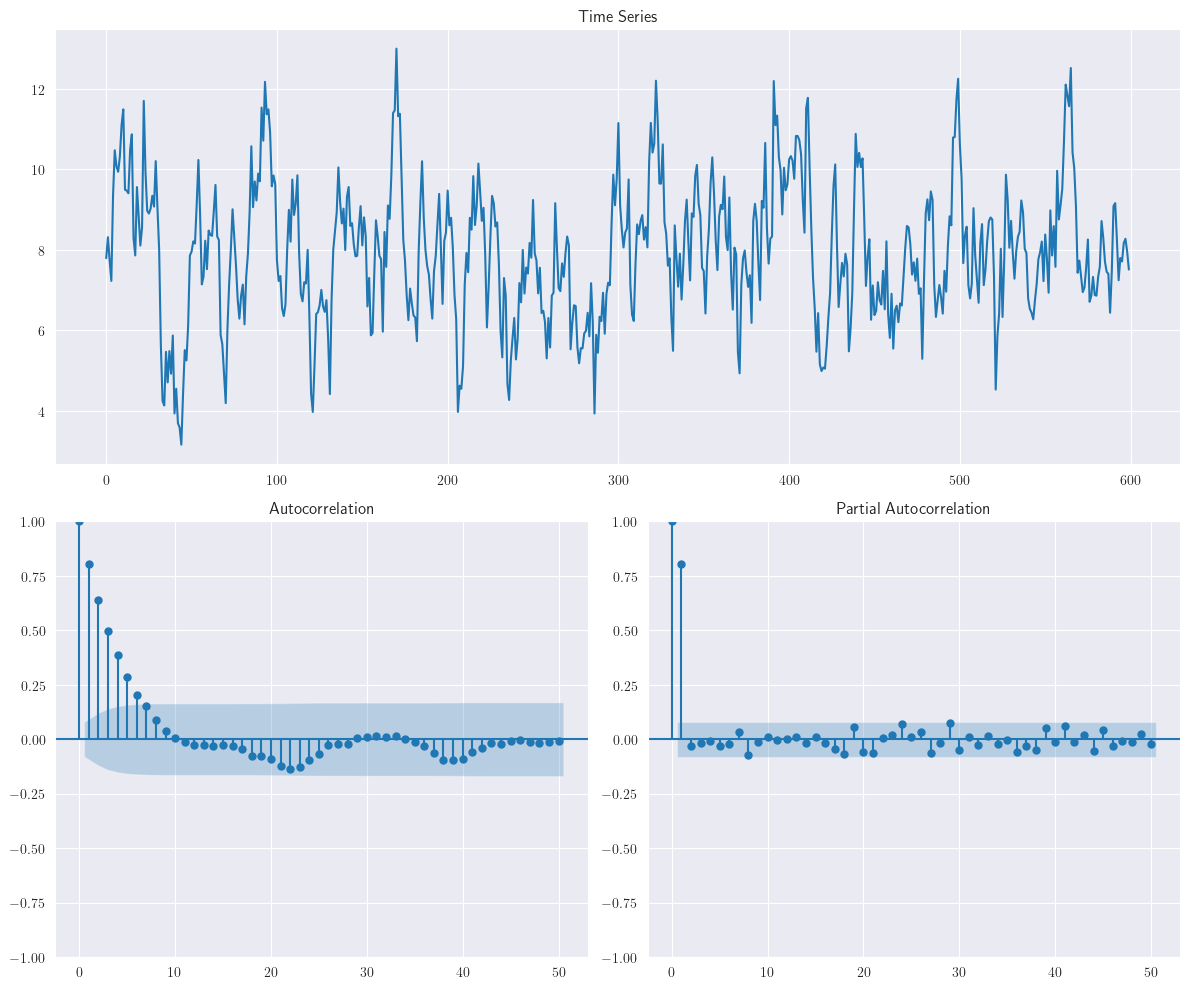

In [6]:
np.random.seed(12345)
n=600
arparams = np.array([0.8])   # phi1, phi2,...
maparams = np.array([0]) # theta1, theta2,...
intercept = 8

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Al igual que en el modelo $MA(1)$ con $\theta = −0.8$, podemos observar algunos ***cortos períodos durante los cuales las observaciones tienden a moverse en dirección ascendente o descendente***. A diferencia del modelo $MA(1)$, ***sin embargo, la duración de estos períodos tiende a ser más larga y la tendencia tiende a persistir***. Esto también puede observarse en el gráfico de la ***función de autocorrelación*** (`ACF`) de la muestra.

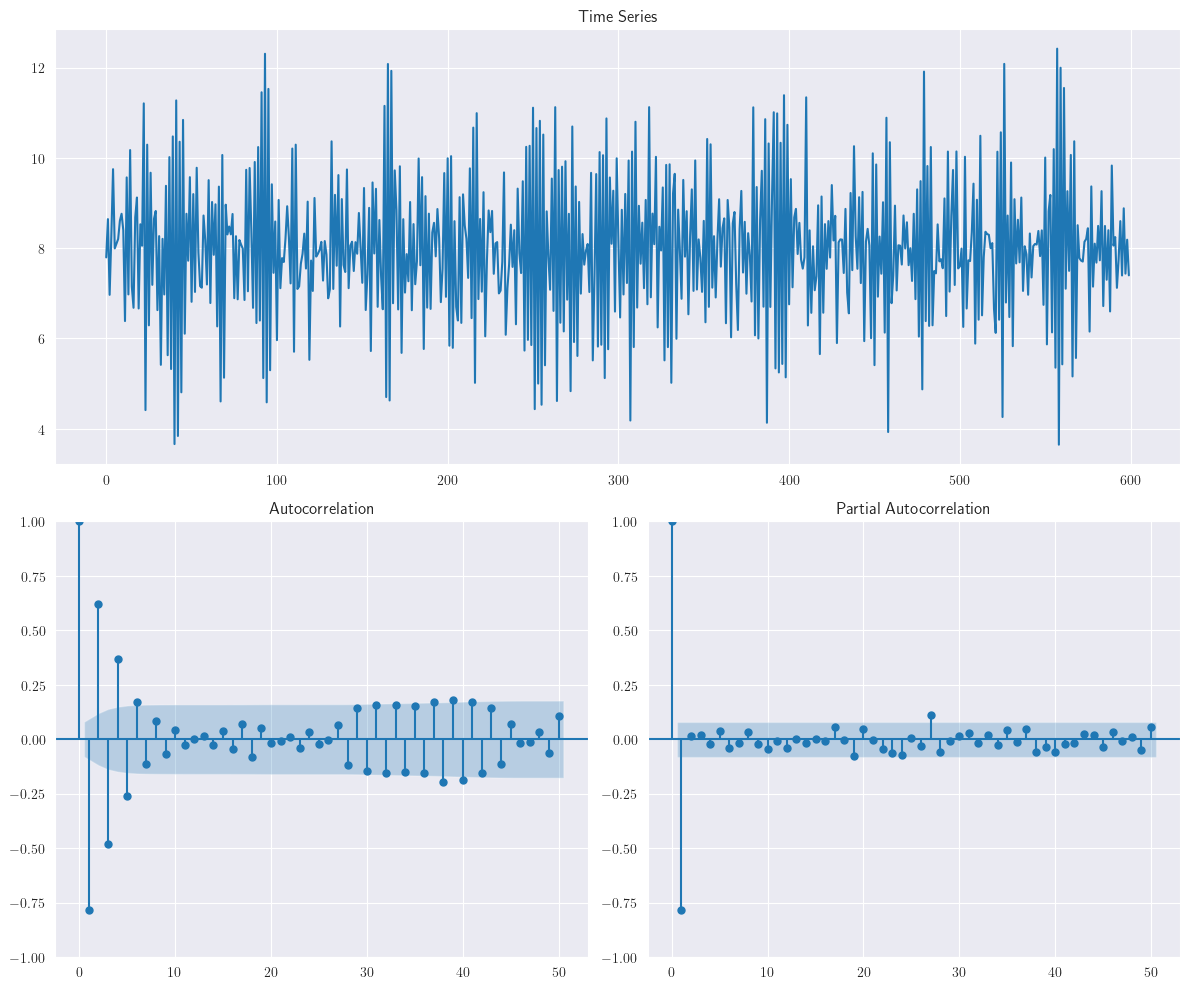

In [7]:
np.random.seed(12345)
n=600
arparams = np.array([-0.8])   # phi1, phi2,...
maparams = np.array([0]) # theta1, theta2,...
intercept = 8

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- La figura anterior muestra una realización del modelo $AR(1)$ $y_{t} = 8 − 0.8y_{t-1} + \varepsilon_{t}$. Observamos que ***en lugar de secuencias persistentes, las observaciones exhiben movimientos volatiles hacia arriba/abajo debido al valor negativo de*** $\Phi$.

## Proceso autorregresivo de segundo orden, $AR(2)$

````{admonition} Teorema

- La clara extensión de la Ecuación {eq}`ar1_process_formula` incluye la observación $y_{t-2}$ y define el ***proceso autorregresivo de segundo orden*** $AR(2)$ como

$$
y_{t}=\delta+\phi y_{t-1}+\phi_{2}y_{t-2}+\varepsilon_{t}.
$$(ar2_process_formula)

- Demuestre que el proceso $AR(2)$ ***es estacionario si los parámetros*** $\phi_{1}, \phi_{2}$ ***satisfacen***

$$
\phi_{1}+\phi_{2}<1,~\phi_{2}-\phi_{1}<1,~|\phi_{2}|<1.
$$(stationarity_conditions_ar2)

- Además, 

$$
\begin{align*}
\text{E}(y_{t}) &= \frac{\delta}{1-\phi_{1}-\phi_{2}}\\
\gamma(k) &=\phi_{1}\gamma(k-1)+\phi_{2}\gamma(k-2)+\begin{cases} \sigma^{2} & k=0\\ 0 & k>0\end{cases},~\textsf{Yule-Walker}\\
\rho(k) &= \phi_{1}\rho(k-1)+\phi_{2}\rho(k-2),~k=1,2,\dots,
\end{align*}
$$(mean_autocovariance_autocorrelation)

- Más aún, las raíces de las ***ecuaciones de Yule-Walker muestran combinación de dos términos: decaimiento exponencial y forma sinusoidal amortiguada***.
````

***`Demostración`***

- Nótese que la Ecuación {eq}`ar2_process_formula` puede reescribirse como

  $$
  y_{t}=\delta+\phi_{1}By_{t}+\phi_{2}B^{2}y_{t}+\varepsilon_{t}\Rightarrow(1-\phi_{1}B-\phi_{2}B^{2})y_{t}=\delta+\varepsilon_{t}\Rightarrow\Phi(B)y_{t}=\delta+\varepsilon_{t}.
  $$

- Aplicando el operador inverso $\Phi(B)^{-1}$ en ambos miembros de la igualdad se tiene

$$
y_{t}=\textcolor{red}{\Phi(B)^{-1}\delta}+\textcolor{red}{\Phi(B)^{-1}}\varepsilon_{t}=\mu+\Psi(B)\varepsilon_{t}=\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i}=\mu+\sum_{i=0}^{\infty}\psi_{i}B^{i}\varepsilon_{t}.
$$

- Dado que $\Psi(B)=\Phi(B)^{-1}$ entonces $\Phi(B)\Psi(B)=1$, esto es

  $$
  \begin{align*}
  (1-\phi_{1}B-\phi_{2}B^{2})(\psi_{0}+\psi_{1}B+\psi_{2}B^{2}+\cdots) &= 1\Leftrightarrow\\
  \psi_{0}+(\psi_{1}-\phi_{1}\psi_{0})B+(\psi_{2}-\phi_{1}\psi_{1}-\phi_{2}\psi_{0})B^{2}+\cdots+(\psi_{j}-\phi_{1}\psi_{j-1}-\phi_{2}\psi_{j-2})B^{j} &= 1\Leftrightarrow
  \end{align*}
  $$

$$
\begin{align*}
\psi_{0} &= 1\\
\psi_{1}-\phi_{1}\psi_{0} &= 0\\
&\hspace{2mm}\vdots\\
\psi_{j}-\phi_{1}\psi_{j-1}-\phi_{2}\psi_{j-2} &= 0,~j=2,3,\dots,
\end{align*}
$$(diff_eq_second_order)

````{admonition} Ecuación en diferencias lineal homogénea de orden $n$
:class: dropdown

- Una ***ecuación en diferencias lineal homogénea de orden*** $n$ está dada por

    $$
    y(t+n)+a_{1}y(t+n-1)+\cdots+a_{n-1}y(t+1)+a_{n}y(t)=0,~\text{con}~a_{i}\in\mathbb{R},
    $$(homogeneous_difference_equation)

    $\forall i~\text{y}~a_{n}\neq0$.

- A la siguiente ecuación 

    $$
    P(r)=m^{n}+a_{1}m^{n-1}+a_{2}m^{n-2}+\cdots+a_{n-1}m+a_{n}=0,
    $$(characteristic_equation_ngrade)
    
    la llamamos ***ecuación característica asociada a la ecuación en diferencias lineal homogénea de orden*** $n$ {eq}`homogeneous_difference_equation`.
````

- Para encontrar ***soluciones homogéneas no triviales***, asumimos soluciones de la forma $\psi_{j}=Am^{j}$, $~A, m\in\mathbb{R}\setminus\{0\}$. Entonces la ***ecuación característica*** asociada a la Ecuación {eq}`diff_eq_second_order` tomaría la forma

  $$
  \psi_{j}-\phi_{1}\psi_{j-1}-\phi_{2}\psi_{j-2}=Am^{j}-\phi_{1}Am^{j-1}-\phi_{2}Am^{j-2}=0\Leftrightarrow m^{2}-\phi_{1}m-\phi_{2}=0.
  $$

- Las raíces son obtenidas por medio del uso de la fórmula general. Estudiaremos ***tres casos para sus posibles raíces***

$$
m_{1,2}=\frac{\phi_{1}\pm\sqrt{\phi_{1}^{2}+4\phi_{2}}}{2}
$$(roots_diff_equations_ar2)

- Nótese que si $|m_{i}|<1,~i=1,2$ entonces $\sum_{i=0}^{\infty}|\psi_{i}|<\infty$. Por lo tanto, el modelo sería ***causal estacionario***. Además, si las ***raices de la Ecuación*** {eq}`roots_diff_equations_ar2` ***son complejas***, esto es, de la forma $a+bi,~i=\sqrt{-1}$, la ***estacionariedad se tendría si***

  $$
  |a+bi|=\sqrt{a^{2}+b^{2}}<1
  $$

- Además, bajo estas condiciones $\{y_{t}\}_{t}$ tendría una representación como $MA$ infinito (ver Ecuación {eq}`moving_average_backshift`). Dado que se tiene ***estacionariedad si*** $|m_{i}|<1,~i=1,2$, entonces

  $$
  -1<\frac{\phi_{1}\pm\sqrt{\phi_{1}^{2}+4\phi_{2}}}{2}<1\Leftrightarrow-2<\phi_{1}\pm\sqrt{\phi_{1}^{2}+4\phi_{2}}<2.
  $$

- Analicemos el valor más grande de $m_{i},~i=1,2$, el cual es acotado por $\phi_{1}+\sqrt{\phi_{1}^{2}+4\phi_{2}}<2$

  $$
  \begin{align*}
  \phi_{1}+\sqrt{\phi_{1}^{2}+4\phi_{2}}<2 &\Rightarrow \sqrt{\phi_{1}^{2}+4\phi_{2}}<2-\phi_{1}\\
  &\Rightarrow\phi_{1}^{2}+4\phi_{2}<(2-\phi_{1})^{2}\\[1mm]
  &\Rightarrow\phi_{1}^{2}+4\phi_{2}<4-4\phi_{1}+\phi_{1}^{2}\\[2mm]
  &\Rightarrow\textcolor{red}{\phi_{1}+\phi_{2}<1}.
  \end{align*}
  $$(complex_root_inequality1)

- Usando la otra desigualdad $-2<\phi_{1}\pm\sqrt{\phi_{1}^{2}+4\phi_{2}}$, se tiene que (***`verifíquelo`***)

  $$
  \textcolor{red}{\phi_{2}-\phi_{1}<1}.
  $$(complex_root_inequality2) 

- Nótese que si $m_{i}$ es una ***raíz compleja***, entonces: $\phi_{1}^{2}+4\phi_{2}<0\Leftrightarrow\phi_{1}^{2}<-4\phi_{2}$, y además

  $$
  m_{1,2}=\frac{\phi_{1}}{2}\pm\frac{\sqrt{-\left(\phi_{1}^{2}+4\phi_{2}\right)}}{2}i.
  $$

- Por lo tanto, el ***módulo complejo*** está dado por

$$
|m_{1,2}|=\left(\frac{\phi_{1}}{2}\right)^{2}+\left(\frac{\sqrt{-\left(\phi_{1}^{2}+4\phi_{2}\right)}}{2}\right)^{2}=\frac{1}{4}\phi_{1}^{2}-\frac{1}{4}(\phi_{1}^{2}+4\phi_{2})=-\phi_{2}.
$$

- Entonces, se tiene ***estabilidad si*** $|m_{i}|<1$, esto es,  si $-\phi_{2}<1\Rightarrow\phi_{2}>-1$. Las Ecuaciones {eq}`complex_root_inequality1`-{eq}`complex_root_inequality2` entregan vía método de eliminación que $\phi_{2}<1$, por lo tanto, $\textcolor{red}{|\phi_{2}|<1}$. De esta forma, las ***condiciones de estacionariedad*** son las siguientes:

  $$
  \begin{align*}
  \phi_{1}+\phi_{2} &< 1\\
  \phi_{2}-\phi_{1} &< 1\\
  |\phi_{2}| &< 1
  \end{align*}
  $$

````{figure} ./figures/complex_roots_ar2_model.png
:name: complex_roots_ar2_model_fig
:align: center

Funciones típicas de ***autocorrelación y autocorrelación parcial*** $\rho_{k}$ y $\phi_{kk}$ para varios modelos $AR(2)$ estacionarios. (Fuente: {cite}`stralkowski1968lower`).
````

- Procedemos a calcular ahora, ***media y autocovarianza***. Si se satisface la Ecuación {eq}`stationarity_conditions_ar2`, el proceso $AR(2)$ ***es estacionario***, y, por lo tanto,

$$
\begin{align*}
\text{E}(y_{t}) &= \text{E}(\delta+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\varepsilon_{t})\\[2mm]
&= \delta+\phi_{1}\text{E}(y_{t-1})+\phi_{2}\text{E}(y_{t-2})+0\\[2mm]
&= \delta+(\phi_{1}+\phi_{2})\text{E}(y_{t})\Rightarrow\\
\text{E}(y_{t}) &= \frac{\delta}{1-\phi_{1}-\phi_{2}}
\end{align*}
$$

- Nótese que si $1-\phi_{1}-\phi_{2}=0$ entonces $m=1$ es solución de $m^{2}-\phi_{1}m-\phi_{2}=0$, y, ***por lo tanto, la serie se considera no estacionaria***. Calculemos ahora la ***autocovarianza***

$$
\begin{align*}
\gamma(k) &= \text{Cov}(y_{t}, y_{t-k})\\[2mm]
&= \text{Cov}(\delta+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\varepsilon_{t}, y_{t-k})\\[2mm]
&= \phi_{1}\text{Cov}(y_{t-1}, y_{t-k})+\phi_{2}\text{Cov}(y_{t-2}, y_{t-k})+\text{Cov}(\varepsilon_{t}, y_{t-k})\\
&= \phi_{1}\gamma(k-1)+\phi_{2}\gamma(k-2)+\begin{cases}\sigma^{2}, & k=0\\0, & k>0\end{cases},\quad\textsf{Yule-Walker}.
\end{align*}
$$

- Entonces, si $k=0$, se tiene que $\gamma(0)=\phi_{1}\gamma(1)+\phi_{2}\gamma(2)+\sigma^{2}$ (`¿por qué?`) y además

  $$
  \gamma(k)=\phi_{1}\gamma(k-1)+\phi_{2}\gamma(k-2).
  $$(yuli_walker_equation_ar2)

- Las Ecuaciones en {eq}`yuli_walker_equation_ar2` se llaman las ***Ecuaciones de Yule-Walker*** para $\gamma(k)$. De manera similar, podemos obtener la ***función de autocorrelación*** al dividir la Ecuación {eq}`yuli_walker_equation_ar2` por $\gamma(0)$:

  $$
  \begin{align*}
  \rho(k) &= \frac{\gamma(k)}{\gamma(0)}\\
  &= \phi_{1}\frac{\gamma(k-1)}{\gamma(0)}+\phi_{2}\frac{\gamma(k-2)}{\gamma(0)}\\[2mm]
  &= \phi_{1}\rho(k-1)+\phi_{2}\rho(k-2),~k=1,2,\dots
  \end{align*}
  $$(yule_walker_autocorrelation_ar2)

- Las ***Ecuaciones de Yule-Walker*** para $\rho(k)$ en Ecuación {eq}`yule_walker_autocorrelation_ar2` pueden ser resueltas de manera iterativa 

$$
\begin{align*}
k=1 & \Rightarrow\rho(1)=\phi_{1}\rho(0)+\phi_{2}\rho(-1)=\phi_{1}\cdot1+\phi_{2}\rho(1)\Rightarrow\rho_{1}=\frac{\phi_{1}}{1-\phi_{2}}\\
k=2 & \Rightarrow\rho(2)=\phi_{1}\rho(1)+\phi_{2}\rho(0)=\phi_{1}\left(\frac{\phi_{1}}{1-\phi_{2}}\right)+\phi_{2}=\frac{\phi_{1}^{2}+\phi_{2}(1-\phi_{2})}{1-\phi_{2}}\\[3mm]
k=3 & \Rightarrow\rho(3)=\phi_{1}\rho(2)+\phi_{2}\rho(1)\\
&\hspace{2mm}\vdots\\
k=j & \Rightarrow\rho(j)=\phi_{1}\rho(j-1)+\phi_{2}\rho(j-2)\\
&\hspace{2mm}\vdots
\end{align*}
$$(yule_walker_autocorrelation_ar2_rho)

- Considerando $\rho(j)=Am^{j},~A, m\in\mathbb{R}\setminus\{0\}$ entonces, la ***Ecuación Característica*** asociada a la Ecuación {eq}`yule_walker_autocorrelation_ar2_rho` puede ser escrita como

  $$
  Am^{j}=\phi_{1}Am^{j-1}+\phi_{2}Am^{j-2}\Leftrightarrow m^{2}-\phi_{1}m-\phi_{2}=0.
  $$

````{admonition} Ecuación característica
:class: dropdown

- Si $m_{0}$ es solución de la ecuación característica {eq}`characteristic_equation_ngrade`, entonces $y_{t}=Am_{0}^{t}$ es solución de {eq}`homogeneous_difference_equation`

- Al resolver la ***ecuación característica*** pueden ocurrir los siguientes casos:

    1. La ecuación característica {eq}`characteristic_equation_ngrade` tiene todas sus ***raíces reales y simples*** $m_{1}, m_{2},\dots, m_{n}$, entonces

    $$
    y_{h}(t)=c_{1}m_{1}^{t}+c_{2}m_{2}^{t}+\cdots+c_{n}m_{n}^{t}
    $$

    2. La ecuación característica {eq}`characteristic_equation_ngrade` tiene todas ***sus raíces reales***: $m_{1}$ ***con multiplicidad***, $k$ y $m_{k+1}, \dots, m_{n}$ simples, entonces

    $$
    y_{h}(t)=c_{1}m_{1}^{t}+c_{2}tm_{1}^{t}+\cdots+c_{k}t^{k-1}m_{1}^{t}+c_{k+1}t^{k}m_{k+1}^{t}+\cdots+c_{n}m_{n}^{t}.
    $$

    3. La ecuación característica {eq}`characteristic_equation_ngrade` tiene ***raíces complejas simples***. Si $m_{1,2}=\alpha\pm\beta i$, son raices complejas conjugadas, siendo $\rho=\sqrt{\alpha^{2}+\beta^{2}}$ el módulo y $\theta=\textsf{arctan}(\beta/\alpha)$ el argumento correspondiente, entonces la solución asociada a las raíces $m_{1}, m_{2}$ es

    $$
    y_{h}(t)=\rho^{t}(A\cos(\theta t)+B\sin(\theta t)).
    $$
````

1. Si $m_{1}, m_{2}$ son ***raíces reales distintas***, tenemos que

   $$
   \rho(k)=c_{1}m_{1}^{k}+c_{2}m_{2}^{k},~k=1,2,\dots
   $$

   donde $c_{1}, c_{2}$ son constantes y pueden ser obtenidas a partir de $\rho(0), \rho(1)$. Dado que $|m_{1,2}|<1$ por estacionariedad, la autocorrelación es una ***combinación de términos de decrecimiento exponencial***.

2. Si $m_{1}, m_{2}$ son ***raíces complejas conjugadas*** de la forma $a\pm bi$ entonces las raíces son de la forma

   $$
   \rho(k)=R^{k}(c_{1}\cos(mk)+c_{2}\sin(mk)),~k=0,1,2,\dots 
   $$

   donde $R=|m_{i}|=\sqrt{a^{2}+b^{2}},~i=1,2$, y $\lambda$ es determinado por $\cos(m)=a/R$ y $\sin(m)=b/R$. Por lo tanto, $a+bi=R(\cos(m)\pm\sin(m)i)$. Donde $c_{1}, c_{2}$ son constantes. La función $ACF$ en este caso tiene la forma de ***frecuencia senosoidal*** con factor de frecuencia $R$ y frecuencia $m$. Esto es, periodo $2\pi/\lambda$.

3. Existe ***una sola raíz real*** (*raíz doble*) $m_{1}=m_{2}=m_{0}$, entonces

   $$
   \rho(k)=(c_{1}+c_{2}k)m_{0}^{k},~k=0,1,2,\dots
   $$

   En este caso, la $ACF$ exhibe un ***patrón de decrecimiento exponencial***.

- En el ***Caso 1***, por ejemplo, ***un modelo AR(2)*** puede ser visto como un modelo ***AR(1) "ajustado"*** para el cual una única ***expresión de decaimiento exponencial como en el modelo*** $AR(1)$ ***no es suficiente para describir el patrón en la ACF***, y, por lo tanto, una ***expresión adicional de decaimiento exponencial se "agrega" al introducir el término de retardo de segundo orden***, $y_{t−2}$.

- La siguiente figura muestra la realización del proceso $AR(2)$: $y_{t}=4+0.4y_{t-1}+0.5y_{t-2}+\varepsilon_{t}$.

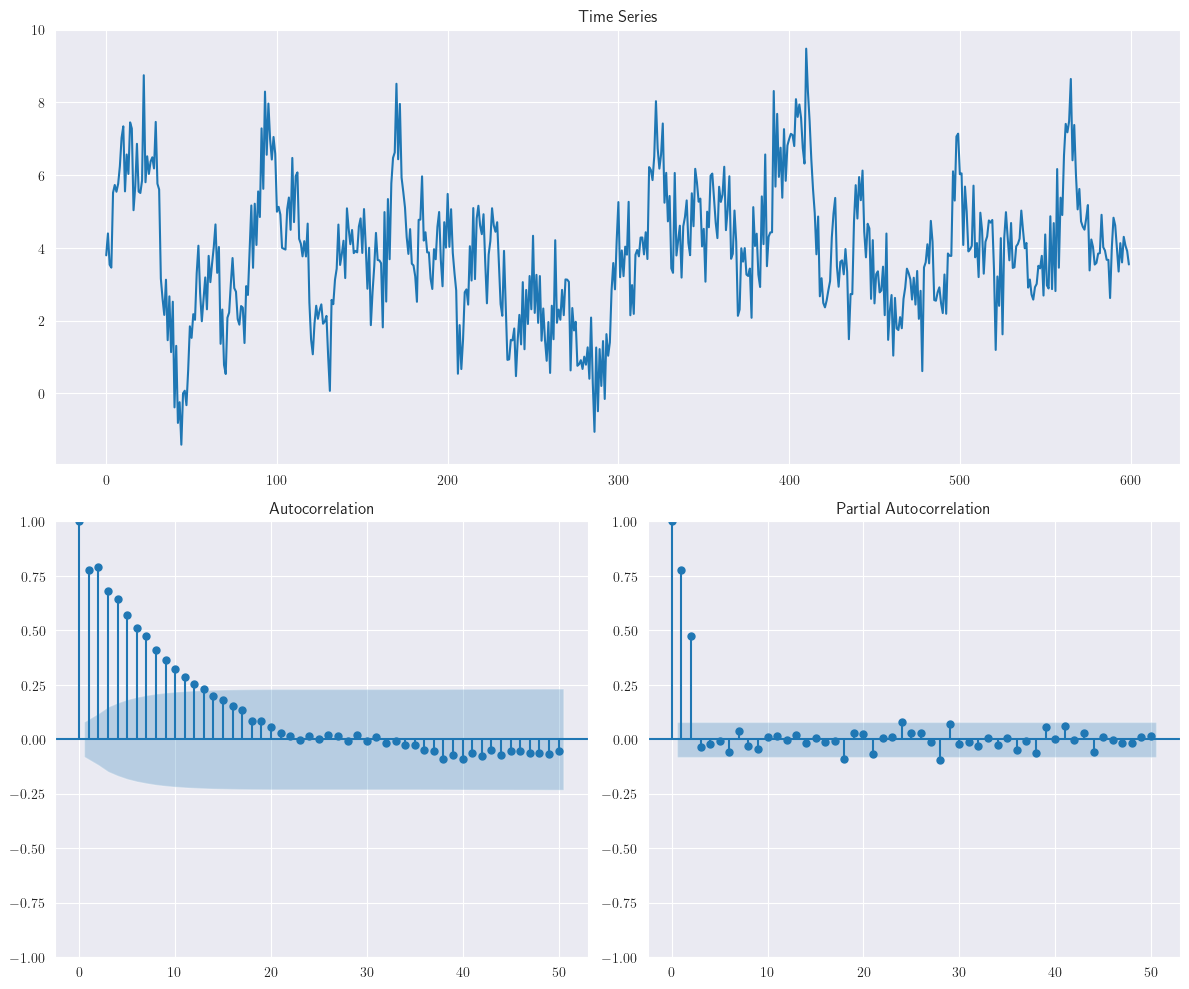

In [8]:
np.random.seed(12345)
n=600
arparams = np.array([0.4, 0.5])   # phi1, phi2,...
maparams = np.array([0]) # theta1, theta2,...
intercept = 4

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Tenga en cuenta que las ***raíces*** del polinomio asociado a este modelo son ***reales***. Por lo tanto, la ***ACF es una mezcla de dos términos de decaimiento exponencial***. De manera similar, la siguiente figura muestra una realización del siguiente proceso $AR(2)$: $y_{t}=4+0.4y_{t-1}-0.5y_{t-2}+\varepsilon_{t}$ 

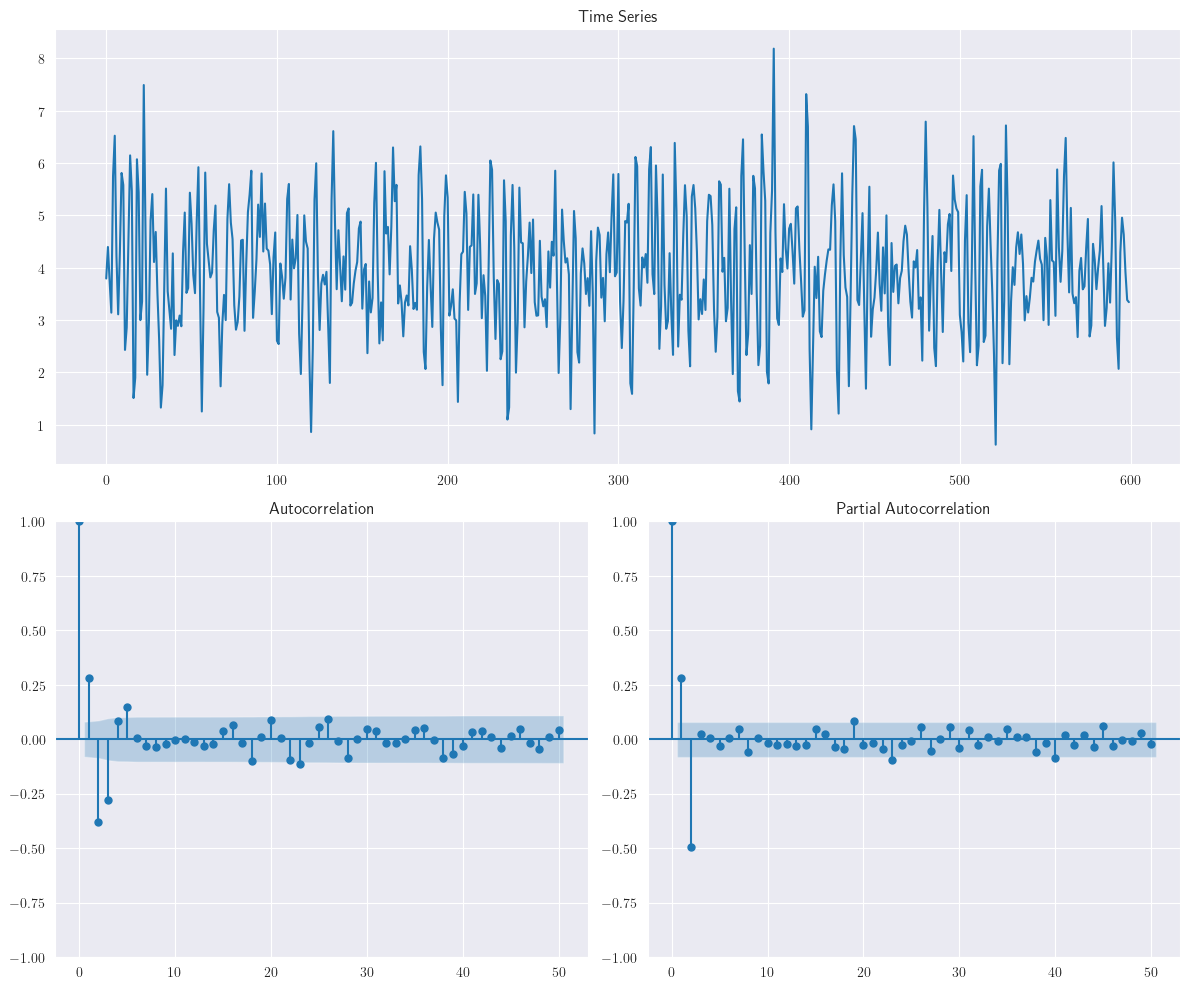

In [9]:
np.random.seed(12345)
n=600
arparams = np.array([0.4, -0.5])   # phi1, phi2,...
maparams = np.array([0]) # theta1, theta2,...
intercept = 4

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Para este proceso, las ***raíces del polinomio asociado son complejas conjugadas***. Por lo tanto, el gráfico de la función de autocorrelación ***(ACF) muestra un comportamiento de sinusoides amortiguadas***.

## Proceso autorregresivo general, $AR(p)$

- En las dos secciones anteriores, se presenta un ***modelo*** $AR$ ***general de orden*** $p$

  $$
  y_{t}=\delta+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t}
  $$(general_autorregresive_process_arp)

  donde $\varepsilon_{t}$ es ***ruido blanco***.

- Otra representación de la Ecuación {eq}`general_autorregresive_process_arp` se puede dar como

  $$
  \Phi(B)y_{t}=\delta+\varepsilon_{t}
  $$

  donde $\Phi(B)=1-\phi_{1}B-\phi_{2}B^{2}-\cdots-\phi_{p}B^{p}$.

- La serie temporal $AR(p)$, $\{y_{t}\}$ en la Ecuación {eq}`general_autorregresive_process_arp` es ***causal y estacionaria si las raíces del polinomio asociado***

  $$
  m^{p}-\phi_{1}m^{p-1}-\phi_{2}m^{p-2}-\cdots-\phi_{p}=0
  $$(characteristic_equation_arp)

  ***son menores que uno, en valor absoluto***.

- Además, bajo esta condición, la serie temporal $\{y_{t}\},~ AR(p)$ también se dice que tiene una ***representación*** $MA$ ***infinita, absolutamente sumable***

  $$
  y_{t}=\mu+\Psi(B)\varepsilon_{t}=\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i},
  $$(infinite_movingaverage_representation_arp)

  donde $\Psi(B)=\Phi(B)^{-1}$ con $\sum_{i=0}^{\infty}|\psi_{i}|<\infty$.

- Al igual que en $AR(2)$, los ***pesos de los choques aleatorios en la Ecuación*** {eq}`infinite_movingaverage_representation_arp` ***pueden obtenerse de*** $\Phi(B)\Psi(B)=1$ como

  $$
  \begin{align*}
  \psi_{j} &= 0,~ j<0\\
  \psi_{0} &= 1\\
  \psi_{j}-\phi_{1}\psi_{j-1}-\phi_{2}\psi_{j-2}-\cdots-\phi_{p}\psi_{j-p} &=0~\forall~j=1,2,\dots
  \end{align*}
  $$

- Podemos mostrar fácilmente que, para el proceso $AR(p)$ estacionario

  $$
  \text{E}(y_{t})=\mu=\frac{\delta}{1-\phi_{1}-\phi_{2}-\cdots-\phi_{p}}
  $$

  y

  $$
  \begin{align*}
  \gamma(k) &= \text{Cov}(y_{t}, y_{t-k})\\[5mm]
  &= \text{Cov}(\delta+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t}, y_{t-k})\\[2mm]
  &= \sum_{i=1}^{p}\phi_{i}\text{Cov}(y_{t-i}, y_{t-k})+\text{Cov}(\varepsilon_{t}, y_{t-k})\\
  &= \sum_{i=1}^{p}\phi_{i}\gamma(k-i)+\begin{cases}\sigma^{2} & \text{si}~k=0\\0 & \text{si}~k>0\end{cases}
  \end{align*}
  $$(covariance_autorregresive_arp)

- Por lo tanto, tenemos

$$
\begin{align*}
\gamma(0) &= \sum_{i=1}^{p}\phi_{i}\gamma(i)+\sigma^{2}\Rightarrow\\
\gamma(0)\left[1-\sum_{i=1}^{p}\phi_{i}\rho(i)\right] &= \sigma^{2} 
\end{align*}
$$

- Al dividir la Ecuación {eq}`covariance_autorregresive_arp` por $\gamma(0)$ para $k > 0$, se puede observar que la ***función de autocorrelación (ACF) de un proceso*** $AR(p)$ ***satisface las ecuaciones de Yule–Walker***

$$
\rho(k)=\sum_{i=1}^{p}\phi_{i}\rho(k-i),~k=1,2,\dots
$$(yule_walker_equation_arp)

- Las Ecuaciones {eq}`yule_walker_equation_arp` son ecuaciones lineales de orden $p$, lo que implica que la ***función de autocorrelación (ACF) para un modelo*** $AR(p)$ se puede encontrar a través de las $p$ ***raíces del polinomio asociado con la Ecuación {eq}`characteristic_equation_arp`. Por ejemplo, si todas las ***raíces son distintas y reales***, tenemos

  $$
  \rho(k)=c_{1}m_{1}^{k}+c_{2}m_{2}^{k}+\cdots+c_{p}m_{p}^{k},~k=1,2,\dots
  $$

  donde $c_{1}, c_{2},\dots, c_{p}$ son constantes particulares.

- Sin embargo, en general, las raíces pueden no ser todas distintas o reales. Por lo tanto, la ***función de autocorrelación (ACF) de un proceso*** $AR(p)$ puede ser una ***mezcla de expresiones de decaimiento exponencial y de seno amortiguado*** dependiendo de las raíces de la Ecuación {eq}`characteristic_equation_arp`.

## Función de Autocorrelación Parcial, $PACF$

````{admonition} Introducción
:class: tip

- En la sección anterior vimos que la ***función de autocorrelación (ACF)*** es una herramienta excelente para ***identificar el orden de un proceso*** $MA(q)$, ya que se espera que "corte" después del rezago $q$. Sin embargo, en la sección anterior, señalamos que la $ACF$ ***no es tan útil en la identificación del orden de un proceso*** $AR(p)$, porque probablemente tendrá una ***mezcla de expresiones de decaimiento exponencial y de seno amortiguado***.

- Por lo tanto, dicho comportamiento, aunque indica que el proceso podría tener una estructura $AR$, ***no proporciona información adicional sobre el orden de dicha estructura***. Para ello, definiremos y ***utilizaremos la función de autocorrelación parcial (PACF) de la serie temporal***. Pero antes de eso, discutiremos el concepto de correlación parcial para facilitar la interpretación de la $PACF$.

````

````{admonition} Correlación Parcial

- Consideremos ***tres variables aleatorias*** $X, Y$ y $Z$. Luego, tomemos en cuenta la ***regresión lineal simple de*** $X$ ***sobre*** $Z$ y $Y$ ***sobre*** $Z$ como dos ecuaciones separadas

    $$
    \hat{X}=a_{1}+b_{1}Z~\text{donde}~b_{1}=\frac{\text{Cov}(Z, X)}{\text{Var}(Z)}
    $$

    y

    $$
    \hat{Y}=a_{2}+b_{2}Z~\text{donde}~b_{2}=\frac{\text{Cov}(Z, Y)}{\text{Var}(Z)}
    $$

- Entonces, los errores pueden obtenerse a partir de

    $$
    X^{\star}=X-\hat{X}=X-(a_{1}+b_{1}Z)
    $$

    y

    $$
    Y^{\star}=Y-\hat{Y}=Y-(a_{2}+b_{2}Z)
    $$

- Entonces, la ***correlación parcial entre*** $X$ e $Y$ ***después de ajustar por*** $Z$ ***se define como la correlación entre*** $X^{\star}$ ***e*** $Y^{\star}$; $\text{Corr}(X^{\star}, Y^{\star})=\text{Corr}(X-\hat{X}, Y-\hat{Y})$. 

- Es decir, la ***correlación parcial*** se puede entender como la ***correlación entre dos variables después de ser ajustadas por un factor común*** que puede estar afectándolas. Por supuesto, es posible generalizar esto permitiendo el ajuste por más de un factor.
````

- La ***Función de Autocorrelación Parcial (PACF)***, siguiendo la definición anterior, entre $y_{t}$ y $y_{t−k}$ es la ***autocorrelación entre*** $y_{t}$ ***y*** $y_{t−k}$ ***después de ajustar por*** $y_{t−1}, y_{t−2},\dots, y_{t−k+1}$ y ***eliminar su influencia intermedia***.
- Es decir, ***PACF mide la correlación "pura" entre*** $y_{t}$ y $y_{t-k}$ ***ajustada por las correlaciones en todos los desfases menores***. Por lo tanto, para un modelo $AR(p)$ la $PACF$ entre $y_{t}$ y $y_{t−k}$ para $k > p$ debería ser igual a cero. Una definición más formal se puede encontrar a continuación.

- ***`Función de Autocorrelación Parcial`***: Considera un ***modelo de series temporales estacionario*** $\{y_{t}\}_{t}$ que ***no necesariamente es un proceso AR***. Además, considera, para cualquier valor fijo de $k$, las ***Ecuaciones de Yule-Walker para la ACF de un proceso*** $AR(p)$ dadas en la Ecuación {eq}`yule_walker_equation_arp` como

$$
\rho(j)=\sum_{i=1}^{k}\phi_{ik}\rho(j-i),~j=1,2,\dots,k
$$

- Equivalentemente

$$
\begin{align*}
\rho(1) &= \phi_{1k}+\phi_{2k}\rho(1)+\cdots+\phi_{kk}\rho(k-1)\\
\rho(2) &= \phi_{1k}\rho(1)+\phi_{2}+\cdots+\phi_{kk}\rho(k-2)\\
&\hspace{2mm}\vdots\\
\rho(k) &= \phi_{1k}\rho(k-1)+\phi_{2k}\rho(k-2)+\cdots+\phi_{kk}
\end{align*}
$$(yule_walker_system_arp)

- Estas son las conocidas ecuaciones de {cite}`yule1927vii` {cite}`walker1931periodicity`. Obtenemos ***estimaciones de los parámetros de Yule-Walker reemplazando las autocorrelaciones teóricas*** $ρ_{k}$ por las ***autocorrelaciones estimadas*** $r_{k}$. Nótese que, si escribimos

    $$
    \boldsymbol{\phi}=
    \begin{pmatrix}
    \phi_{1k}\\
    \phi_{2k}\\
    \vdots\\
    \phi_{kk}
    \end{pmatrix},~
    \boldsymbol{\rho}_{k}=
    \begin{pmatrix}
    \rho(1)\\
    \rho(2)\\
    \vdots\\
    \rho(k)
    \end{pmatrix},~
    \boldsymbol{P}_{k}=
    \begin{pmatrix}
    1 & \rho(1) & \rho(2) & \cdots & \rho(k-1)\\
    \rho(1) & 1 & \rho(1) & \cdots & \rho(k-2)\\
    \vdots & \vdots & \vdots & \cdots & \vdots\\
    \rho(k-1) & \rho(k-2) & \rho(k-3) & \cdots & 1\\
    \end{pmatrix}
    $$
  
    la solución de {eq}`yule_walker_system_arp` para los parámetros $\boldsymbol{\phi}$ en términos de las autocorrelaciones pueden ser escritos como

    $$
    \boldsymbol{\phi}=\boldsymbol{P}_{k}^{-1}\boldsymbol{\rho}_{k}.
    $$

````{admonition} Propiedades de la Matriz de Autocorrelación y PACF
:class: tip

- ***`Definición Positiva`***: La matriz de autocorrelación $\boldsymbol{P}_{k}$ es siempre una matriz ***semidefinida positiva***. Esto se debe a que ***cualquier combinación lineal de las variables tendrá una varianza no negativa***.

- ***`Invertibilidad`***: La matriz de autocorrelación $\boldsymbol{P}_{k}$ ***es invertible siempre y cuando las series de tiempo no tengan una dependencia lineal perfecta en los desfases considerados***. En el contexto de un modelo $AR(p)$, $\boldsymbol{P}_{k}$ ***será invertible si el proceso subyacente es estacionario*** y las *raíces del polinomio característico están fuera del círculo unitario*.
````

- Para cualquier valor dado de $k,~k = 1, 2,\dots,$ el último coeficiente $\phi_{kk}$ se llama la ***autocorrelación parcial del proceso en el rezago*** $k$. Se observa que para un proceso $AR(p),~\phi_{kk} = 0$ para $k>p$.

- Por lo tanto, decimos que ***la PACF se corta después del rezago*** $p$ para un $AR(p)$. Esto sugiere que la $PACF$ ***se puede utilizar para identificar el orden de un proceso*** $AR$ de manera similar a cómo se puede utilizar la $ACF$ para un proceso $MA$.

````{admonition} Autocorrelación Parcial Muestral $\hat{\phi}_{kk}$

- Para cálculos de muestrales, $\hat{\phi}_{kk}$, la estimación muestral de $\phi_{kk}$, ***se obtiene utilizando la*** $ACF$ ***muestral***, $r(k)$. Además, en una muestra de $N$ observaciones de un proceso $AR(p), \hat{\phi}_{kk}$ para $k>p$ está aproximadamente distribuido normalmente con

$$
\text{E}(\hat{\phi}_{kk})\approx 0~\text{y}~\text{Var}(\hat{\phi}_{kk})\approx\frac{1}{N}
$$

- Por lo tanto, los ***límites del 95% para juzgar si algún*** $\hat{\phi}_{kk}$ es estadísticamente ***significativamente diferente de cero se dan por*** $\pm 2/\sqrt{N}$ {cite}`quenouille1949approximate,jenkins1956tests,daniels1956approximate`. 
````

- Nótese que en la siguiente figura, la cual representa el proceso

  $$
  AR(2):~y_{t}=4+0.8y_{t-1}-0.5y_{t-2}+\varepsilon_{t},
  $$

  tenemos la $PACF$ ***muestrales de las realizaciones del modelo*** $AR(2)$. Observe que la $PACF$ ***muestral se corta después del rezago 2***.

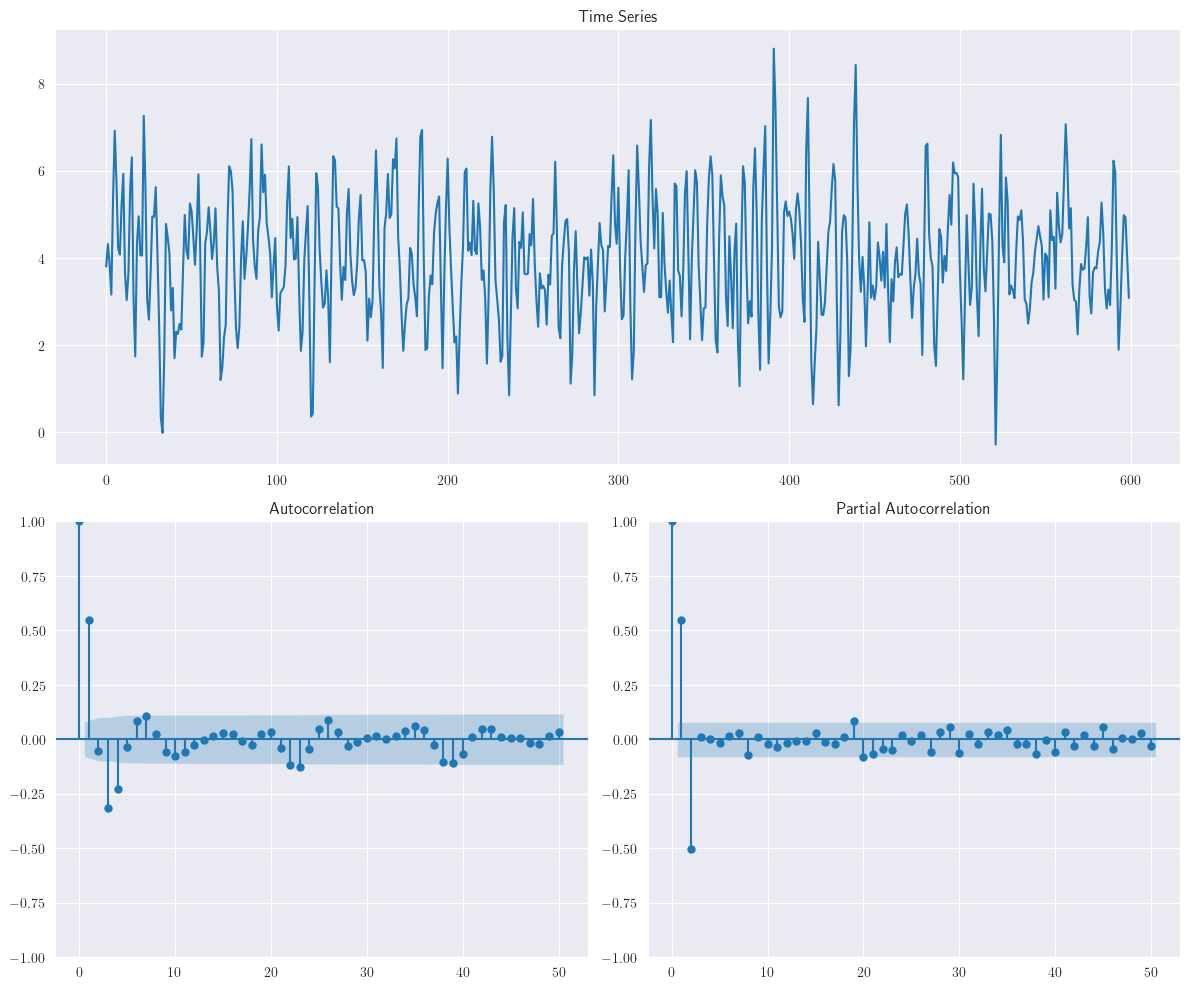

In [10]:
np.random.seed(12345)
n=600
arparams = np.array([0.8, -0.5])   # phi1, phi2,...
maparams = np.array([0]) # theta1, theta2,...
intercept = 4

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

## Procesos Mixtos Autorregresivos-Media Movil

````{admonition} Introducción

- Los modelos ***ARMA (Autoregressive Moving Average)*** combinan dos componentes principales: el modelo ***autorregresivo (AR)***, que captura la ***relación lineal entre una observación y un número lineal de observaciones pasadas***, y el modelo de ***media móvil (MA)***, que modela la ***relación lineal entre una observación y los errores de predicción pasados***.

- Los modelos $ARMA$ son ampliamente utilizados en el modelamiento y ***predicción de datos temporales*** en una variedad de campos, incluyendo ***la economía, las finanzas, la meteorología y la ingeniería***, debido a su ***capacidad para capturar tanto la dependencia temporal como la variabilidad aleatoria***.
````

````{admonition} Proceso $ARMA(p, q)$
:class: tip

- En general, un ***modelo*** $ARMA(p, q)$ se define como:

    $$
    \begin{align*}
    y_{t} &= \delta+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t}-\theta_{1}\varepsilon_{t-1}-\theta_{2}\varepsilon_{t-2}-\cdots-\theta_{q}\varepsilon_{t-q}\\
    &= \delta + \sum_{i=1}^{p}\phi_{i}y_{t-i}+\varepsilon_{t}-\sum_{i=1}^{q}\theta_{i}\varepsilon_{t-i}
    \end{align*}
    $$(arma_process_orderpq)

    o

    $$
    \Phi(B)y_{t}=\delta+\Theta(B)\varepsilon_{t}
    $$(arma_process_orderpq_phitheta)

    donde $\varepsilon_{t}$ es un ***proceso ruido blanco***.
````

## Estacionariedad del proceso $ARMA(p, q)$

- La ***estacionariedad de un proceso*** $ARMA$ está ***relacionada con el componente*** $AR$ en el modelo y ***puede verificarse a través de las raíces del polinomio asociado***

  $$
  m^{p}-\phi_{1}m^{p-1}-\phi_{2}m^{p-2}-\cdots-\phi_{p}=0
  $$(characteristic_eq_armapq_process)

- Si todas las ***raíces de la Ecuación*** {eq}`characteristic_eq_armapq_process` ***son menores que uno en valor absoluto, entonces el*** $ARMA(p, q)$ ***es estacionario***. Esto también implica que, bajo esta condición, el $ARMA(p, q)$ tiene una ***representación MA infinita*** como

  $$
  y_{t}=\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{t-i}=\mu+\Psi(B)\varepsilon_{t},
  $$(armapq_ma_infinite_representation)

  con $\Psi(B)=\Phi(B)^{-1}\Phi(B)$. Los ***coeficientes en*** $\Psi(B)$ pueden ser calculados usando

  $$
  \psi_{i}-\phi_{1}\psi_{i-1}-\phi_{2}\psi_{i-2}-\cdots-\phi_{p}\psi_{i-p}=
  \begin{cases}
  -\theta_{i}, & i=1,2,\dots,q\\
  0, & i>q
  \end{cases}
  $$

  y $\psi_{0}=1$.

## Invertibilidad del proceso $ARMA(p, q)$

- La ***invertibilidad de un proceso*** $ARMA(p, q)$ está relacionada con el ***componente*** $AR$ del modelo y ***puede verificarse a través de las raíces del polinomio asociado***

  $$
  m^{q}-\theta_{1}m^{q-1}-\theta_{2}m^{q-2}-\cdots-\theta_{q}=0
  $$

- Si todas las ***raíces de la Ecuación*** {eq}`armapq_ma_infinite_representation` son ***menores que uno en valor absoluto***, entonces se dice que el $ARMA(p, q)$ ***es invertible y tiene una representación*** $AR$ ***infinita***

  $$
  \Pi(B)y_{t}= \alpha +\varepsilon_{t}
  $$

  donde $\alpha=\Theta(B)^{-1}\delta$ y $\Pi(B)=\Theta(B)^{-1}\Phi(B)$. Los coeficientes en $\Pi(B)$ pueden ser calculados a partir de

  $$
  \pi_{i}-\theta_{1}\pi_{i-1}-\theta_{2}\pi_{i-2}-\cdots-\theta_{q}\pi_{i-q}=
  \begin{cases}
  \phi_{i}, & i=1,2,\dots,p\\
  0, & i>p
  \end{cases}
  $$

  y $\pi_{0}=-1$.

- La siguiente figura muestra la ***ejercitación del proceso*** $ARMA(1, 1)$

  $$
  y_{t}=16+0.6y_{t-1}+\varepsilon_{t}+0.8\varepsilon_{t-1}
  $$

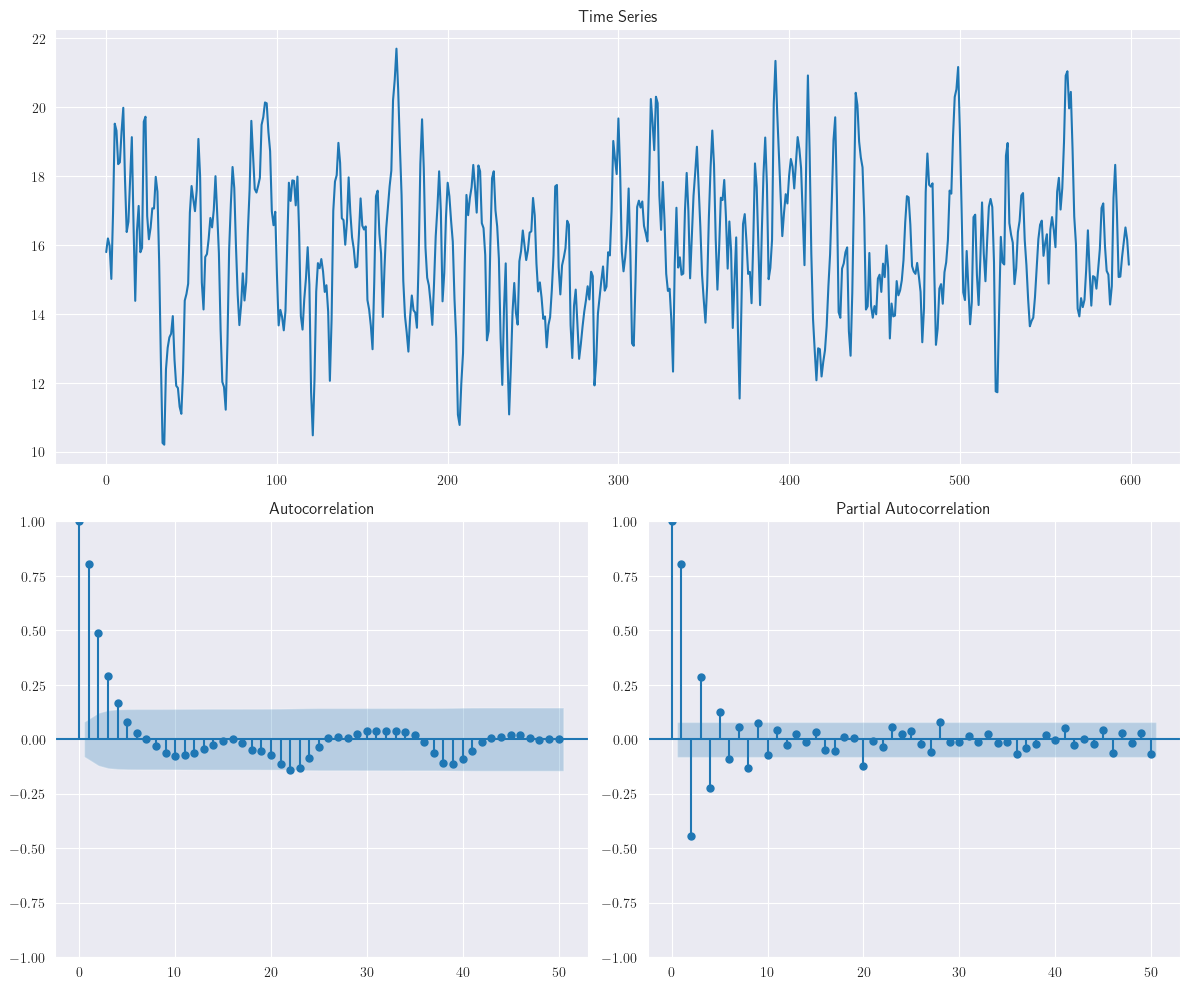

In [11]:
np.random.seed(12345)
n=600
arparams = np.array([0.6])   # phi1, phi2,...
maparams = np.array([0.8]) # theta1, theta2,...
intercept = 16

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Nótese que las ***funciones de autocorrelación y autocorrelación parcial*** de la muestra exhiben un ***comportamiento de decaimiento exponencial (a veces en valor absoluto*** dependiendo de los signos de los coeficientes $AR$ y $MA$), como se muestra en el proceso $ARMA(1, 1)$

$$
y_{t}=16-0.7y_{t-1}+\varepsilon_{t}-0.6\varepsilon_{t-1}
$$

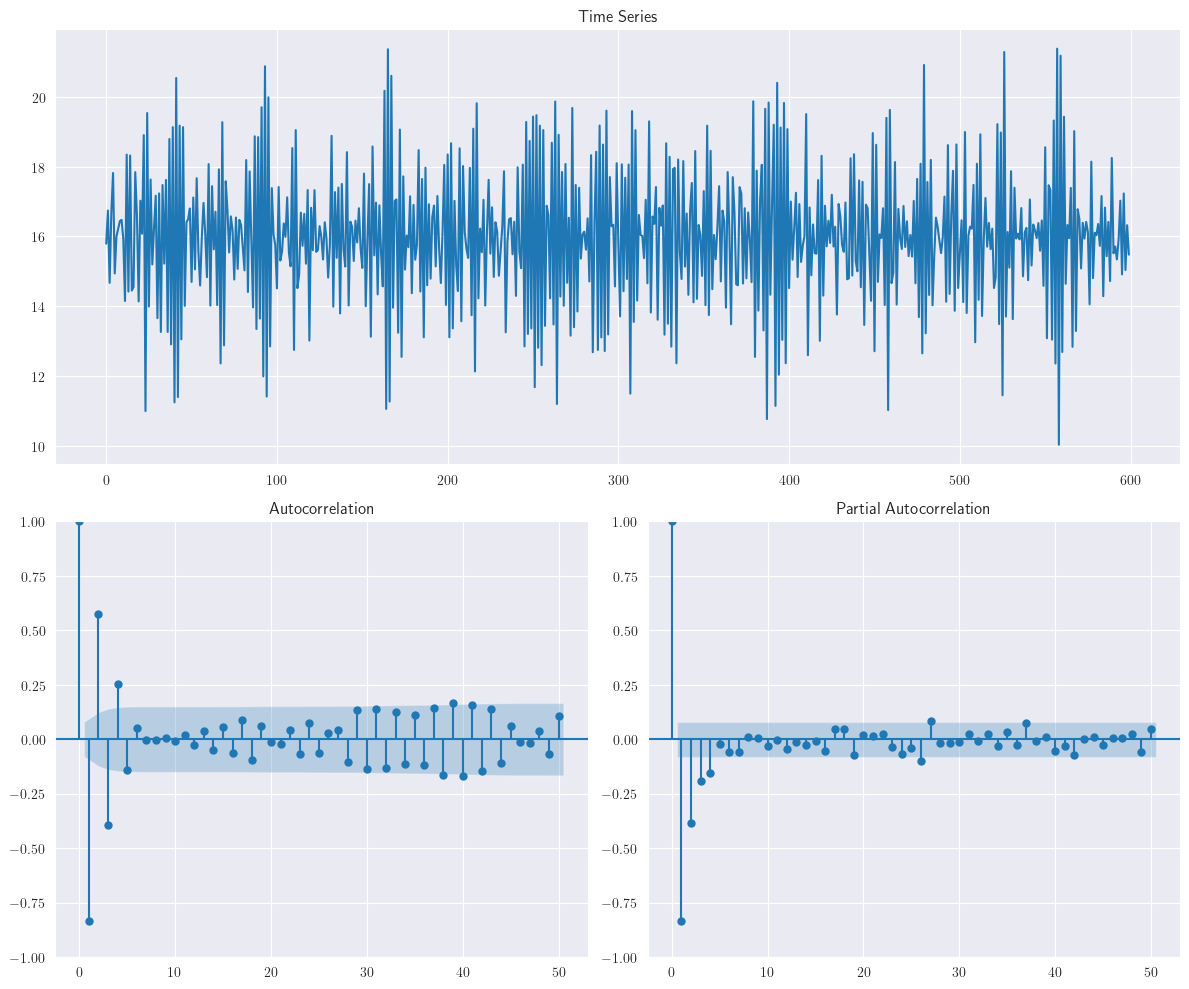

In [12]:
np.random.seed(12345)
n=600
arparams = np.array([-0.7])   # phi1, phi2,...
maparams = np.array([-0.6]) # theta1, theta2,...
intercept = 16

ar = np.r_[1, -arparams] # add zero-lag and negative
ma = np.r_[1, maparams]  # add zero-lag

ar1_data = intercept + smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

## Funciones de autocorrelación ($ACF$) y autocorrelación parcial ($PACF$) del proceso $ARMA(p, q)$

- Las ***funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) de un proceso ARMA son determinadas por las componentes AR y MA***, respectivamente. Por lo tanto, tanto la ACF como la PACF de un $ARMA(p, q)$ ***exhiben patrones de decaimiento exponencial y/o sinusoidales amortiguados***, lo que *dificulta relativamente la identificación del orden del modelo* $ARMA(p, q)$.

- Para ello, se pueden utilizar funciones de muestra adicionales como la ***ACF de muestra extendida (ESACF), la PACF de muestra generalizada (GPACF), la ACF inversa (IACF) y correlaciones canónicas*** {cite}`box2015time,william2006time,tiao1981modeling,tsay1984consistent,ledolter1984some`.

- Sin embargo, la ***disponibilidad de librerías en `Python`*** permite al profesional considerar varios modelos con diferentes órdenes y compararlos según los ***criterios de selección de modelos como AIC, AICC y BIC***. Los valores teóricos de la ***ACF y la PACF para series de tiempo estacionarias se resumen en la siguiente tabla***.

````{table} Comportamiento de las ACF, PACF teóricas para procesos estacionarios
:name: table_acf_pacf_arima_process

|Modelo          | ACF           | PACF   |
| ---------------|:-------------:| :------------:|
| $MA(q)$        | La $ACF$ se corta después del rezago $q$ | Decaimiento exponencial y/o sinusoides amortiguadas |
| $AR(p)$        | Decaimiento exponencial y/o sinusoides amortiguadas      |  La $PACF$ se corta después del rezago $p$ |
| $ARMA(p, q)$   | Decaimiento exponencial y/o sinusoides amortiguadas     |    Decaimiento exponencial y/o sinusoides amortiguadas |

## Procesos No Estacionarios

````{admonition} Introducción
:class: tip

- A menudo sucede que, aunque los procesos pueden no tener un nivel constante, exhiben un comportamiento homogéneo a lo largo del tiempo. Llamaremos a una serie de tiempo, $y_{t}$, ***no estacionaria homogénea si no es estacionaria, pero su primera diferencia***, es decir, $w_{t} = y_{t} - y_{t-1} = (1 - B)y_{t}$, o ***diferencias de orden superior***, $w_{t} = (1 - B)^{d}y_{t}$, ***produce una serie de tiempo estacionaria***. 

- Además, llamaremos a $y_{t}$ un ***proceso autoregresivo integrado de media móvil (ARIMA) de órdenes*** $p, d$ y $q$, es decir, $ARIMA(p, d, q)$, si su $d$***-ésima diferencia, denotada por*** $w_{t}= (1 - B)^{d}y_{t}$, ***produce un proceso*** $ARMA(p, q)$ ***estacionario***. 

- El ***término "integrado" se utiliza ya que, para*** $d = 1$, por ejemplo, ***podemos escribir*** $y_{t}$ ***como la suma (o "integral") del proceso*** $w_{t}$ como

$$
\begin{align*}
y_{t} &= w_{t}+y_{t-1}\\
&= w_{t}+w_{t-1}+y_{t-2}\\
&= w_{t}+w_{t-1}+\cdots+w_{1}+y_{0}
\end{align*}
$$

````

- Por lo tanto, un proceso $ARIMA(p, d, q)$ puede ser escrito como

  $$
  \Phi(B)(1-B)^{d}y_{t}=\delta+\Phi(B)\varepsilon_{t}
  $$(arimapdq_model_phitheta_representation)

````{admonition} Observación

- Por lo tanto, ***una vez que se realiza la diferenciación y se obtiene una serie temporal estacionaria*** $w_{t}=(1−B)^{d}y_{t}$, se pueden ***usar los métodos proporcionados en las secciones anteriores para obtener el modelo completo***. 

- En la mayoría de las aplicaciones, ***la primera diferenciación*** ($d = 1$) y ***ocasionalmente la segunda diferenciación*** ($d = 2$) ***serían suficientes para lograr la estacionariedad***. Sin embargo, a veces las *transformaciones que no sean la diferenciación son útiles para reducir una serie temporal no estacionaria a una estacionaria*. 

- Por ejemplo, en muchas ***series temporales económicas***, la ***variabilidad de las observaciones aumenta a medida que aumenta el nivel promedio del proceso***; sin embargo, el porcentaje de cambios en las observaciones es relativamente independiente del nivel. Por lo tanto, tomar el ***logaritmo de la serie original será útil para lograr la estacionariedad***.
````

## Construcción de Modelos de Series Temporales

````{admonition} Introducción 
:class: tip

- Se utiliza un ***procedimiento iterativo de tres pasos para construir un modelo ARIMA***. Primero, se ***identifica un modelo tentativo de la clase ARIMA*** mediante el análisis de datos históricos. Segundo, ***se estiman los parámetros desconocidos del modelo***. Tercero, ***a través del análisis de residuos, se realizan controles diagnósticos para determinar la adecuación del modelo o indicar posibles mejoras***. Discutiremos cada uno de estos pasos con más detalle.
````

## Identificación de modelos

- ***Antes de comenzar con esfuerzos rigurosos de construcción de modelos estadísticos***, se recomienda el uso de ***gráficos descriptivos, como los gráficos de series temporales simples y los gráficos de dispersión de los datos de series temporales*** $y_{t}$ vs $y_{t−1}, y_{t−2},\dots,$.

- Si se ***sospecha de no estacionariedad***, también se debe considerar el ***gráfico de la primera (o ***$d$***-ésima) diferencia***. La prueba de ***raíz unitaria*** {cite}`dickey1979distribution` también se puede realizar para asegurarse de que se necesite realmente la diferenciación.

- ***Una vez que se puede asumir la estacionariedad*** de la serie temporal, se deben ***obtener la ACF y PACF muestral de la serie temporal original*** (o su $d$-ésima diferencia si es necesario). Dependiendo de la naturaleza de la autocorrelación, ***las primeras 20–25 autocorrelaciones y autocorrelaciones parciales muestrales deberían ser suficientes***.

- La Tabla {ref}`table_acf_pacf_arima_process` junto con ***los límtes*** $\pm2/\sqrt{N}$ pueden ser usados como una guía para ***identificar modelos*** $AR$ y $MA$. La identificación va a requerir mayor cuidado dado que, $ACF$ y $PACF$ van a presentar ***decaimiento exponencial y comportamiento sinusoidal amortiguado***. 

## Estimación de parámetros

- Existen varios métodos, como el ***método de momentos, método de máxima verosimilitud y mínimos cuadrados*** que pueden ser utilizados para ***estimar los parámetros en el posible modelo identificado***. Sin embargo, a diferencia de los problemas de regresión, ***muchos modelos ARIMA son no lineales*** y van a requerir del uso de ***procedimientos no lineales para el ajuste de modelos***. Debe escoger el modelo mas adecuado ofrecido por la librería utilizada.

## Diagnostico Checking

- Despues que un posible modelo ha sido ajustado a los datos, debemos ***examinar si es adecuado, y si es necesario, sugerir mejoras potenciales***. Esto puede ser realizado a traves del ***análisis de residuales***.

- Los residuales para un ***proceso*** $ARMA(p, q)$ puden ser ***obtenidos a partir de***

  $$
  \hat{\varepsilon}_{t}=y_{t}-\left(\hat{\delta}+\sum_{i=1}^{p}\hat{\phi}_{i}y_{t-i}-\sum_{i=1}^{q}\hat{\theta_{i}}\hat{\varepsilon}_{t-i}\right)
  $$(residual_whitenoise_armapq)

- Si el ***modelo especificado es adecuado***, y por lo tanto los ordenes aproximados $p$ y $q$ son identificados, este ***debería transformar las observaciones a un proceso ruido blanco***. Esto es, el comportamiento de los residuales en la Ecuación {eq}`residual_whitenoise_armapq` debería ser ruido blanco.

- Denotemos la ***función de autocorrelación muestral*** de los residuales por $\{r_{e}(k)\}$. Si el modelo es apropiado, la función de autocorrelación muestral de los residuos no debería tener una estructura a identificar. Esto es, ***la autocorrelación no debería diferir significativamente de cero para todos los lags mayores que uno***. Si conocemos los verdaderos valores de los parámetros y la forma del modelo es correcta, los ***errores estándar de los residuos de autocorrelación*** serían $N^{-1/2}$.

````{admonition} Indicador chi-cuadrado

- Además de considerar los ***términos individuales*** $r_{e}(k)$, podemos obtener vía ***test chi-cuadrado un indicador de si los primeros*** $K$ ***autocorrelaciones residuales*** unidas, ***indican que el modelo es adecuado***. El tes estadístico es

    $$
    Q=(N-d)\sum_{k=1}^{K}r_{e}^{2}(k)
    $$

    la cual es ***distribuida aproximadamente como chi-cuadrado*** con $K-p-q$ grados de libertad ***si el modelo es apropiado***. Si el modelo es inadecuado, $Q$ excede un punto, en la pequeña cola superior aproximada, de la distribución chi-cuadrado con $K-p-q$ grados de libertad.  
````

## Pronóstico con proceso ARIMA

````{admonition} Introducción

- Una vez una ***serie de tiempo apropiada ha sido ajustada***, esta púede ser usada para generar ***pronósticos de futuras observaciones***. Si denotamos el tiempo actual por $T$, ***la predicción*** $y_{T+\tau}$ es llamada, ***pronóstico*** $\tau$***-period-ahead*** y lo denotamos por $\hat{y}_{T+\tau}(T)$.

- El criterio estándar a utilizar para obtener la mejor predicción es el ***error cuadrático medio***, para el que el ***valor esperado de los errores predichos al cuadrado***

    $$
    \text{E}[(y_{T+\tau}-\hat{y}_{T+\tau}(T))^{2}]=\text{E}[e_{T}(\tau)^{2}]
    $$
    
    ***es minimizado***.

- Puede demostrarse que ***el mejor ponóstico en el sentido cuadrático medio es la esperanza condicional de*** $y_{T+\tau}$ dada la actual y previas observaciones, esto es, $y_{T}, y_{T-1}, y_{T-2},\dots$

  $$
  \hat{y}_{T+\tau}(T)=\text{E}[y_{T+\tau} | y_{T}, y_{T-1},\dots]
  $$
````

- Considere por ejemplo un ***proceso*** $ARIMA(p, d, q)$ en el tiempo $T+\tau$ (i.e ***periodo*** $\tau$ ***en el futuro***)

  $$
  y_{T+\tau}=\delta+\sum_{i=1}^{p+d}\phi_{i}y_{T+\tau-i}+\varepsilon_{T+\tau}-\sum_{i=1}^{q}\theta_{i}\varepsilon_{T+\tau-i}.
  $$

- Además, considere su ***representación infinita*** $MA$

  $$
  y_{T+\tau}=\mu+\sum_{i=0}^{\infty}\psi_{i}\varepsilon_{T+\tau-i}
  $$(ma_infinite_representation_arimapdq)

- Podemos ***particionar la Ecuación*** {eq}`ma_infinite_representation_arimapdq` como

  $$
  y_{T+\tau}=\mu+\sum_{i=0}^{\tau-1}\psi_{i}\varepsilon_{T+\tau-i}+\sum_{i=\tau}^{\infty}\psi_{i}\varepsilon_{T+\tau-i}
  $$

- En esta partición se puede ver claramente que la componente $\sum_{i=0}^{\tau-1}\psi_{i}\varepsilon_{T+\tau-i}$ ***involucra los errores futuros***, mientras que la componente $\sum_{i=\tau}^{\infty}\psi_{i}\varepsilon_{T+\tau-i}$ ***involucra el error presente y los pasados***.

- Dada la ***relación entre la actual y pasadas observaciones, y el supuesto de que los random shocks tienen media cero y son independientes***, el mejor pronostico en el sentido cuadratico medio es

  $$
  \begin{align*}
  \hat{y}_{T+\tau}(T) &= \text{E}[y_{T+\tau} | y_{T}, y_{T-1},\dots]\\[3mm]
  &= \text{E}\left[\mu+\sum_{i=0}^{\tau-1}\psi_{i}\varepsilon_{T+\tau-i}+\sum_{i=\tau}^{\infty}\psi_{i}\varepsilon_{T+\tau-i}\right]\\
  &= \mu+\sum_{i=0}^{\tau-1}\psi_{i}\text{E}[\varepsilon_{T+\tau-i} | y_{T}, y_{T-1},\dots]+\sum_{i=\tau}^{\infty}\psi_{i}\text{E}[\varepsilon_{T+\tau-i} | y_{T}, y_{T-1},\dots]\\[1mm]
  &= \mu+\sum_{i=\tau}^{\infty}\psi_{i}\varepsilon_{T+\tau-i},~\text{E}[\varepsilon_{T+\tau-i} | y_{T}, y_{T-1},\dots]=
  \begin{cases}
  0 & \text{si}~i<\tau\\
  \varepsilon_{T+\tau-i} & \text{si}~i\geq\tau.
  \end{cases}
  \end{align*}
  $$

- Seguidamente, el ***error del pronóstico*** es calculado a partir de

  $$
  e_{T}(\tau)=y_{T+\tau}-\hat{y}_{T+\tau}(T)=\sum_{i=0}^{\tau-1}\psi_{i}\varepsilon_{T+\tau-i}
  $$(forecasting_error_attau_arimapdq)

- Dado que el ***error de pronóstico*** en la Ecuación {eq}`forecasting_error_attau_arimapdq` es una ***combinación lineal de random shocks***, tenemos que

  $$
  \begin{align*}
  \text{E}[e_{T}(\tau)] &= 0\\
  \text{Var}[e_{T}(\tau)] &= \text{Var}\left[\sum_{i=0}^{\tau-1}\psi_{i}\varepsilon_{T+\tau-i}\right]\\
  &= \sum_{i=0}^{\tau-1}\psi_{i}^{2}\text{Var}(\varepsilon_{T+\tau-i})\\
  &= \sigma^{2}\sum_{i=0}^{\tau-1}\psi_{i}^{2}\\[2mm]
  &= \sigma^{2}(\tau),~\tau=1,2,\dots
  \end{align*}
  $$

## Implementación

- Estudiemos implicaciones de los modelos de componentes $AR$. El conjunto de datos `AR(1)` puede ser generado utilizando la función `arma_generate_sample` del módulo `statsmodels.tsa`

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.tsa.arima.model as arima_model
import warnings
warnings.filterwarnings("ignore")

In [14]:
n = 600

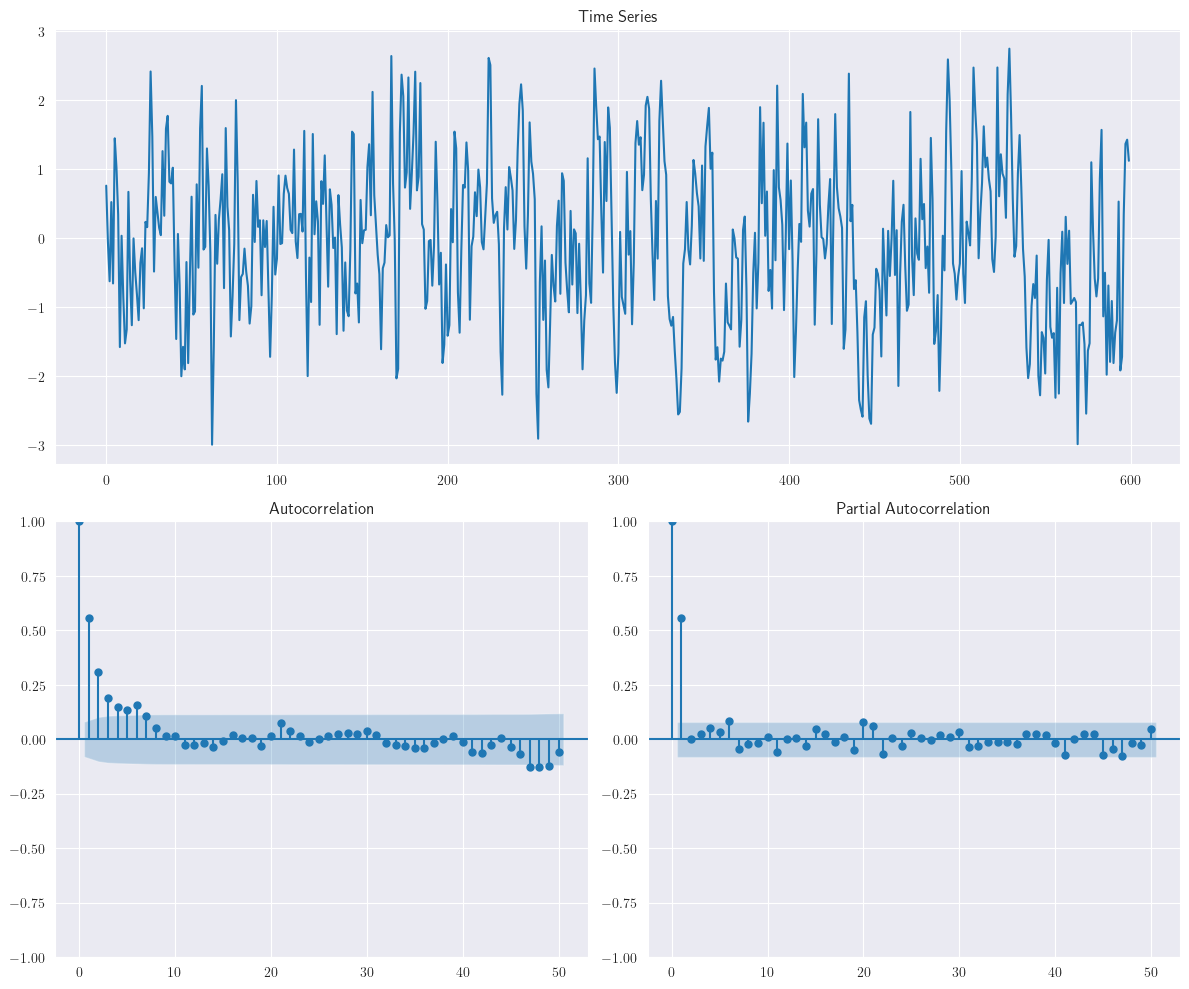

In [15]:
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- El script anterior genera un conjunto de datos para el escenario $AR(1)$ con ***correlación serial definida para el retardo anterior como 0.6***. ***El componente*** $MA$ ***se fija en cero para eliminar cualquier efecto de media móvil de la señal de la serie temporal***.

- Considere el siguiente modelo $y_{t}=\phi_{1}y_{t-1}+\varepsilon_{t}$. ***Los datos son simulados usando componentes autoregresivas menores que 1***, por lo tanto, ***la autocorrelación decrecerá sobre el tiempo siguiendo la relación entre*** $\phi$ y $t$

$$
y_{t}=\phi y_{t-1}+\varepsilon_{t}=\phi (\phi y_{t-2} + \varepsilon_{t-1})+\varepsilon_{t}=\phi^{2}y_{t-2}+\phi\varepsilon_{t-1}+\varepsilon_{t}=\cdots
$$

- Por lo tanto, el ***gráfico ACF decrece exponencialmente y la PACF remueve el efecto de rezago mientras calcula correlación, solo términos significativos son capturados***. El valor de $\phi$ ***afecta la estacionariedad de la señal***. Por ejemplo, si aumentamos el valor de $\phi$ de 0.6 a 0.95 en $AR(1)$, el modelo tiende a la no estacionariedad, como se muestra en el siguiente ejemplo:

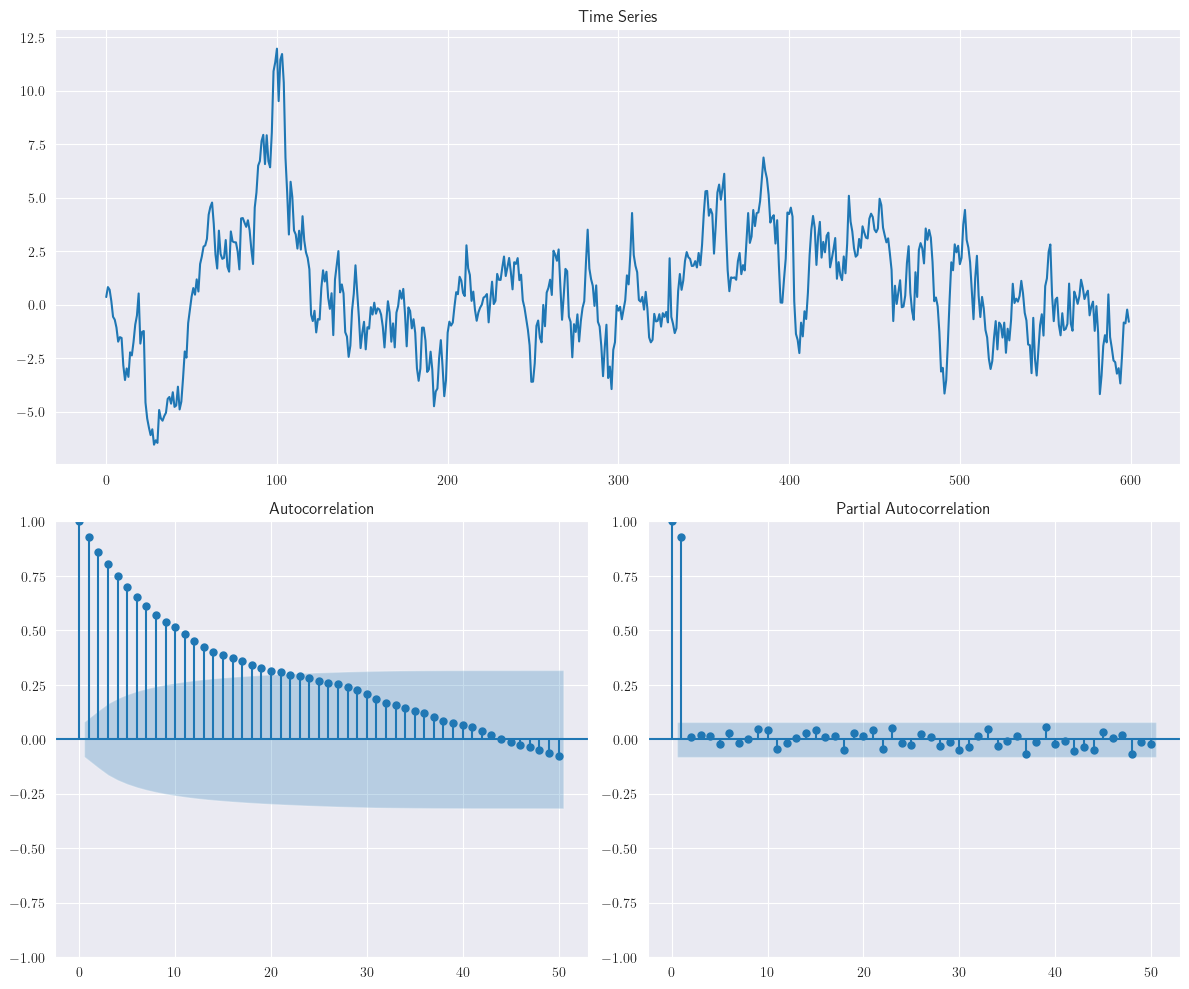

In [16]:
ar = np.r_[1, -0.95]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- En el escenario en que $\phi>1$, ***el modelo se convierte en no estacionario***. Un ejemplo de proceso no estacionario con $\phi>1$ lo podemos ver a continuación, considerando $\phi=1.01$

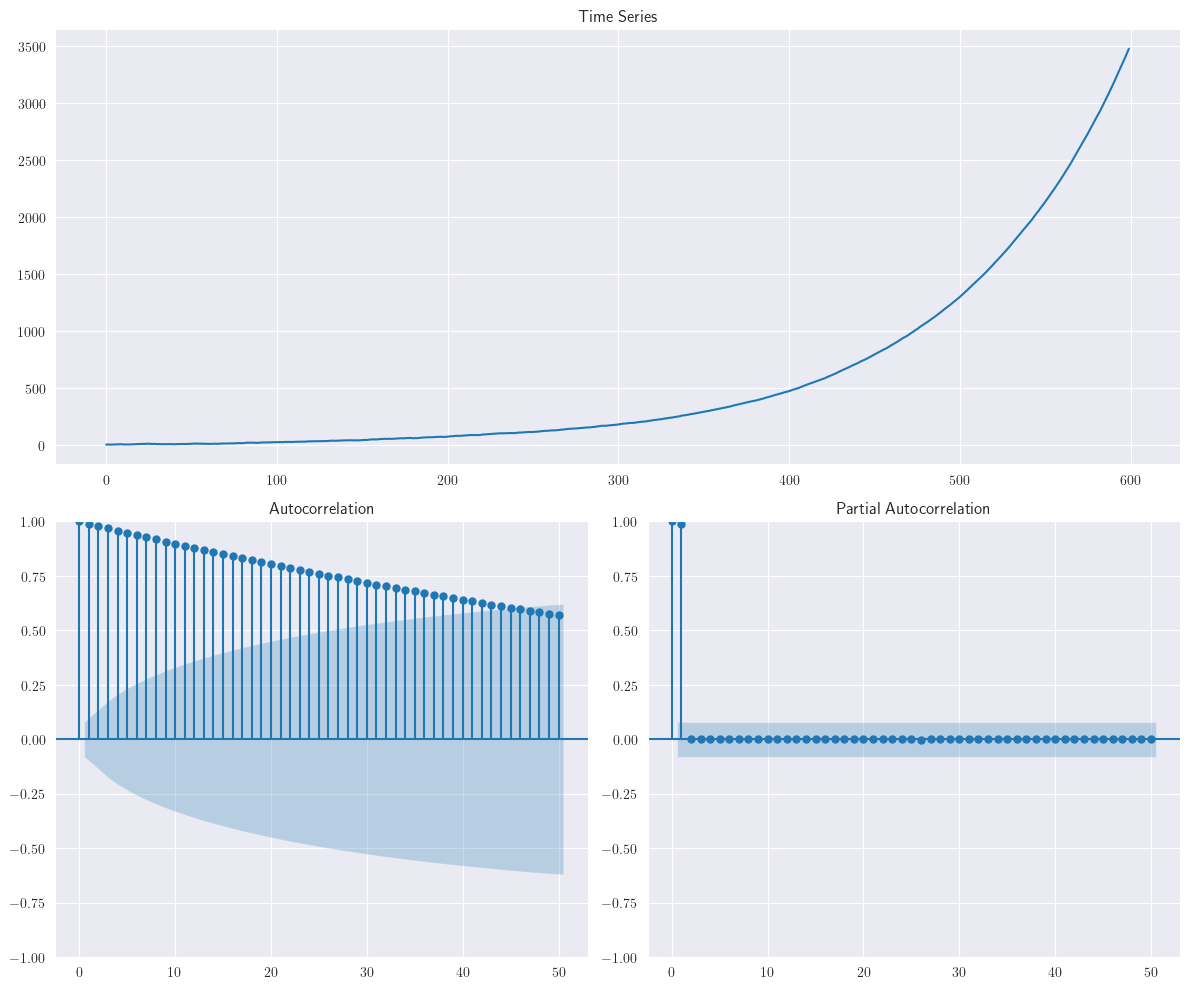

In [17]:
ar = np.r_[1, -1.01]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Similarmente, ***modelos autorregresivos de alto orden***, pueden ser generados para validar efecto sobre los componentes de la ***PACF*** con el orden. Los conjuntos de datos con componentes $AR(2)$ y $AR(3)$ son generados utilizando el siguiente script

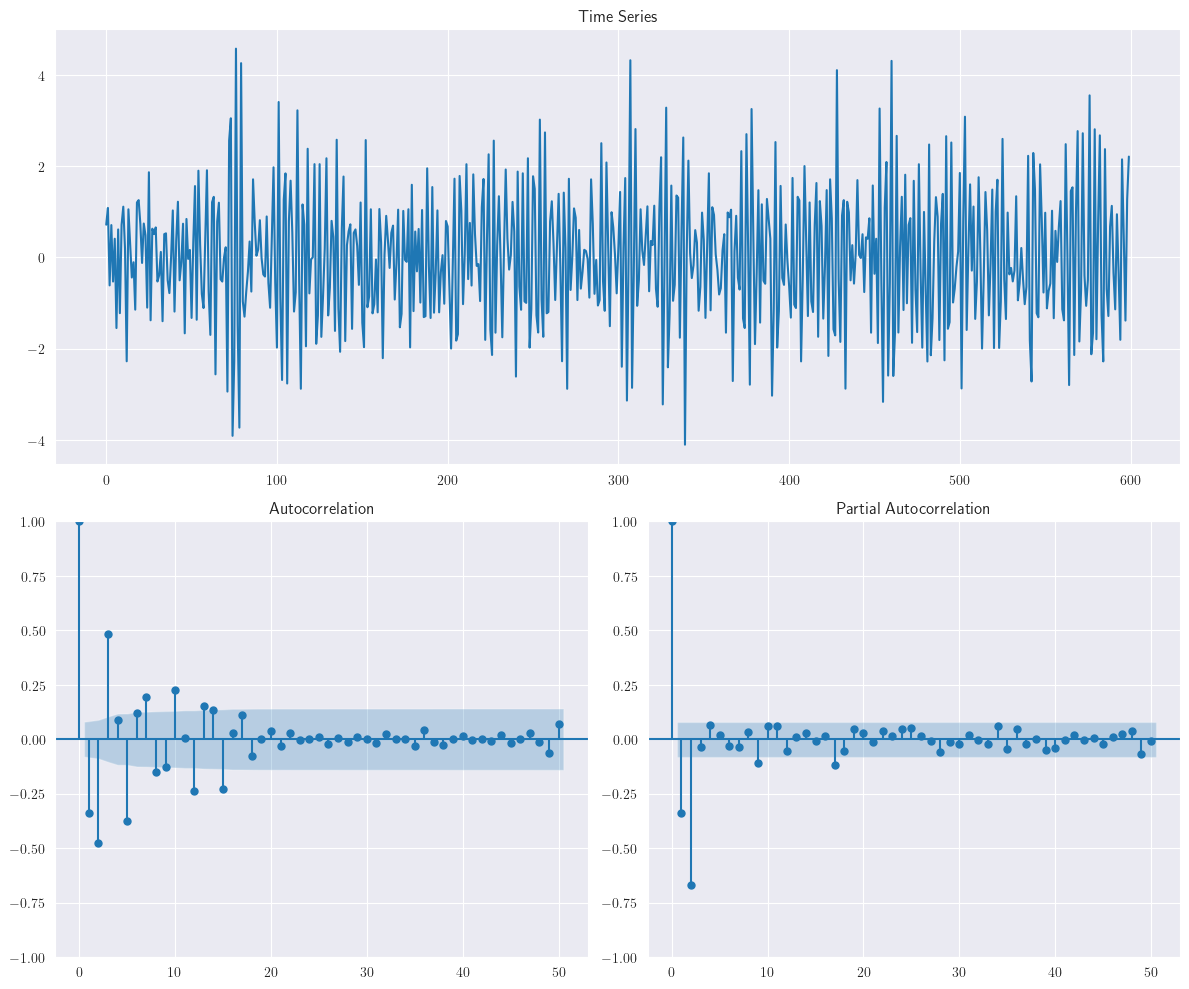

In [18]:
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

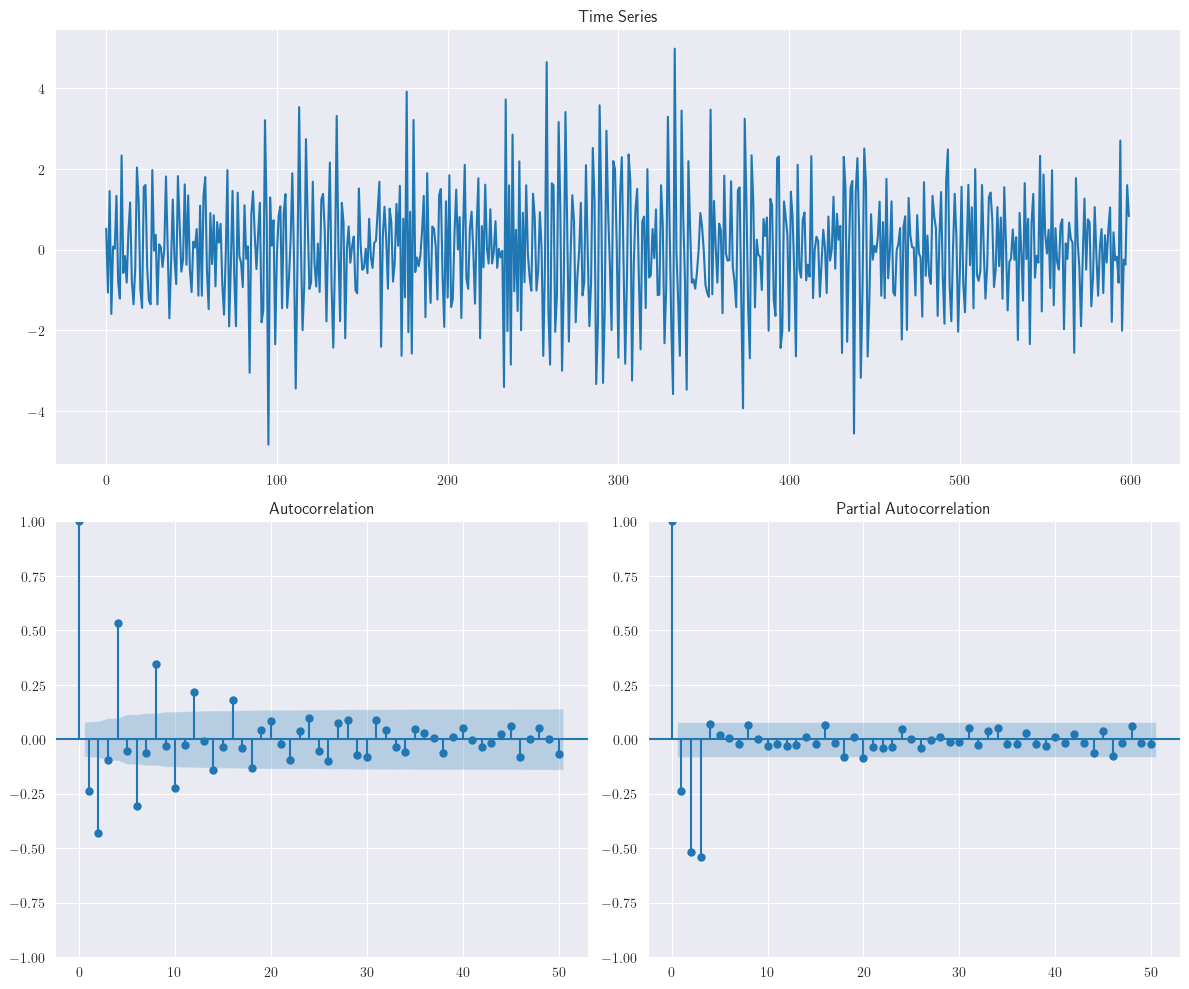

In [19]:
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

- Como se puede ver, a partir de diferentes fuentes de datos, la ***PACF está capturando la componente autorregresiva*** y $q$ es el valor donde esta es significativa. 

- El modelo para $AR(3)$ puede ser evaluado usando la clase `ARIMA.fit` del módulo de `Python`, `statsmodels.tsa.api` (ver [statsmodels.tsa.arima.model.ARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html)).

- Si ajustamos un modelo $AR(3)$ sobre los datos generados con $AR$, las ***correlaciones de 0.6, 0.7 y 0.5*** se pueden visualizar (*aproximadas vía MLE*) en el siguiente `summary()`. Nótese que son parecidos a la relación real obtenida en el ejemplo anterior usando `smtsa.arma_generate_sample`

In [20]:
ar3 = arima_model.ARIMA(ar3_data.tolist(), order=(3, 0, 0)).fit()
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -847.763
Date:                Thu, 16 May 2024   AIC                           1705.527
Time:                        17:24:10   BIC                           1727.512
Sample:                             0   HQIC                          1714.085
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.014      0.198      0.843      -0.025       0.030
ar.L1         -0.6479      0.034    -18.891      0.000      -0.715      -0.581
ar.L2         -0.7168      0.030    -23.592      0.000      -0.776      -0.657
ar.L3         -0.5454      0.034    -16.194      0.000      -0.611      -0.479
sigma2         0.9852      0.057     17.270      0.000       0.873       1.097
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 1.04
Prob(Q):                              0.40   Prob(JB):                         0.59
Heteroskedasticity (H):               0.94   Skew:                            -0.10
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

````{admonition} summary() Output
:class: tip

- En el presente resumen, `Covariance Type:	opg` corresponde a la estimación por producto exterior de gradientes ***Outer-Product-of-Gradients (OPG)*** para la matriz de covarianza asociada a las estimaciones de coeficientes del modelo. 

- El `AIC, BIC, HQIC` utilizan la estimación de máxima verosimilitud (***Log Likelihood***) de un modelo como medida de ajuste. Los valores de `AIC, BIC, HQIC` son bajos para los modelos con ***Log Likelihood*** altos. Esto significa que el modelo se ajusta mejor a los datos, que es lo que queremos. Por ejemplo, `AIC` se define de la siguiente forma: $AIC=2k-2\ln(L)$, donde $k$ es el ***número de parámetros*** en el modelo estadístico, y $L$ es el ***máximo valor de la función de verosimilitud*** para el modelo estimado. 

- Al ajustar modelos, es posible ***aumentar la verosimilitud añadiendo parámetros***, pero ***hacerlo puede dar lugar a un sobreajuste***. Tanto el ***BIC como el AIC*** intentan resolver este problema ***introduciendo un término de penalización por el número de parámetros del modelo***; el término de penalización es mayor en el `BIC` que en el `AIC` para tamaños de muestra superiores a 7. 

- `BIC` está definido como $BIC=k\ln(n)-2\ln(L)$, donde aquí $n$ representa el tamaño de la muestra. El criterio de información de ***Hannan–Quinn (HQIC)*** está dado por $HQIC=2k\ln(\ln(n))-2\ln(L)$. Este criterio reduce la penalización de `BIC`, de tal forma que en términos de penalización se ubica entre `AIC` y `BIC`. La selección del criterio va a depender del objetivo principal del investigador.

- Los ***coeficientes del modelo autorregresivo*** son `ar.L1, ar.L2, ar.L3`. El valor de `const` es equivalente al intercepto en modelos de regresión lineal y `sigma2` es la ***varianza estimada del residuo en el modelo***. La columna `P>|z|` corresponde al $p$-value. `std err` es el error estándar asociado a cada coeficiente, para los cuales el ***intervalo de confianza*** aparece en la última columna `[0.025, 0.075]`. 

- Para determinar si la asociación entre la respuesta y cada término del modelo es ***estadísticamente significativa***, comparamos el $p$-value del término con su ***nivel de significancia*** para evaluar la ***hipótesis nula***. ***`La hipótesis nula es que el término no es significativamente diferente de 0`***, lo que indica que ***no existe asociación entre el término y la respuesta***. ***Nótese que los coeficientes: `ar.L1, ar.L2, ar.L3`, son estadísticamente significativos.*** Cuando un coeficiente no es estadísticamente significativo, es posible que desee volver a ajustar el modelo sin el término asociado.

- El siguiente paso es ***determinar si el modelo cumple el supuesto del análisis***. Utilizamos el ***estadístico chi-cuadrado de Ljung-Box (Ljung-Box (L1) (Q))***, el $p$-value asociado `Prob(Q)` y la ***función de autocorrelación de los residuos*** para determinar si el modelo cumple el supuesto de que ***los residuos son independientes***. Si no se cumple el supuesto, ***es posible que el modelo no se ajuste correctamente a los datos*** y debe tener cuidado al interpretar los resultados. En este caso la ***`hipótesis nula es que los residuos son independientes o que no hay correlación en los residuales`***. Nótese que el $p$-value es mayor o igual que 0.05, y está representado por `Prob(Q)`. 

- Por otro lado, ***Jarque-Bera (JB)*** es un ***test de normalidad***, en este caso para los residuales. La ***hipótesis nula a contrastar es que los `residuales están normalmente distribuidos`***. Nótese también que en este caso el $p$-value (`Prob(JB)`) es mayor al nivel de significancia. El sesgo y la curtosis `Skew, Kurtosis` muestran un sesgo negativo en los residuales y una distribución `leptocúrtica` con mayor concentración de los datos en torno a la media.

- El valor `Heteroskedasticity (H)` es el estadístico asociado con el test de heterocedasticidad de los residuos estandarizados con $p$-value `Prob(H) (two-sided)`. La ***`hipótesis nula es, los residuos no presentan heteroscedasticidad`***. Nótese que el $p$-value es mayor o igual que 0.05, y está representado por `Prob(H) (two-sided)`. 
````

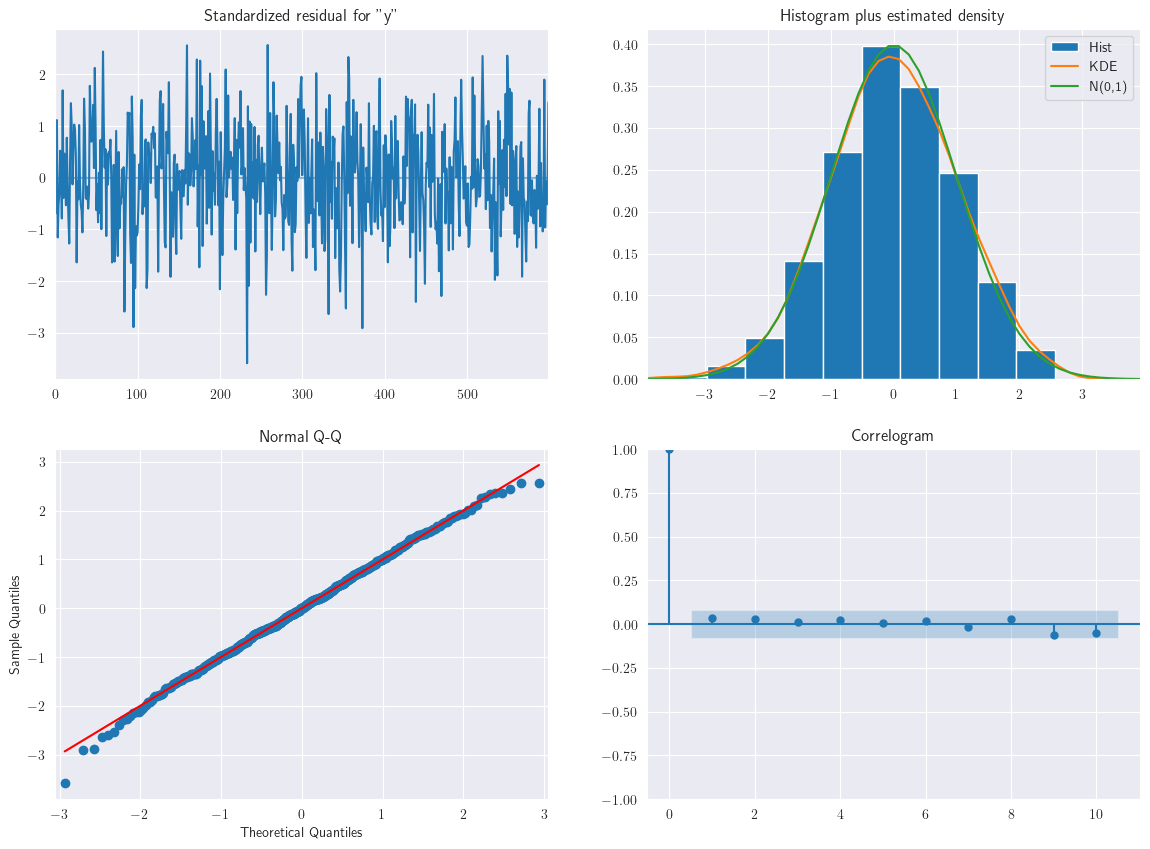

In [21]:
ar3.plot_diagnostics(figsize=(14,10));

- Nótese que en la ***ACF no hay correlaciones significativas***, puede concluir que ***los residuos son independientes***. Esto es, ninguna de las correlaciones de la función de autocorrelación de los residuos es significativa. ***Se puede concluir que el modelo cumple el supuesto de que los residuos son independientes***.

- Tanto $AR$ como $MA$ pueden utilizarse para corregir la dependencia serial, pero normalmente la ***autocorrelación positiva se corrige utilizando modelos*** $AR$ y la ***dependencia negativa se corrige utilizando*** modelos $MA$.

## Modelos de media móvil

````{admonition} Observación (Cross Validated)
:class: tip

- ***¿Por qué molestarse en tomar alguna parte de un ruido blanco anterior*** $\theta_{1}\varepsilon_{t-1}$ ***para la estimación del siguiente paso temporal, sabiendo que los términos de ruido blanco no están relacionados a lo largo del tiempo?***

***Ejemplo***: *Si un huracán azota Houston, va a haber un impacto en las ventas de, digamos, Target. Desde un alto nivel, esto es un gran valor negativo de $\varepsilon_{t}$ para esa semana. La semana siguiente, habrá otra innovación semanal, $\varepsilon_{t+1}$ pero es posible que el efecto del huracán no haya desaparecido del todo en el límite de la semana, por lo que habrá algún efecto de arrastre sobre las ventas, dado por la innovación de la semana anterior*.

- ***¿Por qué la varianza de los términos de innovación se mantiene constante dado que se esperaría que en realidad varíara con el tiempo?***

***Ejemplo***: *Incluso si varía, mientras no varíe por mucho, probablemente sea mejor simplemente modelarlo como una constante en lugar de tratar de estimarlo como un término variable. Por ejemplo, la demanda minorista de plátanos es bastante estable a lo largo del año, excepto en Navidad, cuando es más baja, pero fluctúa de forma errática semana a semana, a nivel de tienda. No podemos predecir exactamente cuál será la demanda la próxima semana, así que modelamos esa imprecisión como ruido blanco.*

````

- Para ilustrar un ***modelo de serie temporal de media móvil***, generemos una señal utilizando el siguiente código

In [22]:
import statsmodels.tsa.api as smtsa

- Número de muestras

In [23]:
n = 600

- Generamos un conjunto de datos para $MA(1)$

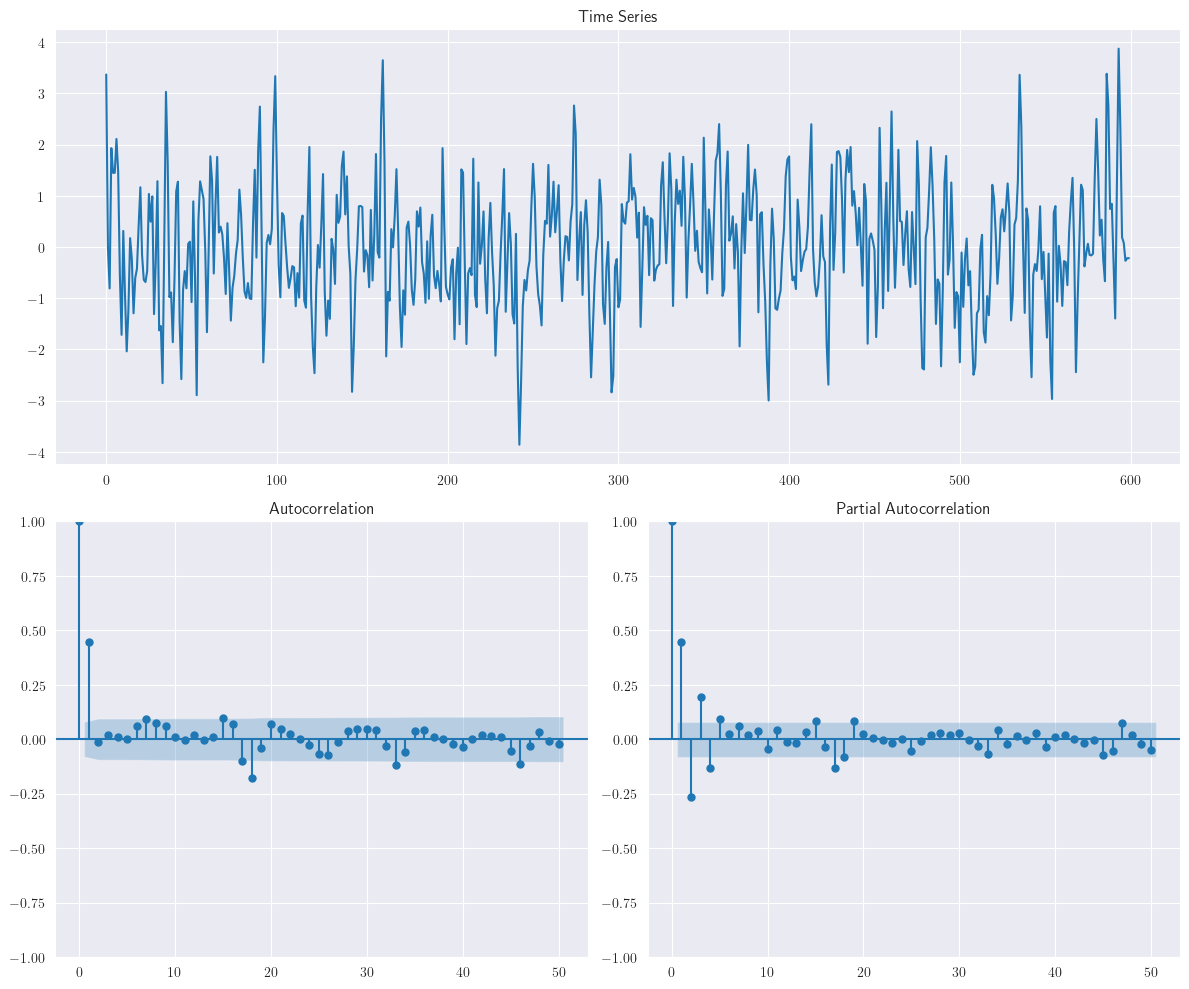

In [24]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma1_data)

- En el script anterior, $n$ representa el número de muestras que se generarán con $AR$ que define el componente autorregresivo y $MA$ ***que explica el componente de media móvil de la señal de la serie temporal***. Por ahora, mantendremos el impacto de $AR$ en la señal de la serie temporal como cero. Este script generará un conjunto de datos de series temporales con ***una dependencia*** $MA(1)$ y ***0.7 de correlación serial con el error*** y puede ser representado como como sigue:

$$
y_{t}=0.7\varepsilon_{t-1}+\varepsilon_{t}
$$

- Para evaluar si la señal de la serie temporal consta de un componente $MA$ o $AR$, se utiliza la ***autocorrelación (ACF)*** y la ***autocorrelación parcial (PACF)*** respectivamente.

- El `ACF` del conjunto de datos anterior muestra una ***dependencia de 1 rezago***. Como la relación $MA$ es capturada usando $y_{t} = \theta\varepsilon_{t-1} + \varepsilon_{t}$, que es ***independiente de los términos de rezago***, el ***ACF tiende a capturar el orden*** $q$ apropiado de la serie $MA$.

- Como puede observarse en la siguiente siguiente figura, la ***ACF no llega a cero después del orden definido, sino que se reduce a un valor pequeño***. El intervalo de confianza se comprueba utilizando la relación $\pm 2/\sqrt{N}$, donde $1/\sqrt{N}$ ***representan una aproximación de la desviación estándar***, que se cumple bajo la condición de independencia.

- Veamos el impacto del componente $MA$ de `ACF` y `PACF` con un orden mayor de $q$ utilizando el siguiente script, el cual generará ***series de tiempo de medias moviles de ordenes*** $MA(2)$ y $MA(3)$ sin impacto del componente autorregresivo. Además se generan, las funciones `ACF` y `PACF`, como en los anteriores ejemplos

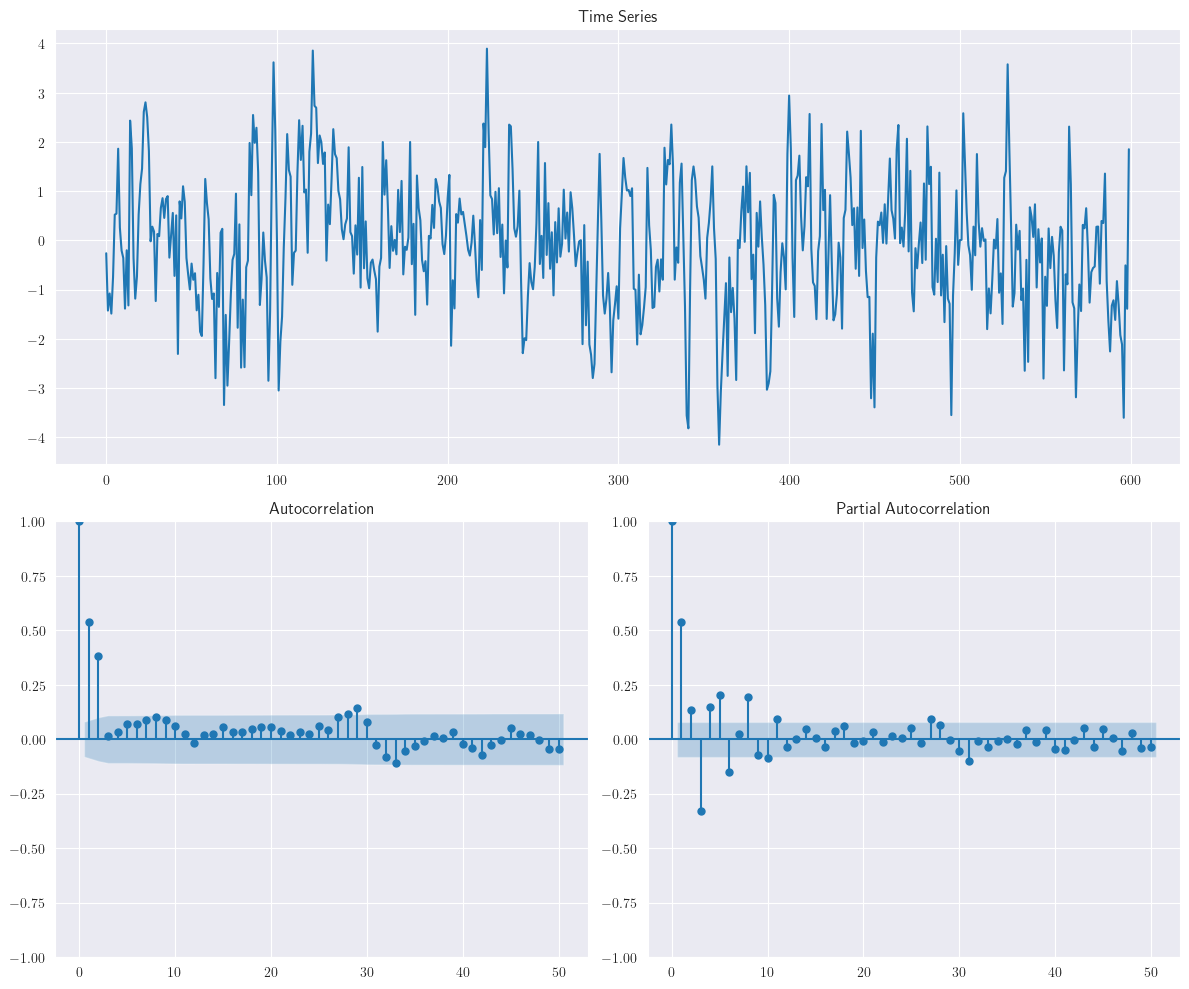

In [25]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma2_data)

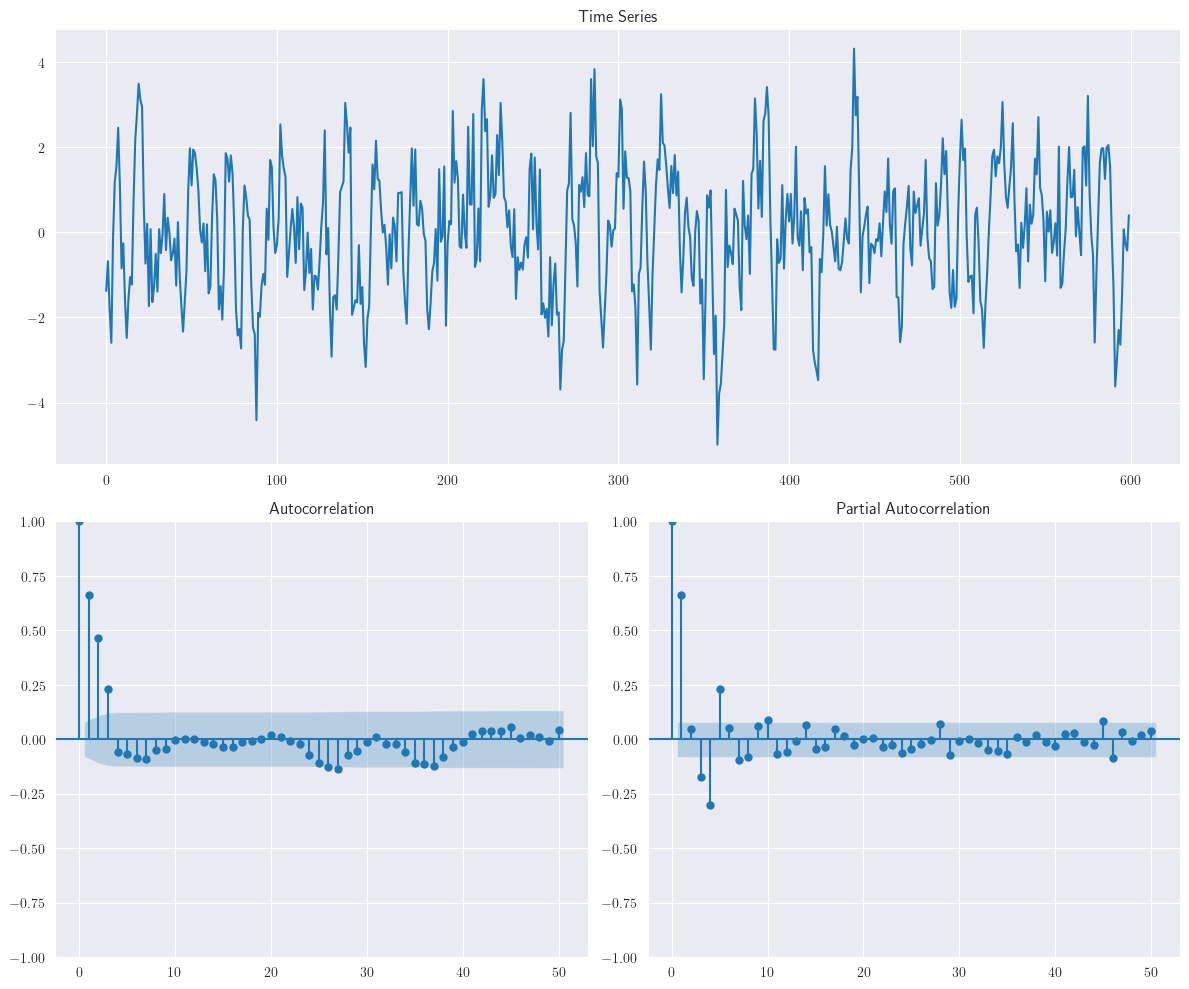

In [26]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma3_data)

- ***Normalmente, la ACF define bien la correlación serial del error y, por tanto, se utiliza para detectar*** $MA(q)$; sin embargo, a medida que aumenta el orden y entran en escena otros componentes de la serie temporal, como la estacionalidad, tendencia o estacionariedad, la interpretación se complica. El $MA(q)$ ***supone que el proceso es estacionario y que el error es un ruido blanco para garantizar una estimación insesgada***.

- Se puede construir un modelo $MA(q)$ utilizando la función `ARIMA` del módulo `statsmodel.tsa`. Nótese que ***usamos siempre cero en la segunda componente de la función ARIMA***, en la siguiente sección explicaremos el por qué de esto, al introducir el concepto de ***diferenciación***. Un script de ejemplo para ajustar un modelo $MA(1)$ es el siguiente

In [27]:
ma1 = smtsa.ARIMA(ma1_data.tolist(), order=(0, 0, 1)).fit()

- Como el orden de $AR$ se mantiene en cero, `smtsa.ARIMA` construye un $MA(1)$. El resumen del modelo devuelto por `smtsa.ARMA` se muestra aquí

In [28]:
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -842.209
Date:                Thu, 16 May 2024   AIC                           1690.418
Time:                        17:24:12   BIC                           1703.609
Sample:                             0   HQIC                          1695.553
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.067      0.170      0.865      -0.121       0.143
ma.L1          0.6789      0.031     22.252      0.000       0.619       0.739
sigma2         0.9689      0.055     17.504      0.000       0.860       1.077
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.67   Prob(JB):                         0.82
Heteroskedasticity (H):               0.92   Skew:                             0.06
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- ***Queda como ejercicio para el estudiante interpretar cada summary() basado en el análisis realizado para los modelos AR***. Como puede verse, el modelo ha captado una ***correlación entre los residuos, que es bastante cercano al valor simulado de 0.7***. Del mismo modo, ejecutamos el modelo para el conjunto de datos $MA(3)$ y el resultado se muestra a continuación

In [29]:
ma3 = smtsa.ARIMA(ma3_data.tolist(), order=(0, 0, 3)).fit()

In [30]:
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -852.803
Date:                Thu, 16 May 2024   AIC                           1715.606
Time:                        17:24:12   BIC                           1737.591
Sample:                             0   HQIC                          1724.165
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0530      0.119      0.445      0.656      -0.180       0.286
ma.L1          0.6478      0.038     16.834      0.000       0.572       0.723
ma.L2          0.6936      0.034     20.646      0.000       0.628       0.759
ma.L3          0.5455      0.038     14.367      0.000       0.471       0.620
sigma2         1.0020      0.058     17.254      0.000       0.888       1.116
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.93   Prob(JB):                         0.77
Heteroskedasticity (H):               0.93   Skew:                            -0.07
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Nótese también que ***el modelo ha captado correlaciones entre los residuos, que están bastante cercanas a los valores simulados 0.6, 0.7 y 0.5***. 

## Creación de conjuntos de datos con ARIMA

- Las dos secciones anteriores describen el modelo autorregresivo $AR(p)$, que realiza una ***regresión sobre sus propios términos rezagados*** y el modelo de media móvil $MA(q)$ construye una ***función en términos de errores pasados***. Los modelos $AR(p)$ tienden a ***captar el efecto de reversión a la media (mean reversion)***, mientras que los modelos $MA(q)$ ***tienden a captar el efecto de choque en el error***, que no son normales o imprevistos. *La reversión a la media es un término financiero para la suposición de que el precio de un activo tenderá a converger al precio promedio a lo largo del tiempo*. Así pues, ***el modelo*** $ARMA$ ***combina la potencia de los componentes*** $AR$ ***y*** $MA$. Un modelo de previsión de series temporales $ARMA(p, q)$ incorpora el modelo $AR$ de orden $p$ y el modelo $MA$ de orden $q$, respectivamente.

- Vamos a generar un conjunto de datos $ARMA(1,1)$ actualizando el script utilizado anteriormente con componentes `AR` y `MA` actualizados. También restringiremos el número de muestras a 600 para simplificar:

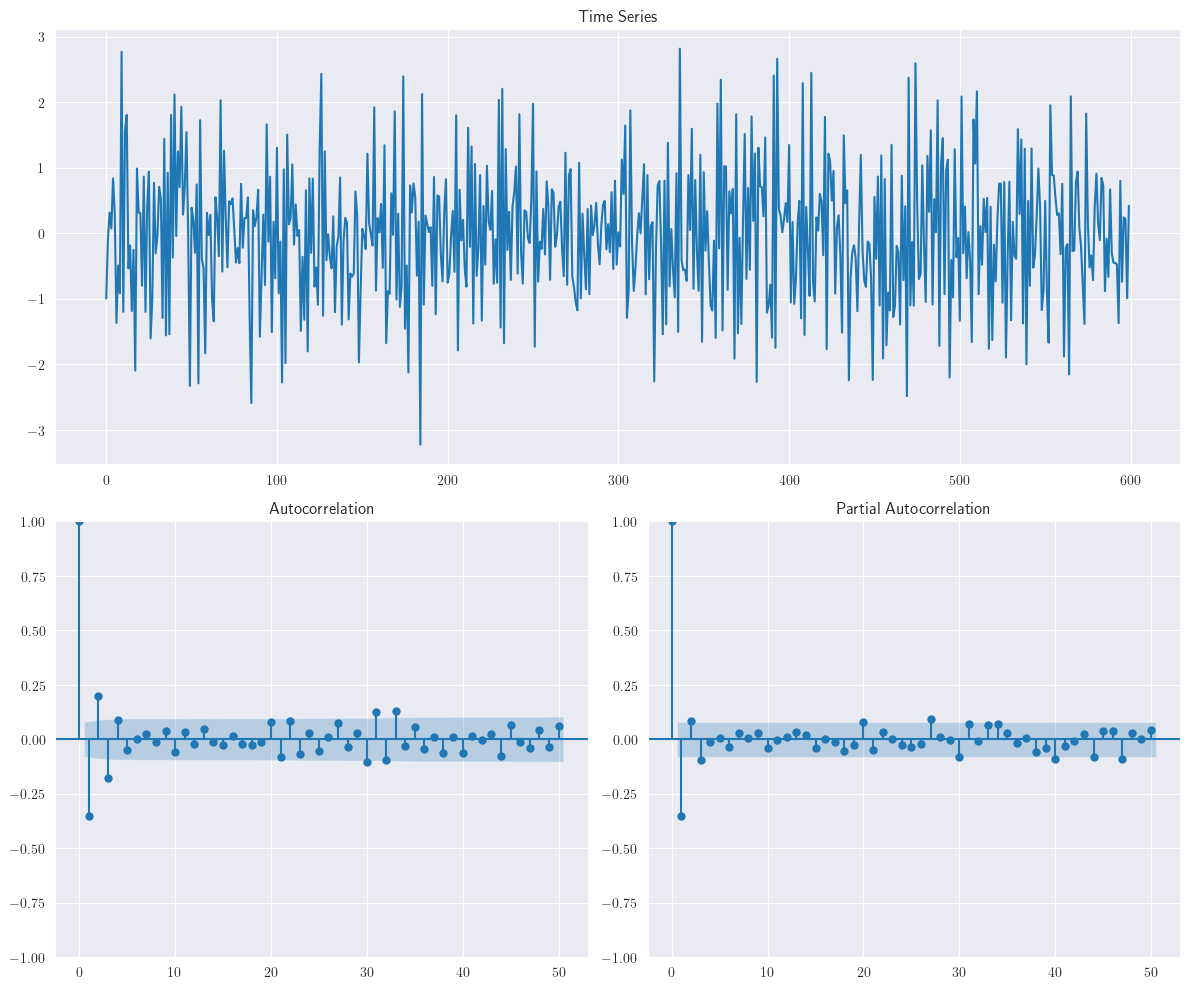

In [31]:
n = 600
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ar1ma1_data)

- Podemos utilizar el test de ***Dickey Fuller***, considerando como hipótesis nula $H_{0}$: ***la serie de tiempo no es estacionaria***. Como es usual, este tipo de tests entrega un $p$-value en el cual basamos la decisión de aceptar o rechazar la hipótesis inicial, con una significancia $\alpha$ de 0.05. Esto puede ser llevado a cabo usando la función `adfuller()` de `stattools`. 

In [32]:
from statsmodels.tsa import stattools

In [33]:
adf_result = stattools.adfuller(ar1ma1_data, autolag='AIC')
print('p-value of the ADF test in air miles flown:', adf_result[1])

p-value of the ADF test in air miles flown: 4.8966479611062833e-29


- La palabra clave argumento `autolag='AIC'` indica a la función que ***el número de rezagos se elija para minimizar el criterio de información correspondiente***.

````{admonition} Observación
:class: tip

- Los ***procesos de ventas*** en general siguen un modelo $ARMA(1,1)$, ya que las ventas en el tiempo $t$ son función de las ventas anteriores que se produjeron en el tiempo $t-1$, que interviene en el componente $AR$. El componente $MA$ de $ARMA(1,1)$ se debe a las ***campañas temporales lanzadas por la empresa***, como la distribución de cupones. 

- La distribución de cupones, por ejemplo, ***provocará un efecto de media móvil en el proceso***. Las ventas aumentan temporalmente y el ***cambio en el efecto de las ventas es captado por el componente de media móvil***. En la figura anterior, tanto `ACF` como `PACF` muestran una curva senoidal con una fuerte correlación en los rezagos iniciales; por lo tanto, los parámetros $p$ como $q$ están presentes.
````

- En los datos de series temporales $ARMA(1,1)$, tanto `ACF` como `PACF` han mostrado un ***patrón de onda senoidal***, $p$ y $q$ afectan a la señal de la serie temporal. El impacto de los retardos puede calcularse mediante la curva impulso-respuesta (ver [statsmodels.tsa.arima_process.arma_impulse_response](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.arma_impulse_response.html)), como se muestra en la siguiente figura, para la señal de serie temporal $ARMA(1,1)$. ***La figura muestra que, tras cinco retardos, el efecto sobre la respuesta es mínimo***

````{admonition} Observación
:class: tip

- La IRF (Impulse Response Function) describe ***cómo una perturbación o "impulso" (cambio inesperado) en una variable del sistema afecta a esa variable y a otras variables del sistema a lo largo del tiempo***. 
````

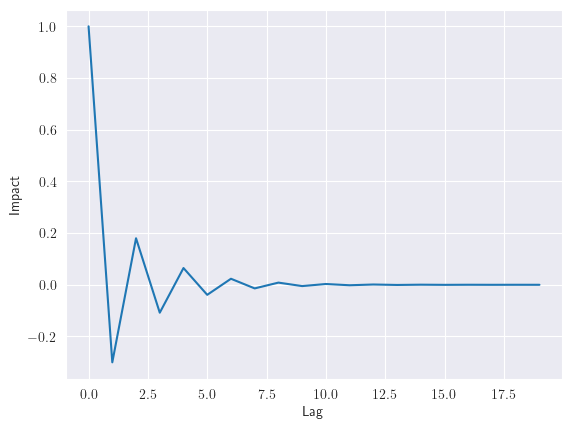

In [34]:
from statsmodels.tsa import arima_process

plt.plot(arima_process.arma_impulse_response(ar, ma, leads=20))
plt.ylabel("Impact");
plt.xlabel("Lag");

- Para evaluar los valores `AR` y `MA` de los datos, se utiliza la función `ARIMA.fit()` del módulo `statsmodels.tsa.api`, como se muestra en el siguiente script:

In [35]:
ar1ma1 = smtsa.ARIMA(ar1ma1_data.tolist(), order=(1, 0, 1)).fit()
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -826.795
Date:                Thu, 16 May 2024   AIC                           1661.590
Time:                        17:24:13   BIC                           1679.178
Sample:                             0   HQIC                          1668.436
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0224      0.032     -0.700      0.484      -0.085       0.040
ar.L1         -0.6278      0.084     -7.518      0.000      -0.791      -0.464
ma.L1          0.3226      0.102      3.164      0.002       0.123       0.522
sigma2         0.9211      0.054     17.164      0.000       0.816       1.026
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.87   Prob(JB):                         0.98
Heteroskedasticity (H):               1.02   Skew:                             0.02
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- El resultado del modelo muestra ***valores del coeficientes*** $AR$ y $MA$ ***cercanos de los valores 0.6 y 0.3*** utilizados por el componente $AR$ y $MA$, respectivamente, para generar la señal de la serie temporal. Asimismo, el ***Criterio de información de Akaike (AIC)*** lo usamos como criterio para ***establecer una evaluación para las órdenes*** $p$ y $q$. Una ilustración de la minimización del $AIC$ en el conjunto de datos $ARMA(1,1)$ se muestra a continuación:

In [36]:
aicVal=[]

for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARIMA(ar1ma1_data.tolist(), order=(ari, 0, maj)).fit()
        aicVal.append([ari, maj, arma_obj.aic])

dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'MA(q)', 'AIC'])
dfAIC

AR(p)  MA(q)          AIC
0      1      1  1661.589913
1      1      2  1663.118934
2      2      1  1663.291217
3      2      2  1663.488211

- La tabla anterior muestra que $ARMA(1, 1)$ es el modelo más óptimo con un valor $AIC$ mínimo; por lo tanto, se preferirá $ARMA(1, 1)$ a otros modelos. Ilustremos un modelo $ARMA$ utilizando datos de series en tiempo real. El conjunto de datos seleccionado para la siguiente ilustración, corresponde a los ***precios de las acciones de IBM de 1962 a 1965***. El primer paso consiste en cargar los módulos y el conjunto de datos en el entorno `Python`.

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [38]:
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df=ibm_df.dropna()
ibm_df.head()

Date  Close_Price
0  1962-01-02       572.00
1  1962-01-03       577.00
2  1962-01-04       571.25
3  1962-01-05       560.00
4  1962-01-08       549.50

- El script anterior utiliza `pandas` para cargar el conjunto de datos. Los nombres de las columnas se renombran utilizando la función `rename` soportada por `pandas DataFrame`. El conjunto de datos tiene el siguiente aspecto:

- El gráfico ***IBM muestra una tendencia significativa de los datos a lo largo del tiempo***. El siguiente paso en el proceso es observar los gráficos de `ACF` y `PACF` los cuales pueden obtenerse utilizando la función `plotds` definida anteriormente 

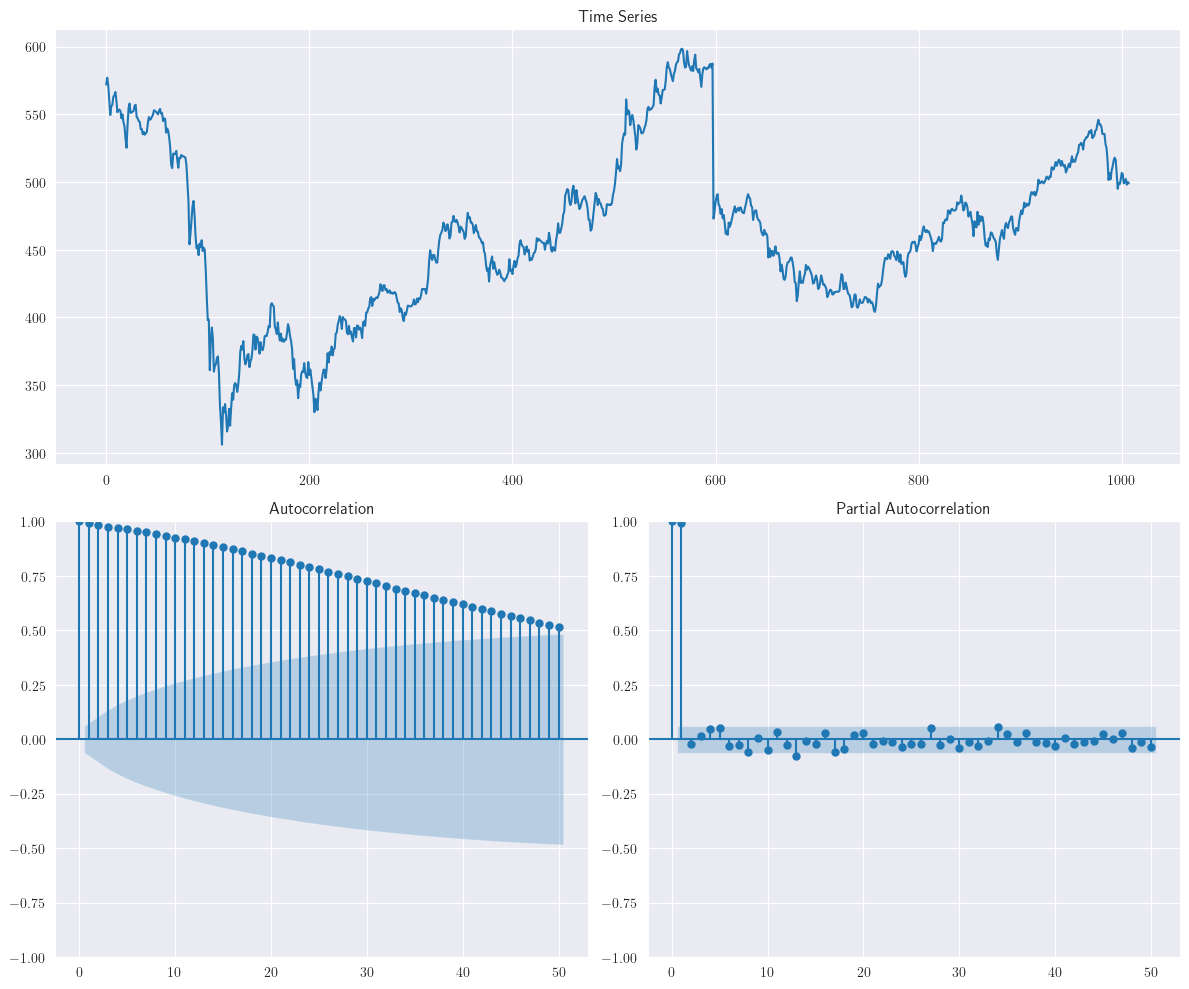

In [39]:
plotds(ibm_df.Close_Price)

- La ***ACF decae linealmente, mostrando una fuerte correlación en serie***; sin embargo, la ***autocorrelación parcial sólo muestra una autocorrelación positiva significativa***, la corrección debe hacerse utilizando el componente $AR$ con correlación de primer orden.

- Para ***obtener los órdenes*** $p$ ***y*** $q$ ***óptimos para*** $ARMA$, se realiza una ***búsqueda en red (GridSearch)*** con la minimización del $AIC$ como criterio de búsqueda utilizando el siguiente script

In [40]:
aicVal=[]

for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARIMA(ibm_df.Close_Price.tolist(), order=(ari, 0, maj)).fit()
        aicVal.append([ari, maj, arma_obj.aic])

In [41]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'MA(q)', 'AIC'])
dfAIC

AR(p)  MA(q)          AIC
0      1      0  6697.784241
1      1      1  6699.670009
2      1      2  6701.984008
3      2      0  6699.671126
4      2      1  6700.722034
5      2      2  6702.721949

- Para obtener la fila con el ***menor valor de AIC usamos***

In [42]:
dfAIC.nsmallest(n=1, columns="AIC")

AR(p)  MA(q)          AIC
0      1      0  6697.784241

- La función `ARIMA.fit` se utiliza para ajustar el modelo de previsión $ARMA$ con $p$ y $q$ definidos ***utilizando el criterio de máxima verosimilitud***. El $AIC$ recomienda el modelo $ARMA(1, 0)$ como ***modelo óptimo con el mínimo valor de*** $AIC$, aunque también puede utilizarse el modelo $ARMA(1, 1)$ dado que el $AIC$ es bastante similar. El modelo $ARMA(1, 0)$ se reajusta como modelo óptimo utilizando el siguiente script

In [43]:
arma_obj_fin = smtsa.ARIMA(ibm_df.Close_Price.tolist(), order=(1, 0, 0)).fit()
ibm_df['ARMA']=arma_obj_fin.predict()

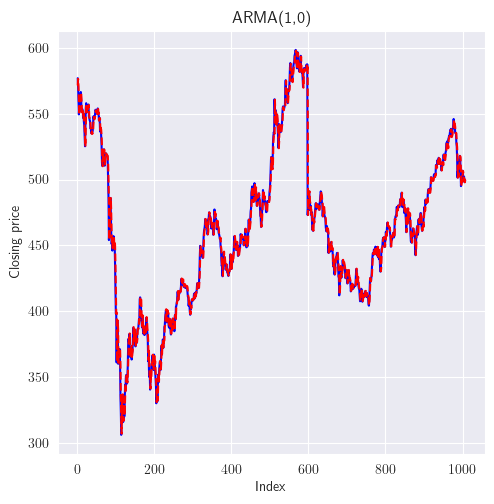

In [44]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price');

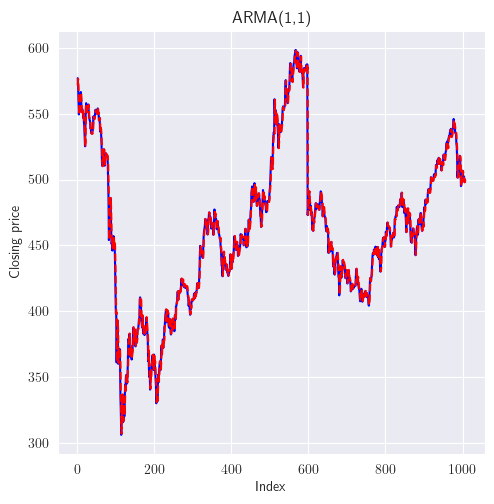

In [45]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,1)')
plt.xlabel('Index')
plt.ylabel('Closing price');

- Una de las principales limitaciones de estos modelos es que ***ignoran el factor de volatilidad, lo que hace que la señal no sea estacionaria***. El modelo $AR$ considera un proceso estacionario, es decir, el término de error es `iid` y sigue una distribución normal $\varepsilon_{t} \sim N(0, \sigma_{\epsilon}^{2})$ y $|\phi|<1$.

- ***La condición*** $|\phi|<1$ ***hace que la serie temporal sea una serie temporal finita ya que el efecto de las observaciones más recientes en la serie temporal sería mayor en comparación con las observaciones anteriores***. Las series que no satisfacen estos supuestos caen en series no estacionarias.

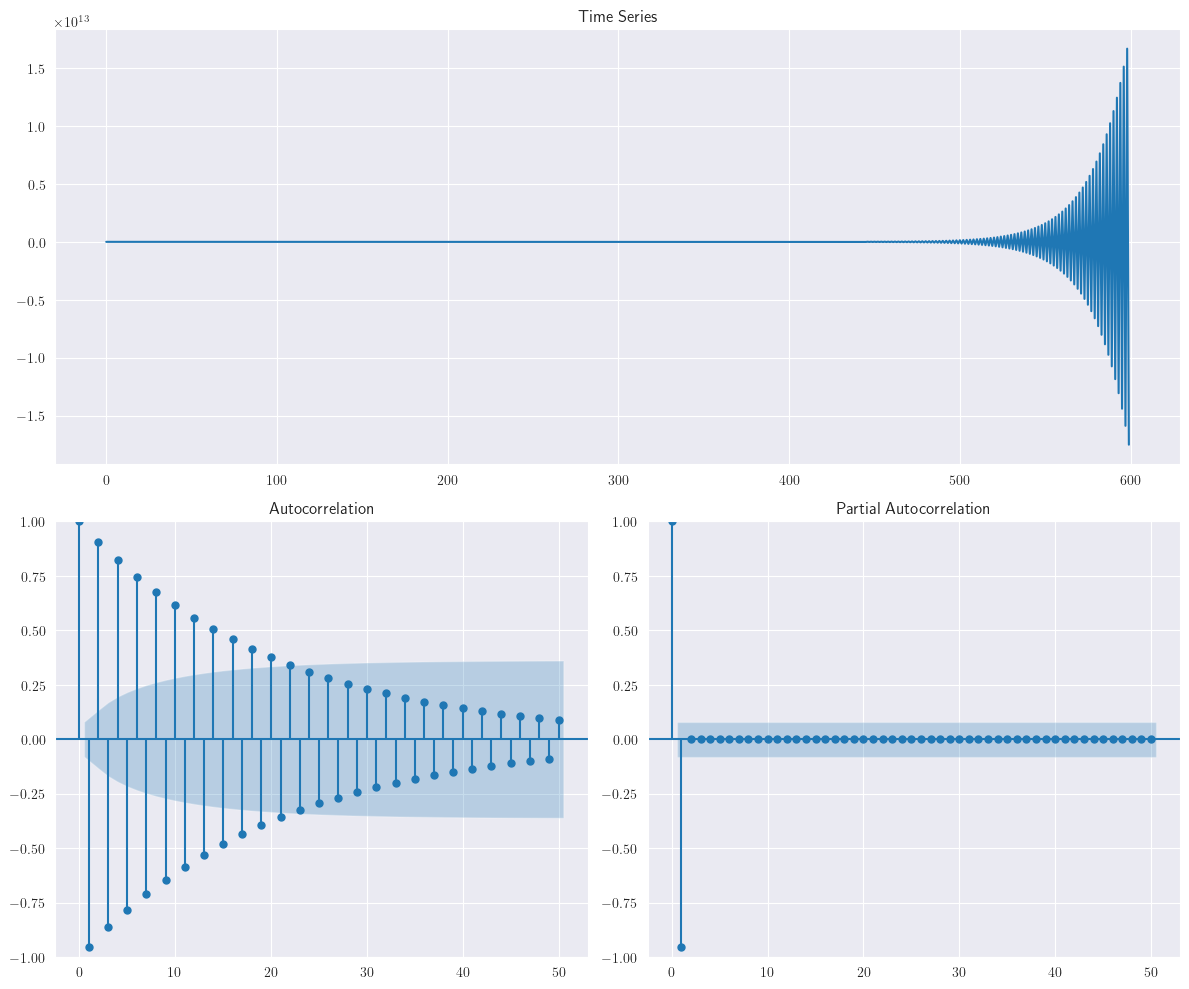

In [46]:
ar = np.r_[1, 1.05]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Del gráfico anterior se desprende que ***la varianza del proceso sigue aumentando al final del conjunto de datos y se observa una fuerte tendencia en la ACF***. El modelo `ARIMA` que se analiza en la sección siguiente tiene en cuenta escenarios no estacionarios para la predicción.

## ARIMA

- $ARIMA$, también conocido como ***modelo Box-Jenkins***, es una generalización del modelo $ARMA$ ***incluyendo componentes integrados***. Los componentes integrados son útiles cuando los datos son ***no estacionarios***, y la parte integrada del $ARIMA$ ayuda a ***reducir la no estacionariedad***. $ARIMA$ ***aplica la diferenciación a las series temporales una o más veces para eliminar el efecto de no estacionariedad***. Los ordenes $p, d, q$ del modelo $ARIMA(p, d, q)$ representan el orden de los componentes $AR$, de ***diferenciación*** y $MA$.

- La principal diferencia entre los modelos $ARMA$ y $ARIMA$ es el componente $d$, que actualiza la serie sobre la que se construye el modelo de predicción. El componente $d$ ***tiene por objeto hacer la serie estacionaria*** y de esta forma el modelo $ARMA$ puede aplicarse al conjunto de datos sin tendencia.

- Ilustremos un modelo $ARIMA$ utilizando el conjunto de datos de series temporales del índice `Dow Jones (DJIA)` de 2016. El conjunto de datos `DJIA` con sus gráficos `ACF` y `PACF` básicos se muestra en la siguiente figura

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [48]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')
djia_df.head()

Date          Open          High           Low         Close  \
0 2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
1 2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2 2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
3 2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
4 2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   

      Adj Close     Volume  
0  17148.939453  148060000  
1  17158.660156  105750000  
2  16906.509766  120250000  
3  16514.099609  176240000  
4  16346.450195  141850000

- Analicemos la columna *Date* y utilicémosla como índice de fila para el *DataFrame* y utilicemosla como columna

In [49]:
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)
djia_df.head()

Open          High           Low         Close  \
Date                                                                 
2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   

               Adj Close     Volume  
Date                                 
2016-01-04  17148.939453  148060000  
2016-01-05  17158.660156  105750000  
2016-01-06  16906.509766  120250000  
2016-01-07  16514.099609  176240000  
2016-01-08  16346.450195  141850000

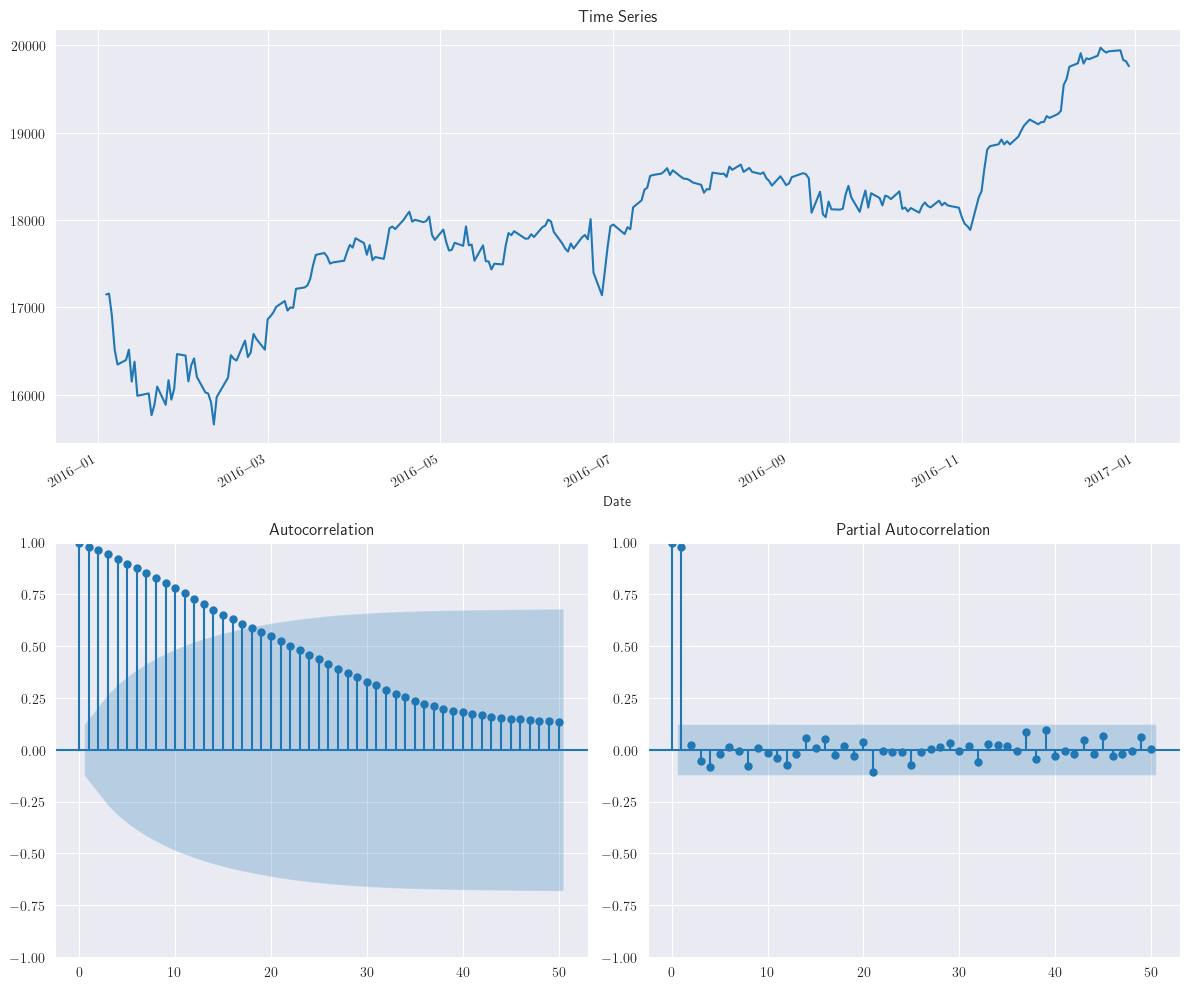

In [50]:
djia_df=djia_df.dropna()
plotds(djia_df['Close'], nlag=50)

- El conjunto de datos muestra claramente una señal no estacionaria con una tendencia creciente. El `ACF` también muestra un decaimiento exponencial, mientras que la `PACF` tiene una fuerte correlación en el retardo 2. ***La no estacionariedad también puede comprobarse evaluando la media y la varianza en distintos periodos de tiempo. La diferencia en la media y la varianza valida la hipótesis de no estacionariedad***. Por ejemplo, dividimos el conjunto de datos del `DJIA` en dos semestres, de enero a junio de 2016 y de julio a diciembre de 2016, y evaluamos la media y la varianza para cada semestre del siguiente modo:

In [51]:
mean1, mean2 =djia_df.iloc[:125].Close.mean(), djia_df.iloc[125:].Close.mean()
var1, var2 = djia_df.iloc[:125].Close.var(), djia_df.iloc[125:].Close.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17226.579164, mean2=18616.603593
variance1=487045.734003, variance2=325183.639530


- ***La media y la varianza evaluadas para ambos semestres muestran una diferencia significativa en los valores de la media y la varianza, lo que sugiere que los datos no son estacionarios***. Otra forma de evaluar la no estacionariedad es utilizar pruebas estadísticas como la prueba de `Dickey-Fuller (ADF)`. El $ADF$ es una prueba de raíz unitaria que ***evalúa la fuerza de la tendencia en una componente de la serie temporal***.

- En otras palabras, ***la hipótesis nula es la presencia de la raíz unitaria o no estacionariedad mientras que la hipótesis alternativa sugiere la estacionariedad de los datos***. Realicemos la prueba `ADF` para el conjunto de datos `DJIA`:

In [52]:
from statsmodels.tsa.stattools import adfuller

In [53]:
adf_result= adfuller(djia_df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.462320
p-value: 0.899162


- Idealmente, ***un valor más negativo del estadístico ADF representará una señal estacionaria***. Para el conjunto de datos, como el valor $p$ ***es bastante alto, no podemos rechazar la hipótesis nula***, lo que la convierte en una señal no estacionaria. La mayoría de los paquetes garantizan la estacionariedad antes de ejecutar los modelos.

- La mayoría de los paquetes escritos en `Python` comprueban la estacionariedad de un conjunto de datos. ***La diferenciación ayudará a que la señal sea estacionaria***. Tracemos las series temporales originales y las de primera diferencia

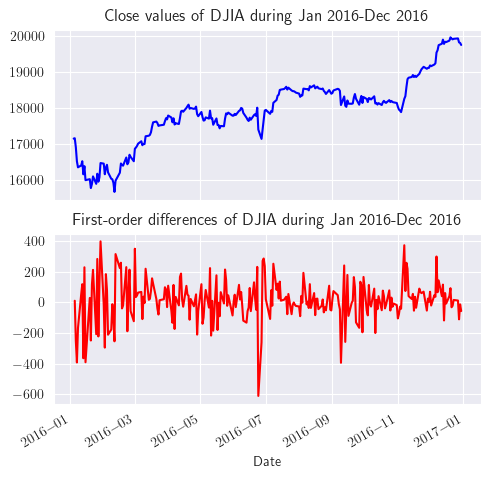

In [54]:
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016');

ADF Statistic: -17.135094
p-value: 0.000000


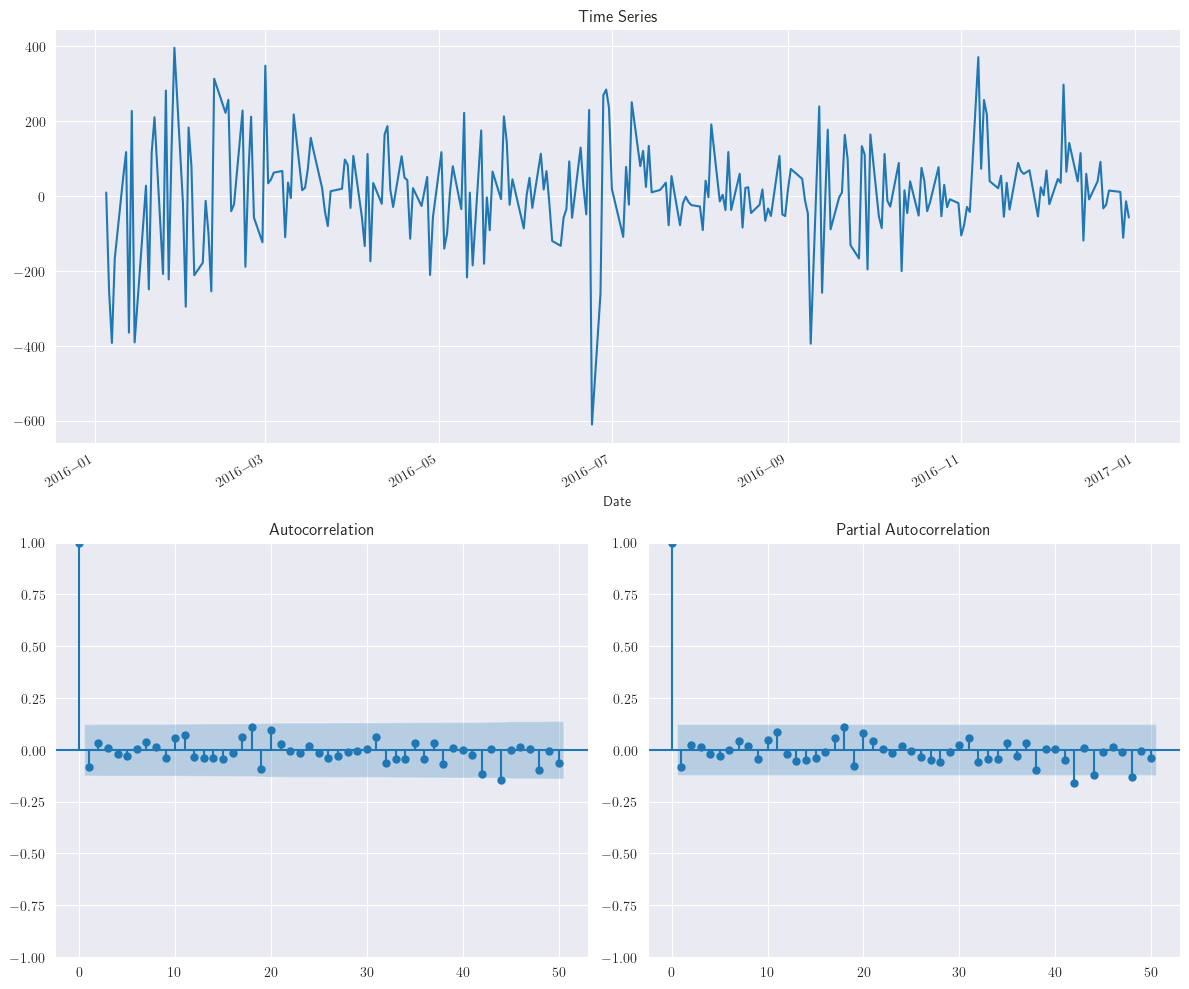

In [55]:
plotds(first_order_diff, nlag=50)
adf_result= adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

- El estadístico ADF de los residuos tiene un valor de -17.135094 con un valor $p=0.000000$, lo que indica que ***la serie de tiempo es estacionaria***; sin embargo, tanto la `ACF` como el `PACF` ***no muestran mucha tendencia del componente de media móvil, mostrando un comportamiento de paseo aleatorio***. Además, otra forma de ejecutar es ***optimizar utilizando AIC como criterio***

In [56]:
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = smtsa.ARIMA(djia_df['Close'].tolist(), order=(ari, d, maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

In [57]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'd', 'MA(q)', 'AIC'])
dfAIC

AR(p)  d  MA(q)          AIC
0       0  1      0  3182.101860
1       0  1      1  3182.670296
2       0  1      2  3184.581580
3       1  1      0  3182.624230
4       1  1      1  3184.571180
5       1  1      2  3186.467647
6       2  1      0  3184.573347
7       2  1      1  3186.447498
8       2  1      2  3188.433187
9       0  2      0  3362.452244
10      0  2      1  3181.460160
11      0  2      2  3182.546756
12      1  2      0  3280.491626
13      1  2      1  3182.515221
14      1  2      2  3184.482018
15      2  2      0  3252.415990
16      2  2      1  3184.488464
17      2  2      2  3186.338421

In [58]:
print('Best ARIMA parameters based on AIC:\n')
dfAIC[dfAIC.AIC == dfAIC.AIC.min()]

Best ARIMA parameters based on AIC:



AR(p)  d  MA(q)         AIC
10      0  2      1  3181.46016

- Elejimos $ARIMA(0, 2, 1)$ para el ajuste y la evaluación del modelo, por contar con el menor $AIC$. $ARIMA(0, 2, 1)$ aplica una ***diferenciación de segundo orden y un componente de media móvil de primer orden*** para determinar la relación entre las observaciones. El parámetro del modelo se configura como se muestra en el siguiente script

In [59]:
arima_obj = smtsa.ARIMA(djia_df['Close'].tolist(), order=(0, 2, 1))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1588.730
Date:                Thu, 16 May 2024   AIC                           3181.460
Time:                        17:24:18   BIC                           3188.503
Sample:                             0   HQIC                          3184.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9983      0.153     -6.535      0.000      -1.298      -0.699
sigma2      1.828e+04   2884.024      6.340      0.000    1.26e+04    2.39e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                47.47
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
pred=np.append([0,0], arima_obj_fit.fittedvalues.tolist())

In [61]:
n_first = pred.shape[0] - djia_df.shape[0]
djia_df['ARIMA']=pred[n_first:]

In [62]:
diffval=np.append([0,0], arima_obj_fit.resid)
djia_df['diffval']=diffval[n_first:]

- La comparación con los valores reales y previstos se obtiene y visualiza utilizando el siguiente script

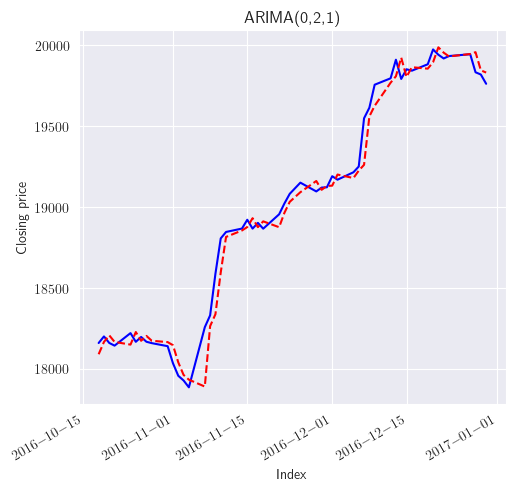

In [63]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
djia_df['Close'].iloc[200:].plot(color='b', linestyle = '-', ax=axarr)
djia_df['ARIMA'].iloc[200:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing price');

- La ampliación del modelo $ARIMA$ incluye el ***componente de estacionalidad para*** $AR$, $I$, y $MA$ ***representado en mayúsculas***. El $ARIMA$ estacional se representa como

    $$
    ARIMA(p, d, q) (P, D, Q)_{m},
    $$

    donde $P, D$ y $Q$ ***representan la parte estacional de la media autorregresiva, integrada y media móvil, respectivamente***. 
    
- La $m$ en el modelo $ARIMA$ estacional representa el ***número de periodos por estación***. En los casos en los que existe estacionalidad, ***pueden ser necesarios los pasos adicionales de diferencia estacional y ajuste estacional para garantizar que la señal sea estacionaria***. Por ejemplo, si se observan los gráficos de diferencia `ACF y PACF del DJIA`, la autocorrelación se vuelve ligeramente significativa en el índice 42, ***lo que significa que puede haber estacionalidad***.

-  ***Un gráfico de la función de autocorrelación retardada debería mostrar una autocorrelación positiva relativamente grande en el retardo 42, con picos más pequeños en los retardos 84 y 126 (si se examina un mayor número de retardo).***. La estacionalidad está presente en la primera diferencia y puede verse utilizando las siguientes líneas de código

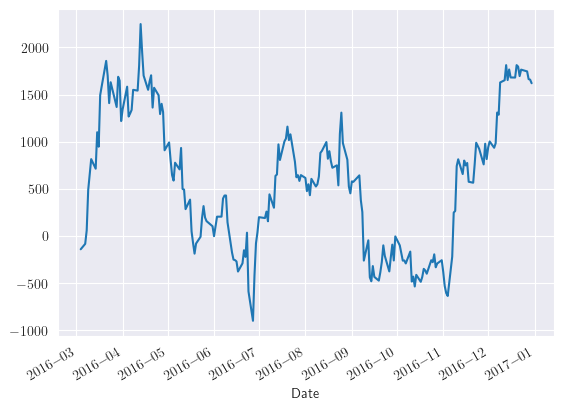

In [64]:
x=djia_df['Close']-djia_df['Close'].shift(42)
x.plot();

- La estacionalidad precedente puede corregirse utilizando $ARIMA$ estacional soportado en el modelo `statmodels.SARIMAX`. El script para configurar un modelo $ARIMA$ estacional para el conjunto de datos `DJIA` es el siguiente:

In [65]:
x=djia_df['Close']-djia_df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(djia_df['Close'], trend='n', order=(0, 2, 1),
seasonal_order=(1, 1, 1, 42))
sarimax= mod.fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Thu, 16 May 2024   AIC                           2741.141
Time:                                    17:24:21   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.163     -0.062      0.951     -32.680      30.680
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                21.28
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- El modelo muestra una ***mejora significativa en términos de AIC*** y puede optimizarse aún más para diferentes componentes del modelo `SARIMAX`

## Intervalo de confianza

- Una de las preguntas más frecuentes en previsión es: ***¿Cuál es el intervalo de confianza de las estimaciones?*** El nivel de confianza de un modelo de previsión viene definido por el parámetro $\alpha$ de la función de previsión. El valor $\alpha = 0.05$ representa una estimación con un 95% de confianza, lo que puede interpretarse como que las estimaciones devueltas por el modelo tienen una probabilidad del 5% de no caer en el intervalo de distribución definido. ***El intervalo de confianza se evalúa del siguiente modo***

$$
\hat{x}_{t}\pm Z_{\alpha}\frac{\sigma}{\sqrt{N}}
$$

- Aquí, $Z_{\alpha}$ es el valor crítico definido en función de $\alpha$. Para el valor $\alpha=0.05$, el valor crítico es $1.96$. El intervalo de confianza con un valor $\alpha$ de $0.05$ para el conjunto de datos `DJIA` modelado utilizando el modelo $ARIMA(0,2,1)$ puede obtenerse utilizando la función de previsión del objeto `arima_obj_fit`

In [66]:
tau_h = 40

In [67]:
forecast = arima_obj_fit.get_forecast(tau_h)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

In [68]:
yhat.shape

(40,)

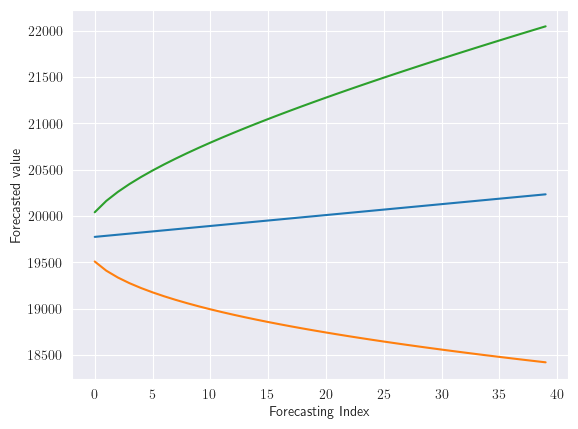

In [69]:
plt.plot(yhat)
plt.plot(yhat_conf_int)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value');

## Yahoo Finance

- Una opción gratuita, en el caso de que no desee pagar por los servicios de APIs tales como la de finnhub, es *Yahoo Finance*. En esta sección estudiaremos como hacer uso de la *API de Yahoo Finance* y además, como podemos descargar la *información necesaria para un EDA* y graficos de velas por ejemplo.

- Descargaremos para este ejemplo los datos de las acciones de **Apple** utilizando la API de yahoo Finance. Para esto debe primero que todo, debe instalar la librería que le permitirá hacer uso de API

````python
pip install yfinance
````

- Para usar la API, solo tiene que crear un objeto **ticker** con su respectivo símbolo, y luego puede realizar simples *queries* a métodos en el objeto que devuelven todo lo necesario par analizar series de tiempo financieras. Si usamos la función `.info()` podemos acceder a toda la información que podemos consultar sobre una acción

In [70]:
import yfinance as yf

In [71]:
msft = yf.Ticker("AAPL")
msft.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

- `yahoo_fin` es otra biblioteca de código abierto completamente gratuita, similar a `yfinance`, desarrollada por el autor de [theautomatic](https://theautomatic.net/). Carece de análisis de mercado/noticias, aunque ofrece una buena gama de datos de fundamentos y opciones. Puede consultar cada uno de los atributos de esta librería, a los cuale puede hacer en [yahoo_fin-documentation](https://theautomatic.net/yahoo_fin-documentation/). Para instalarla, utilice la siguiente orden:

````shell
pip install yahoo_fin
````

- `yahoo_fin` también tiene algunas dependencias: `ftplib, io, pandas, requests, requests_html`. Con la exsepción de `requests_html`, todos ellos deberían venir preinstalados con `miniconda`. Para instalar `requests_html` utilice:

````shell
pip install requests_html
````

- Para descargar datos históricos utilizando la biblioteca `yahoo_fin`, el método a utilizar es es `get_data()`. Tendremos que *importarlo desde el módulo* `stock_info`

In [72]:
from yahoo_fin.stock_info import get_data

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


- Esta función toma los argumentos

    - `ticker`: ticker de la acción/bono deseado, sin distinción entre mayúsculas y minúsculas
    - `start_date`: fecha de inicio de los datos (mm/dd/aaaa)
    - `end_date`: fecha en la que desea que finalicen los datos (mm/dd/aaaa)
    - `index_as_date`: {True, False}. Por defecto es `True`. Si es `True` entonces las fechas de los registros se establecen como el índice, de lo contrario se devuelven como una columna separada.
    - `interval`: {"1d", "2wk", "1mo"}. Se refiere al intervalo para muestrear los datos: "1d"= diario, "1wk"= semanal, "1mo"=mensual.

- Por ejemplo, usemos la función `get_data()` para obtener los datos asociados con la acción de **Apple** cuyo símbolo es `AAPL`, de la siguiente manera:

In [73]:
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

- Usamos las funciones `set_theme()` para *configurar el tema a usar en las figuras*, en éste caso paper el cual invocamos usando `set_context("paper")`. Para ver más temas para figuras con `seaborn` visitar [aesthetics](http://seaborn.pydata.org/tutorial/aesthetics.html).

In [74]:
sns.set_theme()
sns.set_context("paper")

In [75]:
stock = 'AAPL'
resolution = '1d'
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

In [76]:
def date_format(date_h):
    return date_h.strftime('%d/%m/%Y')

In [77]:
AAPL_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
AAPL_df.head()

date        open        high         low       close    adjclose  \
0 2023-05-17  171.710007  172.929993  170.419998  172.690002  171.777740   
1 2023-05-18  173.000000  175.240005  172.580002  175.050003  174.125275   
2 2023-05-19  176.389999  176.389999  174.940002  175.160004  174.234680   
3 2023-05-22  173.979996  174.710007  173.449997  174.199997  173.279739   
4 2023-05-23  173.130005  173.380005  171.279999  171.559998  170.653702   

     volume ticker  
0  57951600   AAPL  
1  65496700   AAPL  
2  55772400   AAPL  
3  43570900   AAPL  
4  50747300   AAPL

- Utilizaremos la función `lineplot` de `seaborn` para realizar un gráfico de la serie de tiempo de interés. Nótese que se ha colocado `;` al final de éste llamado, *¿con que objetivo?* 

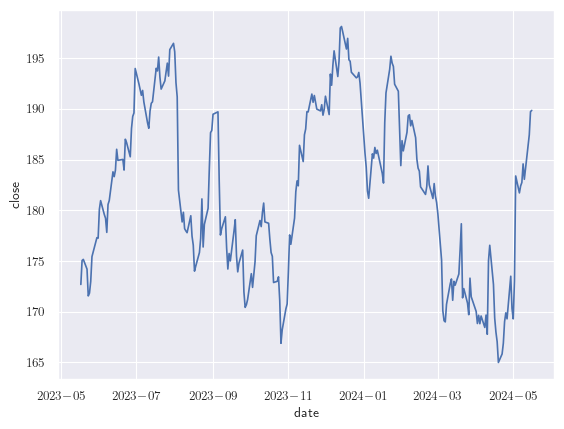

In [78]:
sns.lineplot(data=AAPL_df, x=AAPL_df.date, y=AAPL_df.close);

- **Gráficos de velas en Python:** El gráfico de velas es un estilo de gráfico financiero que describe la apertura, el máximo, el mínimo y el cierre para una coordenada $x$ determinada (probablemente la hora). Los recuadros representan la dispersión entre los valores de apertura y cierre y las líneas representan la dispersión entre los valores bajos y altos. Los puntos de muestra en los que el valor de cierre es mayor (menor) que el de apertura se denominan crecientes (decrecientes).

- Por defecto, las velas crecientes se dibujan en verde, mientras que las decrecientes se dibujan en rojo. Para realizar la figura usamos la función `Figure()` de la clase `go` de `plotly`, esta función recibe como input los datos asociados al candlestick suministrados por medio de la función `Candlestick` también de la clase `go` de `plotly`

In [79]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = AAPL_df.date,
                                     open = AAPL_df.open, 
                                     high = AAPL_df.high,
                                     low = AAPL_df.low, 
                                     close = AAPL_df.close)
                     ])
fig.update_layout(
    title="Apple Inc. (AAPL)",
    xaxis_title="Day",
    yaxis_title="AAPL-USD",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig

- Utilizaremos ahora una prueba estadística para verificar si la serie de tiempo es estacionaria o no. Esta prueba es la de  `Dickey-Fuller`. En cursos avanzados de **series de tiempo** se estudian las matemáticas detrás de este tipo de pruebas así como los plots **ACF** y **PACF**, en esta sección solo mencionaremos en una bastante resumida la idea detrás de su uso.
- Para hacer uso de esta prueba importamos la función `adfuller` de la clase `statsmodels.tsa.stattools`. Para aplicar el test pasamos los datos del precio de cierre, serie de tiempo de interés, usando `AAPL_df.close`. Este será el argumento de la función `adfuller` encargada de realizar el test de `Dickey-Fuller`

In [80]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [81]:
result = adfuller(AAPL_df.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.408822
p-value: 0.139262


- Realizaremos ahora figuras de **autocorrelación** para confirmar que la serie de tiempo diferenciada es estacionaria, así como también para verificar cuál es el orden de integración necesario para llevar nuestra serie de tiempo no estacionaria a una estacionaría. Para esto usaremos la función `plot_acf` de **Python**, la cual recibe como argumentos, la serie de tiempo de interés y el número de **lags** que deseamos considerar en la figura.
- Nótese que utilizamos la función `.diff()` para realizar diferenciación en nuestra serie de tiempo, con el objetivo de remover tendencia, además nótese también que se eliminan valores `nan` que podamos obtener en este proceso debido a que esta figura consiste en representar todos los valores $\rho_{k}$ definidos anteriormente, donde aparece un cociente para el cual evitamos valores nulos en el denominador.
- Realizaremos tres figuras, correspondientes a la autocorrelación de la serie original, la serie diferenciada una vez, y dos veces. Colocaremos estas figuras en una matriz de $3\times2$ usando la función `fig, axes = plt.subplots(3, 2, sharex=True)` de `matplotlib`.

In [82]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

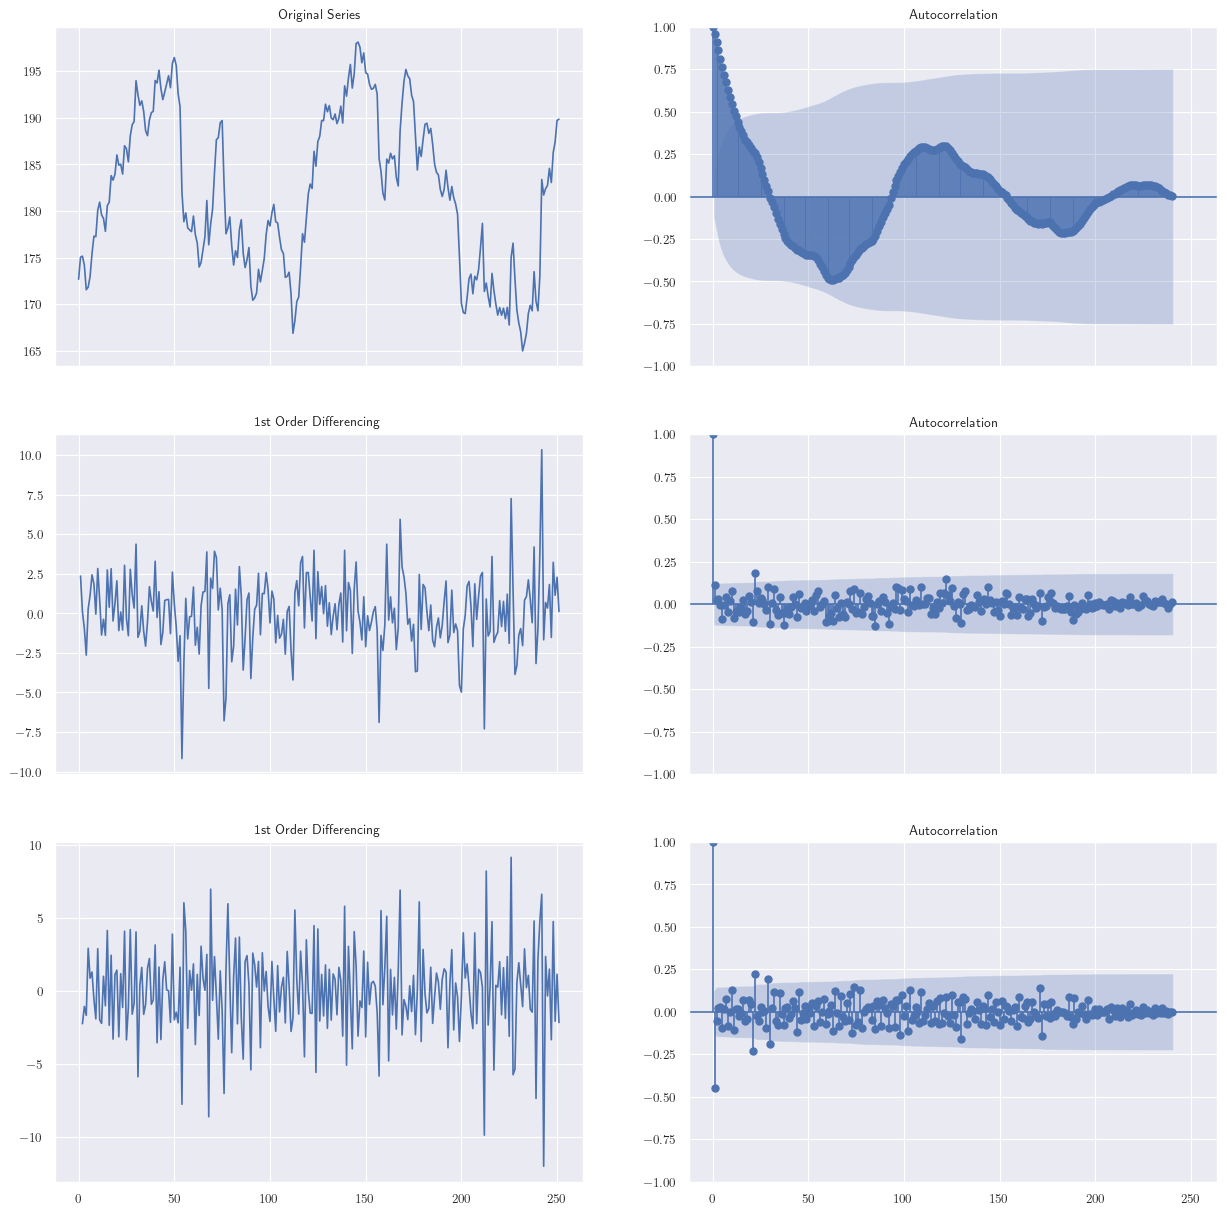

In [83]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(AAPL_df.close); axes[0, 0].set_title('Original Series')
plot_acf(AAPL_df.close, ax=axes[0, 1], lags = 240);

axes[1, 0].plot(AAPL_df.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(AAPL_df.close.diff().dropna(), ax=axes[1, 1], lags = 240);

axes[2, 0].plot(AAPL_df.close.diff().diff()); axes[2, 0].set_title('1st Order Differencing')
plot_acf(AAPL_df.close.diff().diff().dropna(), ax=axes[2, 1], lags = 240);

- Nótese el **decaimiento geométrico** en la primera figura de autocorrelación, que baja desde la parte positiva con una tendencia lineal, el cual se interpreta como una *autocorrelación asociada a una serie de tiempo no estacionaría*, como indica la prueba de `Dickey-Fuller` que presenta efectivamente tendencias.
- Los intervalos de confianza se dibujan como un cono. Por defecto, se establece un intervalo de confianza del 95%. Al observar el gráfico de autocorrelación para la segunda diferenciación, la *segunda autocorrelación entra en la zona negativa con bastante rapidez*, lo que indica que *la serie podría haber sido sobrediferenciada*.

In [84]:
n_AAPL = len(AAPL_df.close); n_test = 28 # This can be changed
train_size = n_AAPL - n_test

In [85]:
train = AAPL_df.close[:train_size]
dates_train = AAPL_df.date[:train_size]
test_4w = AAPL_df.close[train_size:train_size + n_test] 
dates_4w = AAPL_df.date[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_4w:", test_4w.shape)

train: (224,)
test_4w: (28,)


In [86]:
train_df = AAPL_df[["close"]][:train_size]
test_4w_df = AAPL_df[["close"]][train_size:train_size + n_test] 

In [87]:
test_4w_df.head()

close
224  169.669998
225  167.779999
226  175.039993
227  176.550003
228  172.690002

- Utlizamos ahora el modelo `ARIMA` importado desde la librería `statsmodels` de **Python** para obetener distintos **ARIMA** de ordenes $p,d,q$. Consideramos `method = 'mle'` para el cálculo de la **verosimilitud** exacta a través del **filtro de Kalman**. Como ejercicio puede reescribir estas líneas de código en una función que dependa sólo del input `train` y retorne los ordenes $p, d, q$ asociados al criterio **AIC** de bondad de ajuste

In [88]:
from statsmodels.tsa.arima.model import ARIMA

In [89]:
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5)
d_rng  = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                # print(i, d, j)
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue

In [90]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 972.19148 | order: (3, 1, 2)


- Existe una función llamada `auto_arima` de **Python** la cual es útli en ciertos casos especificos. Éste no es uno de ellos dado que el modelo **ARIMA** que entrega es un simple random walk $x_{t}=x_{t-1}+\omega_{t}$, el cual predice puramente como un modelo estocástico con dependencia temporal basado totalmente en el punto temporal anterior $t-1$

In [91]:
import pmdarima as pm

model = pm.arima.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=982.154, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=982.128, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=980.539, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=980.775, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=980.145, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.075 seconds


- Por lo tanto para éste problema consideramos los mejores ordenes $p, d, q$ obtenidos a a partir del criterio de Akaike. Los usamos como argumento de entrada en nuestro modelo **ARIMA** junto a nuestro *train set*, para obtener el modelo de ajustado de interés que utlizaremos para predecir valores futuros usando *rolling*

In [92]:
from statsmodels.graphics.tsaplots import plot_predict

In [93]:
model = ARIMA(train, order=best_order)
model_fit = model.fit()

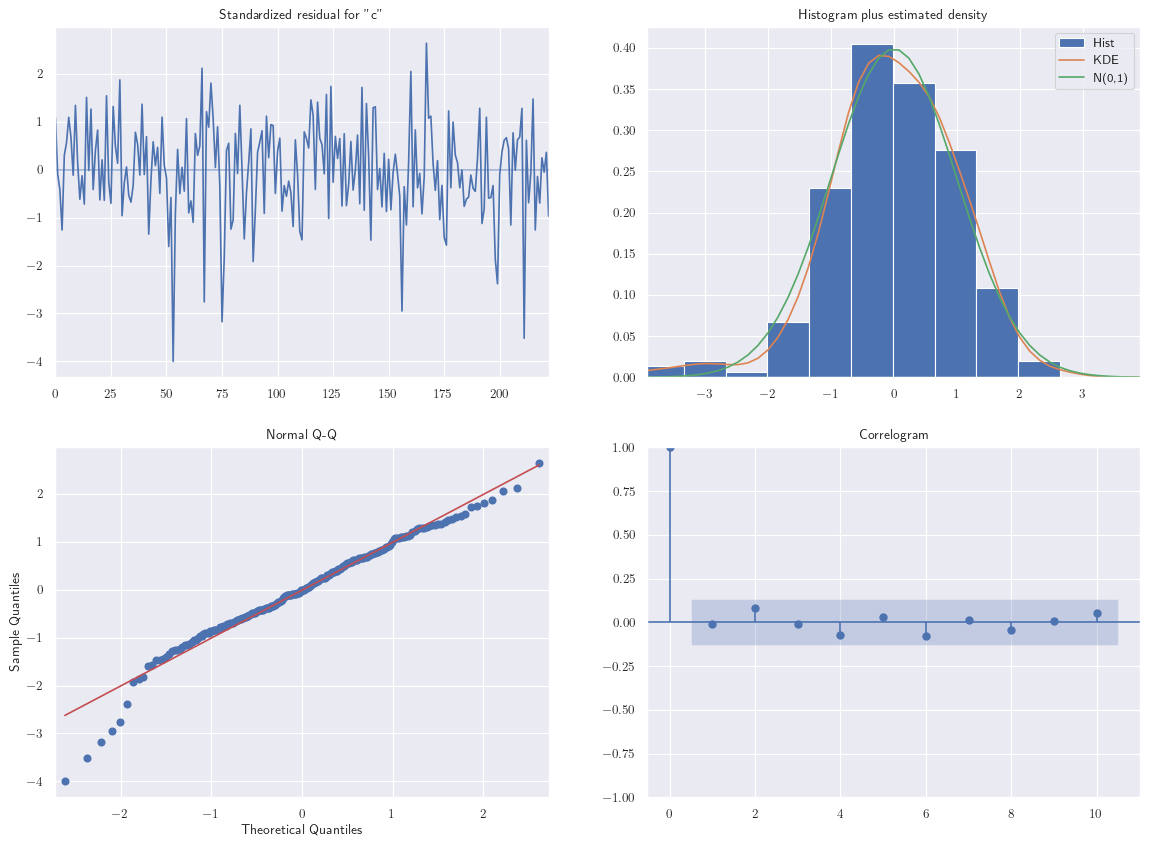

In [94]:
model_fit.plot_diagnostics(figsize=(14,10));

In [95]:
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(model_fit.resid,
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [96]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.8441290561251872
Null hypothesis is accepted at lag = 1 for p-val = 0.9805905476635584
Null hypothesis is accepted at lag = 2 for p-val = 0.997457458764868
Null hypothesis is accepted at lag = 3 for p-val = 0.9984036823558202
Null hypothesis is accepted at lag = 4 for p-val = 0.9997469207911089
Null hypothesis is accepted at lag = 5 for p-val = 0.9999622576735951
Null hypothesis is accepted at lag = 6 for p-val = 0.9999867470055962
Null hypothesis is accepted at lag = 7 for p-val = 0.9999976344528044
Null hypothesis is accepted at lag = 8 for p-val = 0.9999996760595242
Null hypothesis is accepted at lag = 9 for p-val = 0.9999997644167009
Null hypothesis is accepted at lag = 10 for p-val = 0.9999999652236458
Null hypothesis is accepted at lag = 11 for p-val = 0.999999992814173
Null hypothesis is accepted at lag = 12 for p-val = 0.9999999989142384
Null hypothesis is accepted at lag = 13 for p-val = 0.9999999998116514
Null hypothesis is

- Para graficar el ajuste de nuestro modelo **ARIMA** frente a nuestro conjunto de entrenamiento utilizamos la función `plot_predict` que proviene del objeto instanciado usando la función **ARIMA**. 

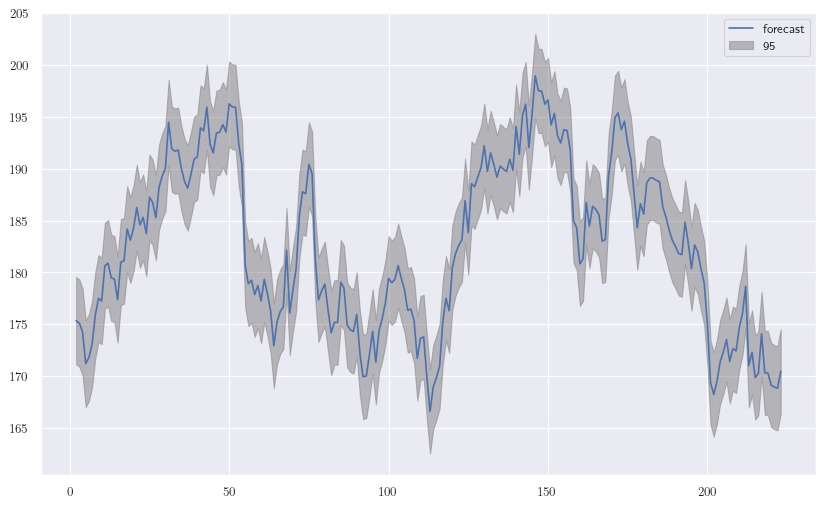

In [97]:
plt.rcParams.update({'figure.figsize': (10,6)})
fig, ax = plt.subplots();
plot_predict(model_fit, 2, ax=ax);
plt.show();

- Para medir el error de predicción cometido en las predicciones, utilizaremos las métricas usuales en análisis de series de tiempo: `MAPE, MAE, RMSE, MSE`

In [98]:
def forecast_accuracy(forecast, actual, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse]},
                          index=[str_name])
    
    return df_acc

### Rolling forecast

- Realizamos ahora predicciones utilizando *rolling forecasting*. El *rolling forecast* entrega reportes que utilizan datos históricos para predecir cifras futuras de forma continua durante un periodo de tiempo. Las previsiones continuas se utilizan a menudo en los reportes financieros, la gestión de la cadena de suministro, la planificación y la elaboración de presupuestos.
- El *rolling forecast* es una ayuda esencial para tomar decisiones empresariales acertadas. Gracias a su capacidad de respuesta, las previsiones continuas ayudan a las empresas a responder más rápidamente a las condiciones cambiantes del mercado. Si se utilizan con eficacia, las previsiones continuas pueden ayudar a identificar las deficiencias de rendimiento, acortar los ciclos de planificación y tomar la mejor decisión para los resultados. Para nuestros ejemplos, nuestro horizonte de predicción será de un día

In [99]:
def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions

In [100]:
test_4wl = test_4w.tolist()
yhat_4w  = arima_rolling(train.tolist(), test_4wl)

predicted=167.573112, expected=169.669998
predicted=168.975354, expected=167.779999
predicted=167.966982, expected=175.039993
predicted=175.755483, expected=176.550003
predicted=176.172335, expected=172.690002
predicted=172.934845, expected=169.380005
predicted=169.342060, expected=168.000000
predicted=167.000679, expected=167.039993
predicted=166.790153, expected=165.000000
predicted=165.483539, expected=165.839996
predicted=165.449374, expected=166.899994
predicted=166.566308, expected=169.020004
predicted=170.142251, expected=169.889999
predicted=170.024837, expected=169.300003
predicted=168.466434, expected=173.500000
predicted=174.490005, expected=170.330002
predicted=170.487818, expected=169.300003
predicted=168.496286, expected=173.029999
predicted=173.203909, expected=183.380005
predicted=184.852924, expected=181.710007
predicted=182.942393, expected=182.399994
predicted=183.469591, expected=182.740005
predicted=181.556116, expected=184.570007
predicted=184.077610, expected=183

In [101]:
forecast_accuracy(np.array(test_4wl), np.array(yhat_4w), "4 weeks")

MAE       MSE      MAPE      RMSE
4 weeks  2.382143  10.78686  0.013736  3.284336

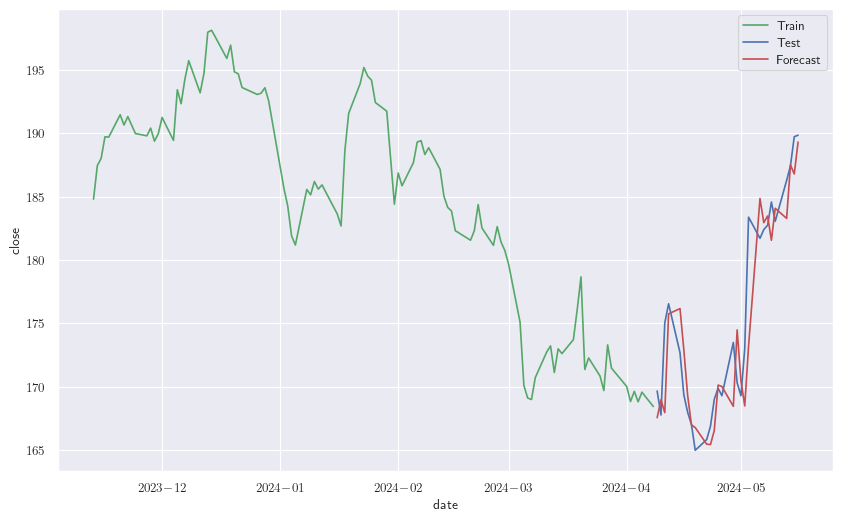

In [102]:
ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4wl, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_4w, label="Forecast", color='r')
plt.show()

In [103]:
pred_error = np.array(test_4wl) - np.array(yhat_4w)

In [104]:
from pandas.plotting import autocorrelation_plot

- La función de ***autocorrelación ACF*** nos muestra que los ***residuos de predicción son independientes, no correlacionados***, tal como se espera en esta prueba

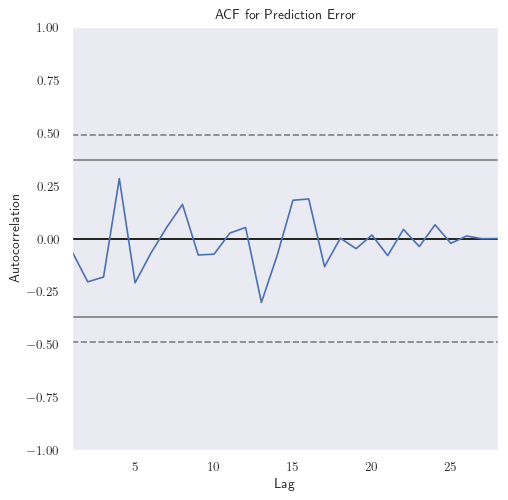

In [105]:
fig = plt.figure(figsize=(5.5, 5.5))
autocorrelation_plot(pred_error, color='b')
plt.title('ACF for Prediction Error');

In [106]:
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(pred_error,
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [107]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.7359704125768592
Null hypothesis is accepted at lag = 1 for p-val = 0.4809133673165793
Null hypothesis is accepted at lag = 2 for p-val = 0.4618598832302754
Null hypothesis is accepted at lag = 3 for p-val = 0.2504875061485124
Null hypothesis is accepted at lag = 4 for p-val = 0.22235988978110333
Null hypothesis is accepted at lag = 5 for p-val = 0.30646969732594304
Null hypothesis is accepted at lag = 6 for p-val = 0.4015384362642351
Null hypothesis is accepted at lag = 7 for p-val = 0.39909620881837615
Null hypothesis is accepted at lag = 8 for p-val = 0.4723382289363619
Null hypothesis is accepted at lag = 9 for p-val = 0.5432820863931258
Null hypothesis is accepted at lag = 10 for p-val = 0.6297212533603918
Null hypothesis is accepted at lag = 11 for p-val = 0.6979211834903816
Null hypothesis is accepted at lag = 12 for p-val = 0.3623393022379603
Null hypothesis is accepted at lag = 13 for p-val = 0.409871913757243
Null hypothesi

````{admonition} Resumen
:class: tip

- En este capítulo, cubrimos los modelos autorregresivos como un modelo $MA$ para capturar la correlación serial utilizando la relación de error. En líneas similares, se cubrieron los modelos $AR$, que establecen la previsión utilizando los rezagos como observaciones dependientes. Los modelos $AR$ son buenos para captar información sobre tendencias. También se ilustró el enfoque basado en $ARMA$, que integra los modelos $AR$ y $MA$ para captar las tendencias temporales y los acontecimientos inesperados que provocan muchos errores que tardan en corregirse, como una crisis económica. 

- Todos estos modelos suponen estacionariedad; en los casos en los que no se da estacionariedad, se utiliza un modelo basado en la diferenciación, como el $ARIMA$, que diferencia los conjuntos de datos de series temporales para eliminar cualquier tendencia. Los métodos de previsión se ilustraron con ejemplos utilizando el módulo `tsa` de `Python`. El presente capítulo se centra en el uso de `métodos estadísticos` para la previsión. En el capítulo siguiente se ampliará el enfoque estadístico a los métodos de `aprendizaje automático` para la previsión, concretamente `modelos de aprendizaje profundo`.
````